## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 


### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 



## ZAD 1:

### Aproksymacja wielomianowa średniokwadratowa dla funkcji: sin(x), sqrt(x), x^3+2x

In [1]:
# I TABLICOWANIE:

import numpy as np
def lookupTab(fx, steps):
    val_x = np.array(np.linspace(0, 11, steps))
    array_y = np.zeros([steps])
    for i in range(len(val_x)):
        array_y[i] = fx(val_x[i])
    return array_y

def getPoints(steps):
    val_x=np.linspace(0, 10, steps)
    points=np.zeros([len(val_x)-1])
    for i in range(len(val_x)-1):
        points[i]=(val_x[i+1]-val_x[i])/2+val_x[i]
    return points

In [2]:
# II APROKSYMACJA ŚREDNIOKWADRATOWA
def least_squares_aproxy(val_y, val_x, d):
    n = len(val_x)
    matrix_x = np.zeros((d+1, d+1))

    for i in range(d+1):
        for j in range(d+1):
            suma = 0
            pow_x = j + i
            for k in range (n):
                suma += pow(val_x[k], pow_x)
            matrix_x[i][j] = suma

    y = np.linalg.inv(matrix_x)

    coeff_tab = [0] * (d + 1)
    for i in range (d + 1):
        for j in range (n):
            coeff_tab[i] += pow(val_x[j], i) * val_y[j]

    poly = (np.matmul(coeff_tab, y))[::-1]
    poly = np.poly1d(poly)
    return poly

Function: sin(x)


Degree: 1
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.4099156277      7.1197809231      0.3594320455
 0.1111111111   0.1108826285            0.4038840041      1.6758609003      0.2529479057
 0.2222222222   0.2203977435            0.3978523805      0.5923654739      0.1480024641
 0.3333333333   0.3271946968            0.3918207569      0.1317212261      0.0456040846
 0.4444444444   0.4299563635            0.3857891333      0.1213172835      0.0532648347
 0.5555555556   0.5274153858            0.3797575097      0.2799650524      0.1476578761
 0.6666666667   0.6183698031            0.3737258861      0.3877362349      0.2366742508
 0.7777777778   0.7016978761            0.3676942625      0.4649091018      0.3194679818
 0.8888888889   0.7763719213            0.3616626389      0.5221911998      0.395

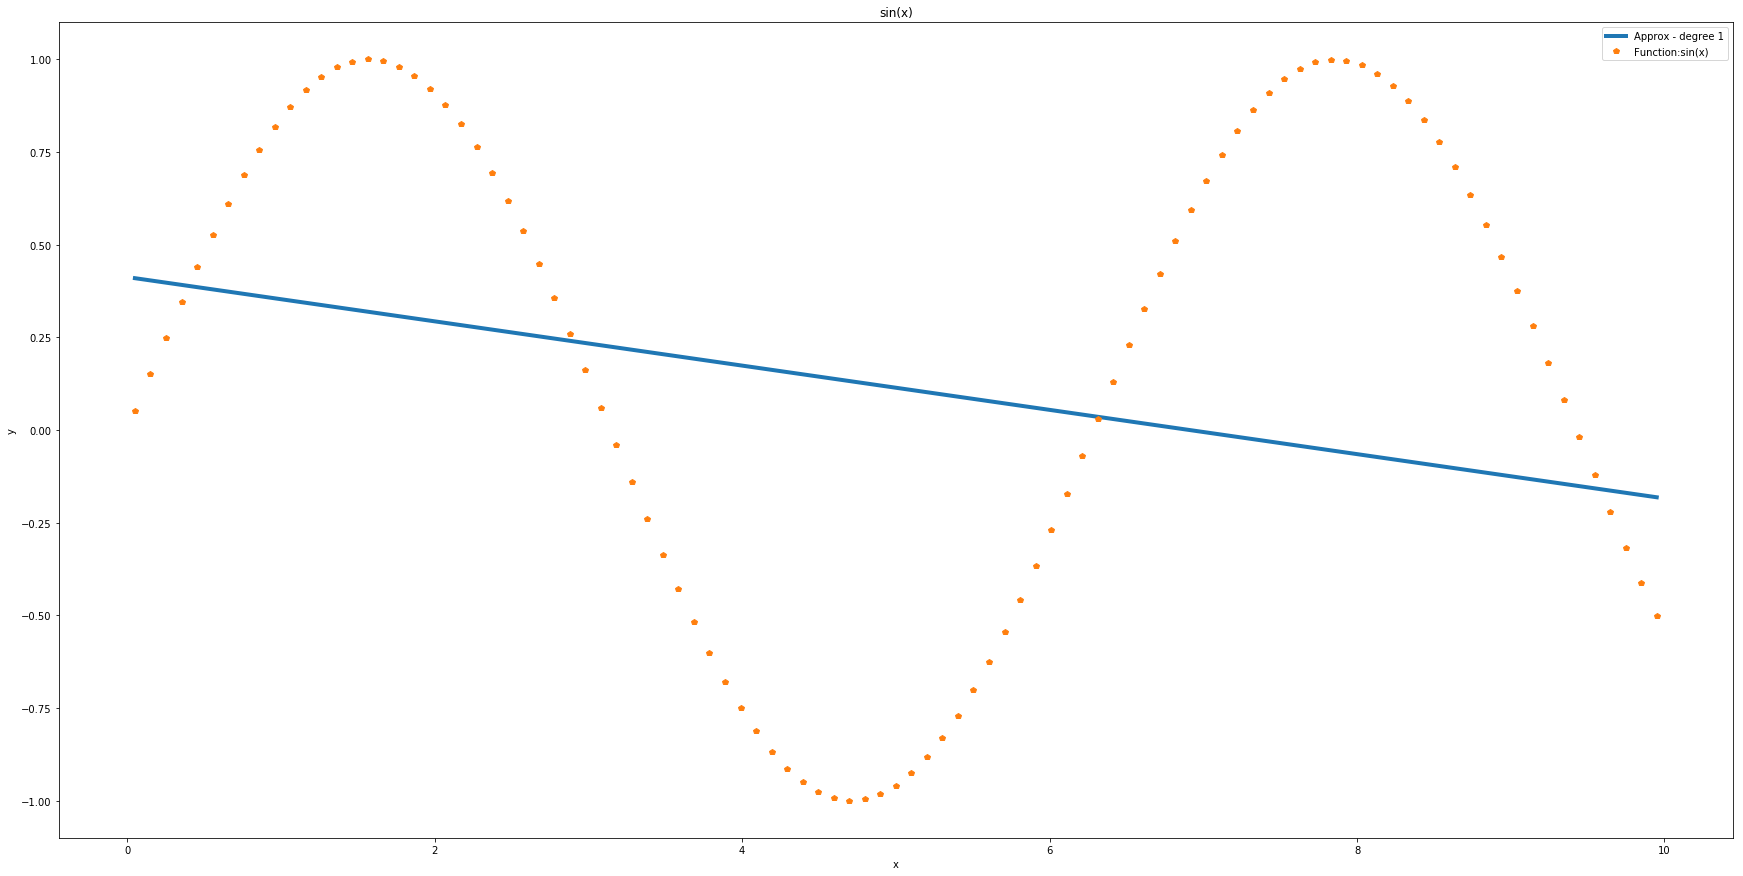



Degree: 2
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.5284507817      9.4677750401      0.4779671995
 0.1111111111   0.1108826285            0.5157583045      2.4170639768      0.3648222062
 0.2222222222   0.2203977435            0.5031904458      1.0139708394      0.2533405294
 0.3333333333   0.3271946968            0.4907472054      0.4174568838      0.1445305331
 0.4444444444   0.4299563635            0.4784285835      0.0896805823      0.0393746155
 0.5555555556   0.5274153858            0.4662345799      0.1160011776      0.0611808058
 0.6666666667   0.6183698031            0.4541651948      0.2559549592      0.1562349421
 0.7777777778   0.7016978761            0.4422204281      0.3564541245      0.2449418162
 0.8888888889   0.7763719213            0.4304002797      0.4313788067      0.3265188869
 1.000000

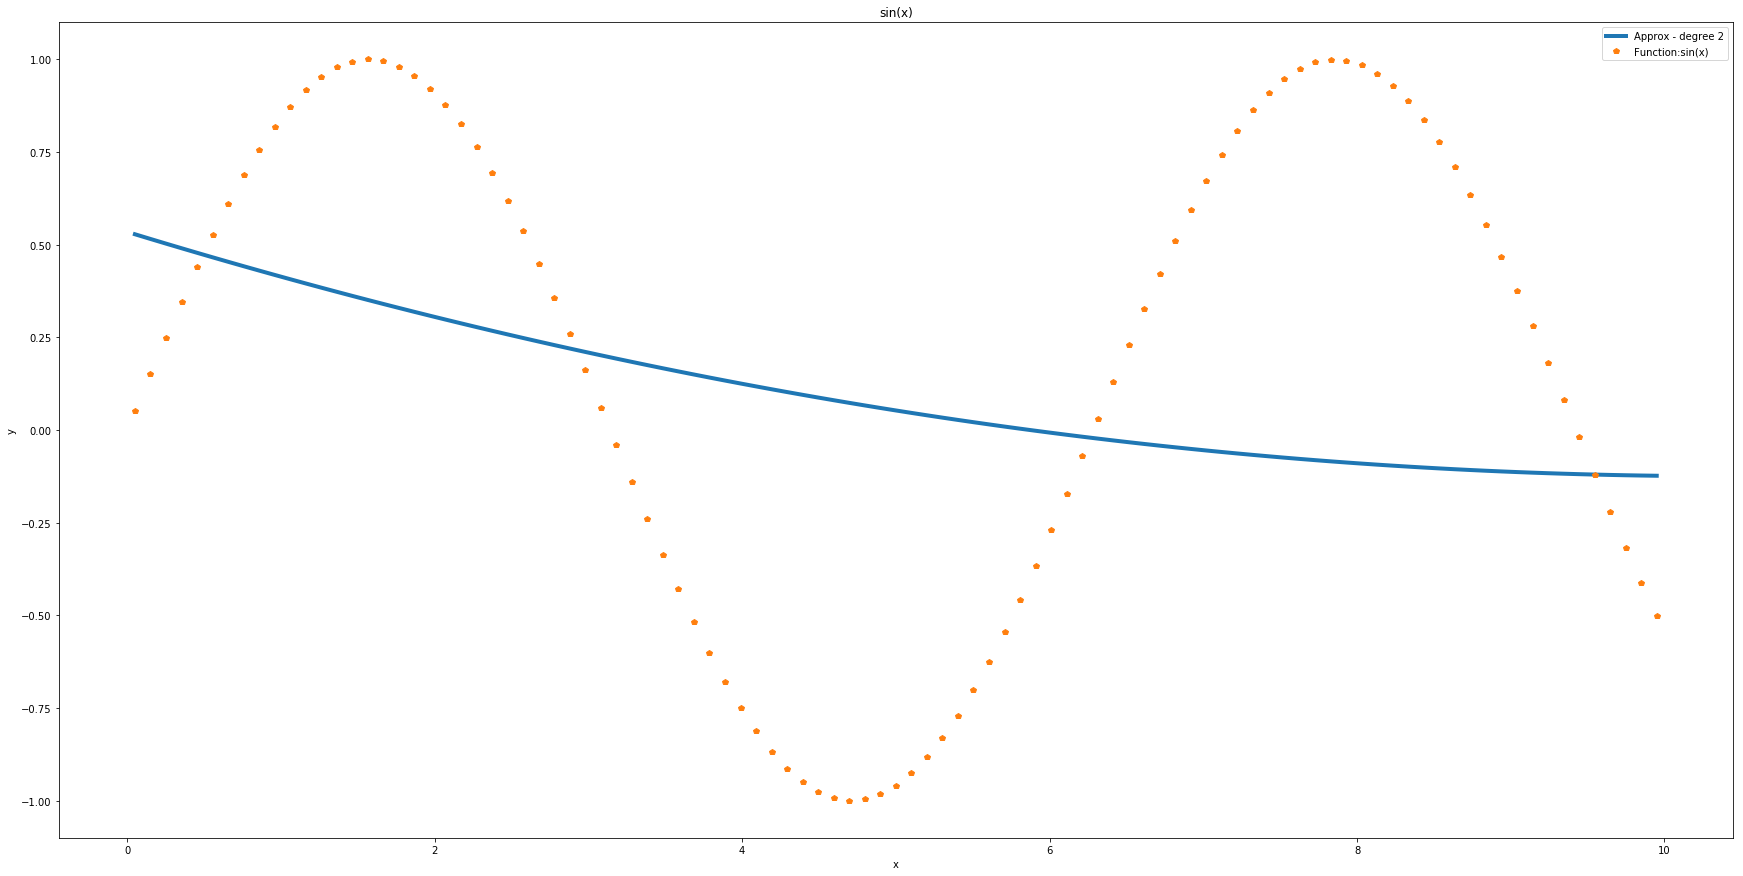



Degree: 3
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            1.3581140476     25.9020934822      1.3076304654
 0.1111111111   0.1108826285            1.2506225853      7.2857752312      1.0996864870
 0.2222222222   0.2203977435            1.1477133997      3.5936113025      0.8978634834
 0.3333333333   0.3271946968            1.0493023046      2.0307676913      0.7030856323
 0.4444444444   0.4299563635            0.9553051137      1.1758261705      0.5162511458
 0.5555555556   0.5274153858            0.8656376410      0.6412824964      0.3382222552
 0.6666666667   0.6183698031            0.7802157002      0.2782036783      0.1698155633
 0.7777777778   0.7016978761            0.6989551052      0.0171616835      0.0117928610
 0.8888888889   0.7763719213            0.6217716698      0.1785494446      0.1351474968
 1.000000

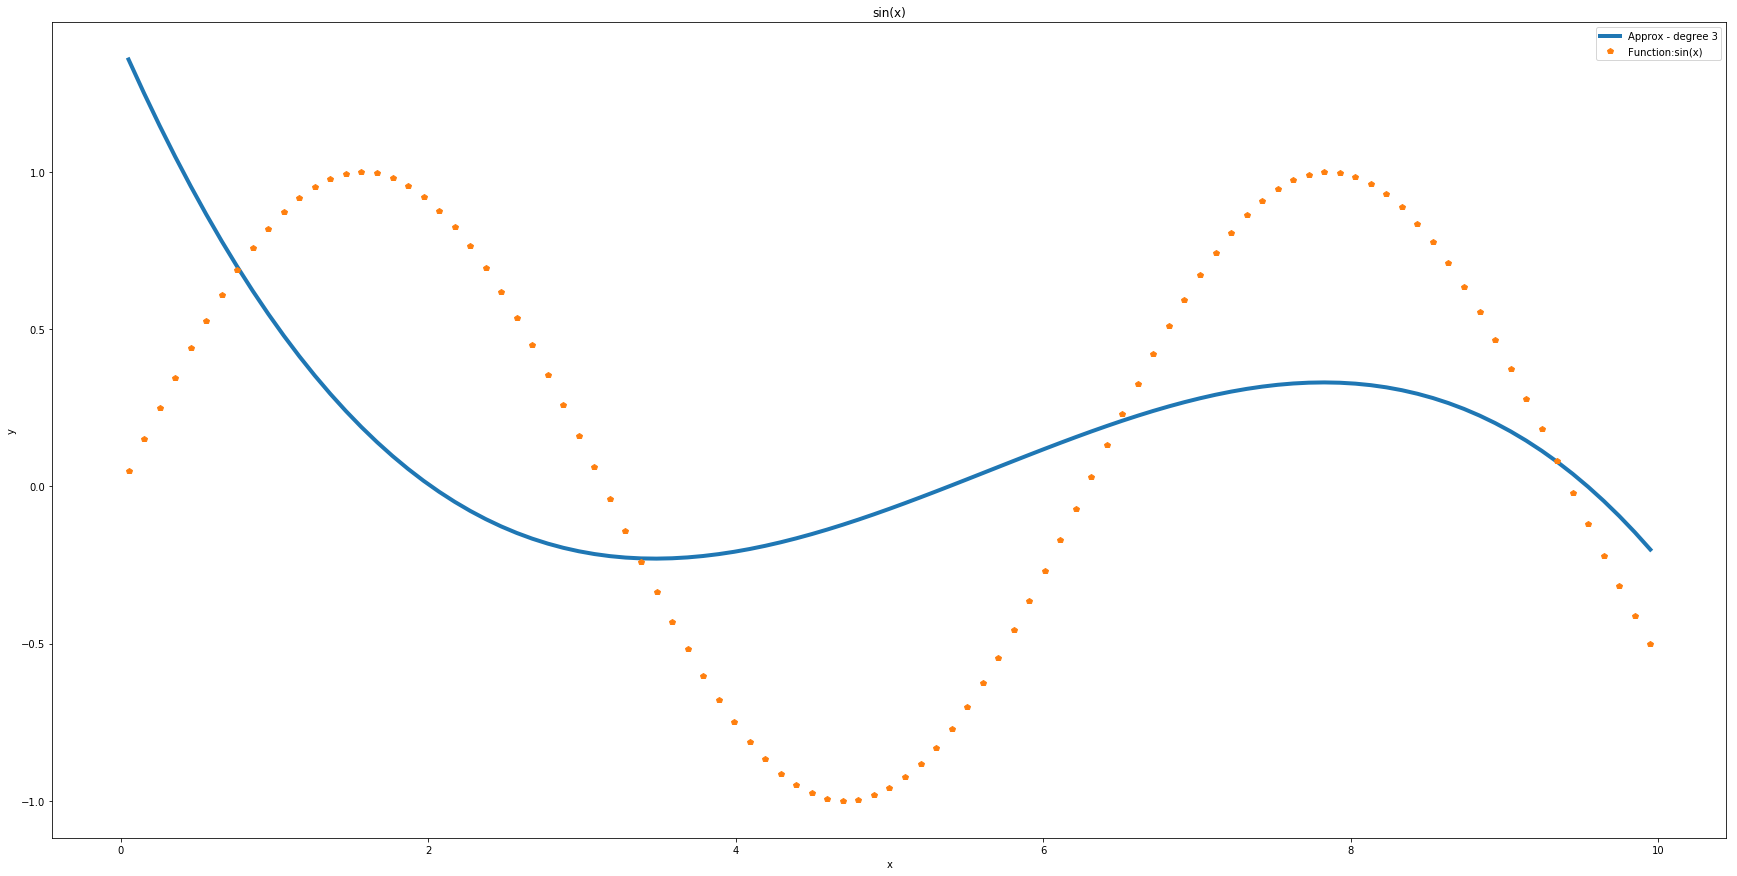



Degree: 4
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.3103400797      5.1473466454      0.2598564975
 0.1111111111   0.1108826285            0.4071829181      1.6977172623      0.2562468197
 0.2222222222   0.2203977435            0.4911846978      0.9659190003      0.2413347814
 0.3333333333   0.3271946968            0.5630317953      0.6262411384      0.2168151230
 0.4444444444   0.4299563635            0.6233958955      0.4198616595      0.1843419276
 0.5555555556   0.5274153858            0.6729339923      0.2759089143      0.1455186065
 0.6666666667   0.6183698031            0.7122883877      0.1669204259      0.1018882508
 0.7777777778   0.7016978761            0.7420866929      0.0799293749      0.0549244486
 0.8888888889   0.7763719213            0.7629418272      0.0079568082      0.0060226606
 1.000000

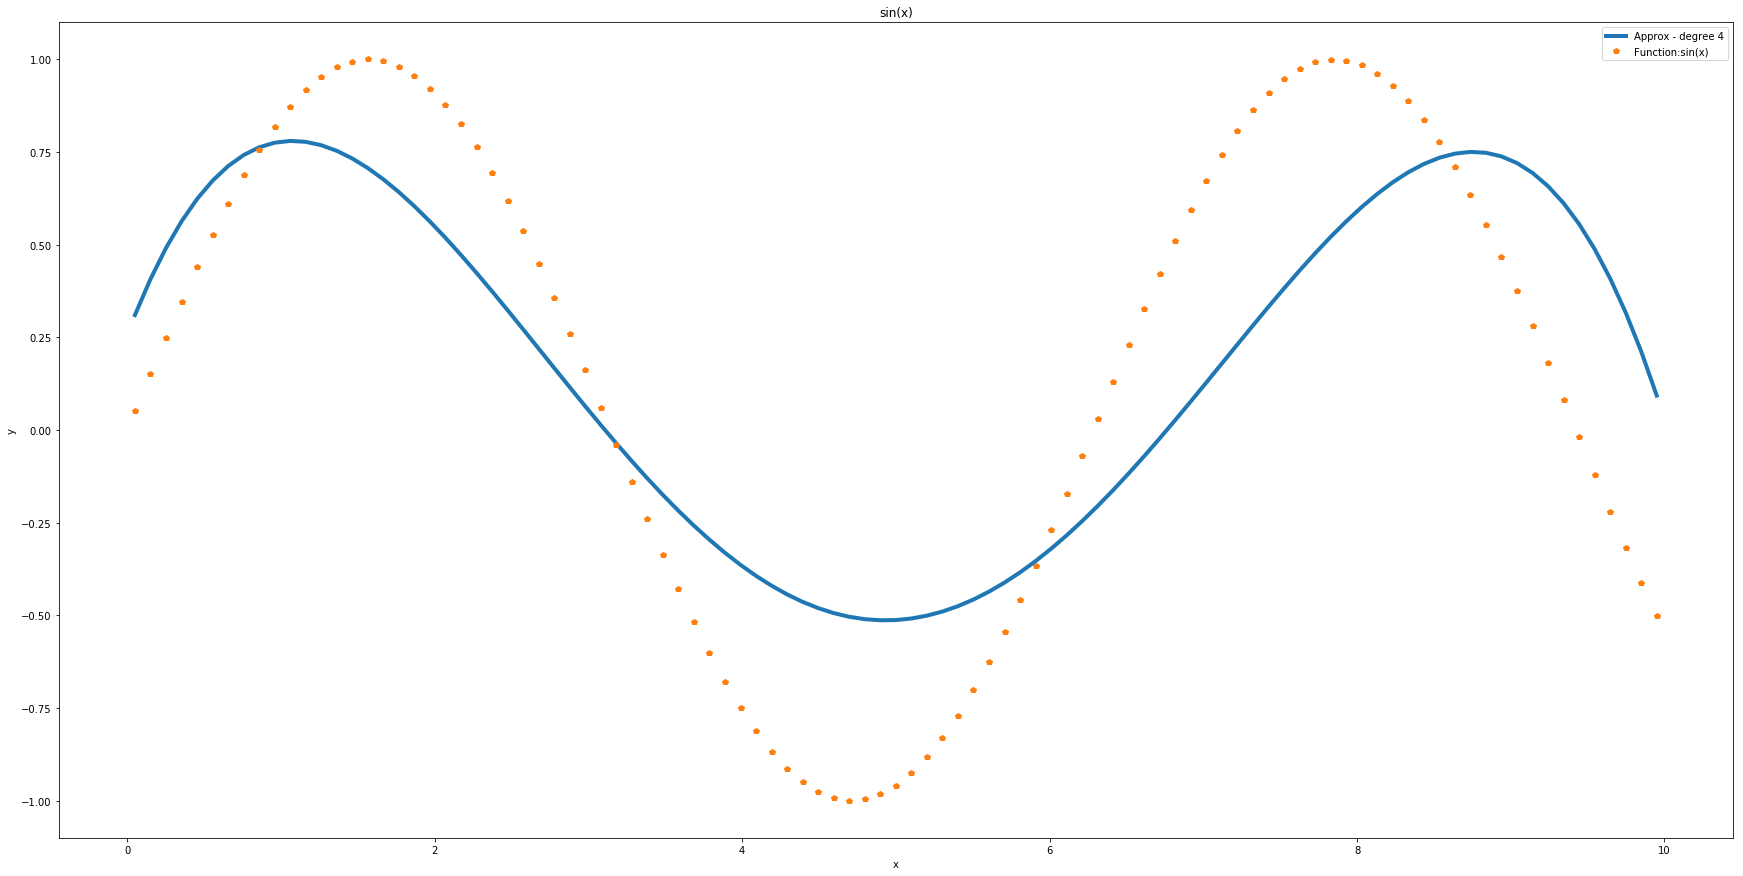



Degree: 5
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000           -0.4830253058     10.5679681344      0.5335088880
 0.1111111111   0.1108826285           -0.1463586639      1.9696730303      0.2972947622
 0.2222222222   0.2203977435            0.1453438818      0.4182752435      0.1045060346
 0.3333333333   0.3271946968            0.3952155804      0.1415267145      0.0489989081
 0.4444444444   0.4299563635            0.6062697352      0.3808547000      0.1672157673
 0.5555555556   0.5274153858            0.7814017291      0.4815679447      0.2539863433
 0.6666666667   0.6183698031            0.9233910510      0.5127635057      0.3129909141
 0.7777777778   0.7016978761            1.0349033218      0.5060538184      0.3477410775
 0.8888888889   0.7763719213            1.1184923205      0.4776905776      0.3615731539
 1.000000

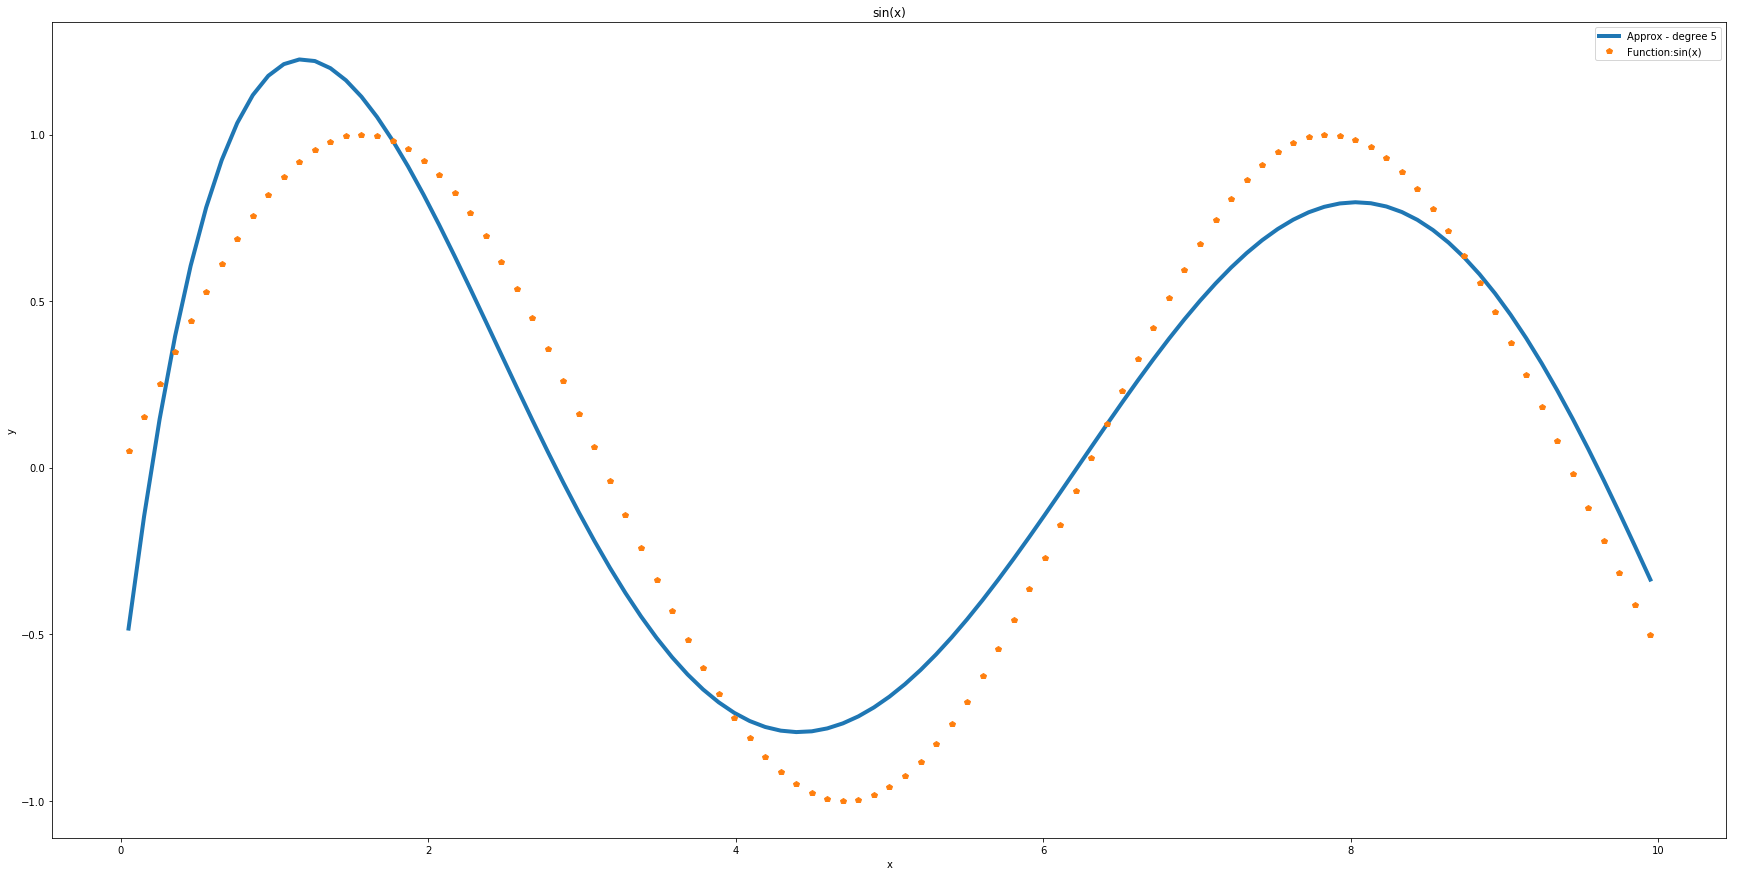



Degree: 6
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000           -0.0566085602      2.1213261366      0.1070921424
 0.1111111111   0.1108826285            0.0913295537      0.3949124516      0.0596065446
 0.2222222222   0.2203977435            0.2308743544      0.0759478421      0.0189755620
 0.3333333333   0.3271946968            0.3609558508      0.0425721222      0.0147391785
 0.4444444444   0.4299563635            0.4806864835      0.0948232304      0.0416325156
 0.5555555556   0.5274153858            0.5893503168      0.1174310283      0.0619349311
 0.6666666667   0.6183698031            0.6863924804      0.1244959477      0.0759923435
 0.7777777778   0.7016978761            0.7714088605      0.1226007641      0.0842466162
 0.8888888889   0.7763719213            0.8441360401      0.1152261395      0.0872168735
 1.000000

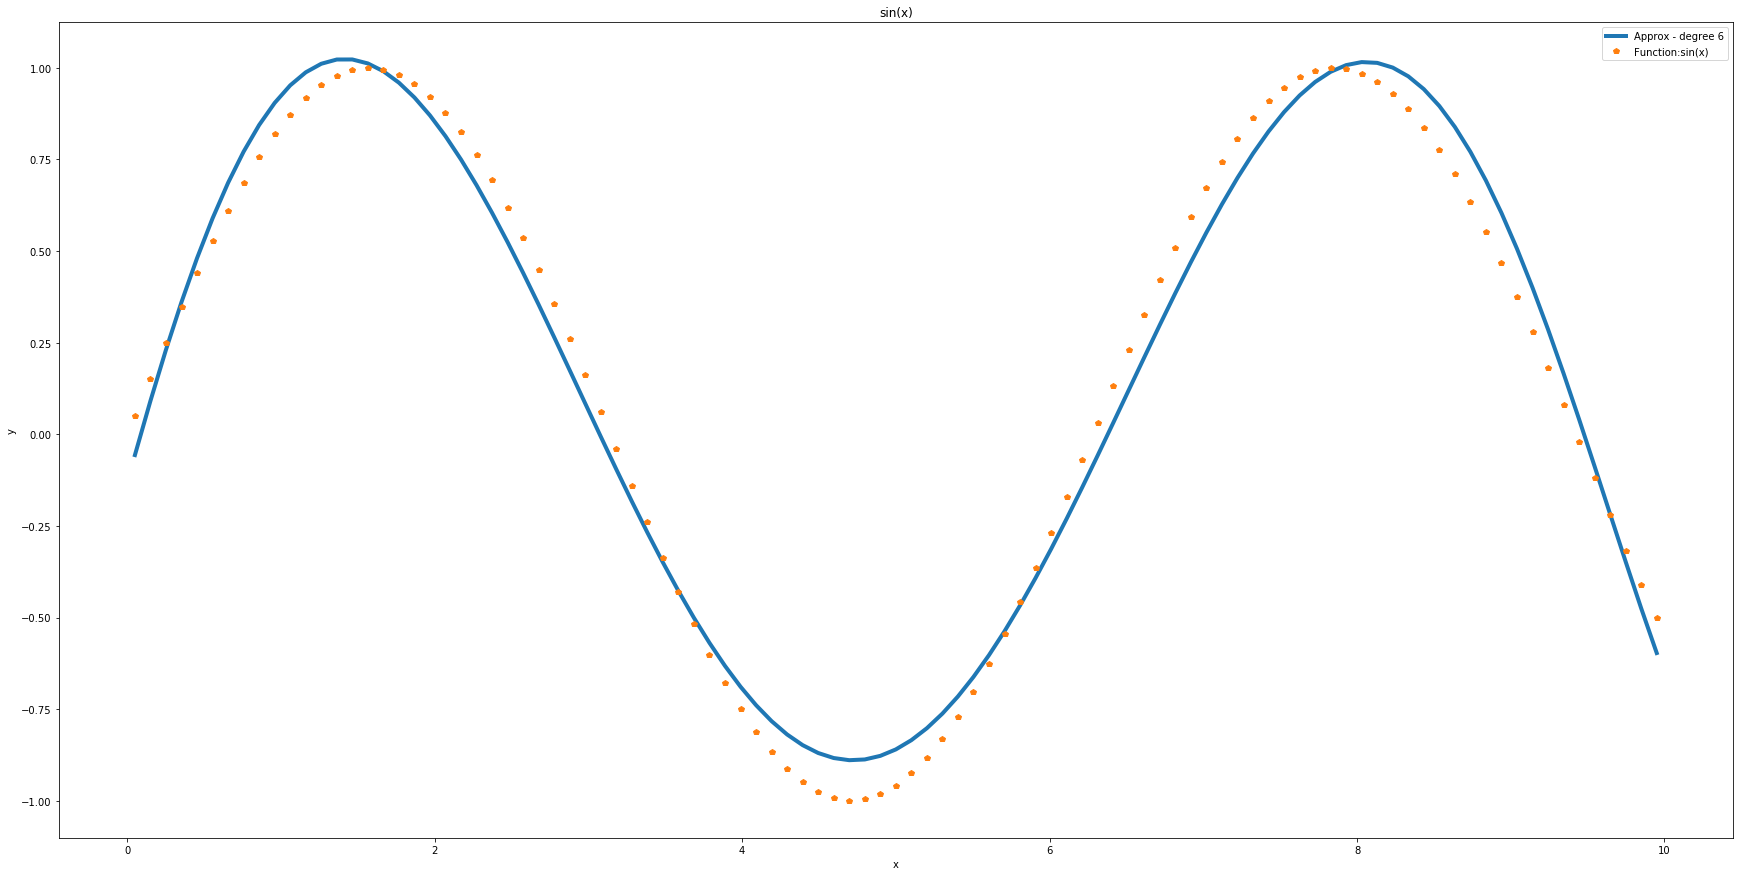



Degree: 7
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.1219491332      1.4156196498      0.0714655510
 0.1111111111   0.1108826285            0.1578236592      0.0456322969      0.0068875609
 0.2222222222   0.2203977435            0.2150937099      0.1391083373      0.0347562064
 0.3333333333   0.3271946968            0.2878991914      0.1684421506      0.0583174809
 0.4444444444   0.4299563635            0.3710699632      0.1548420233      0.0679840047
 0.5555555556   0.5274153858            0.4600796865      0.1276710939      0.0673356993
 0.6666666667   0.6183698031            0.5510014131      0.0973111247      0.0593987238
 0.7777777778   0.7016978761            0.6404648857      0.0679568165      0.0466973586
 0.8888888889   0.7763719213            0.7256155205      0.0413566567      0.0313036461
 1.000000

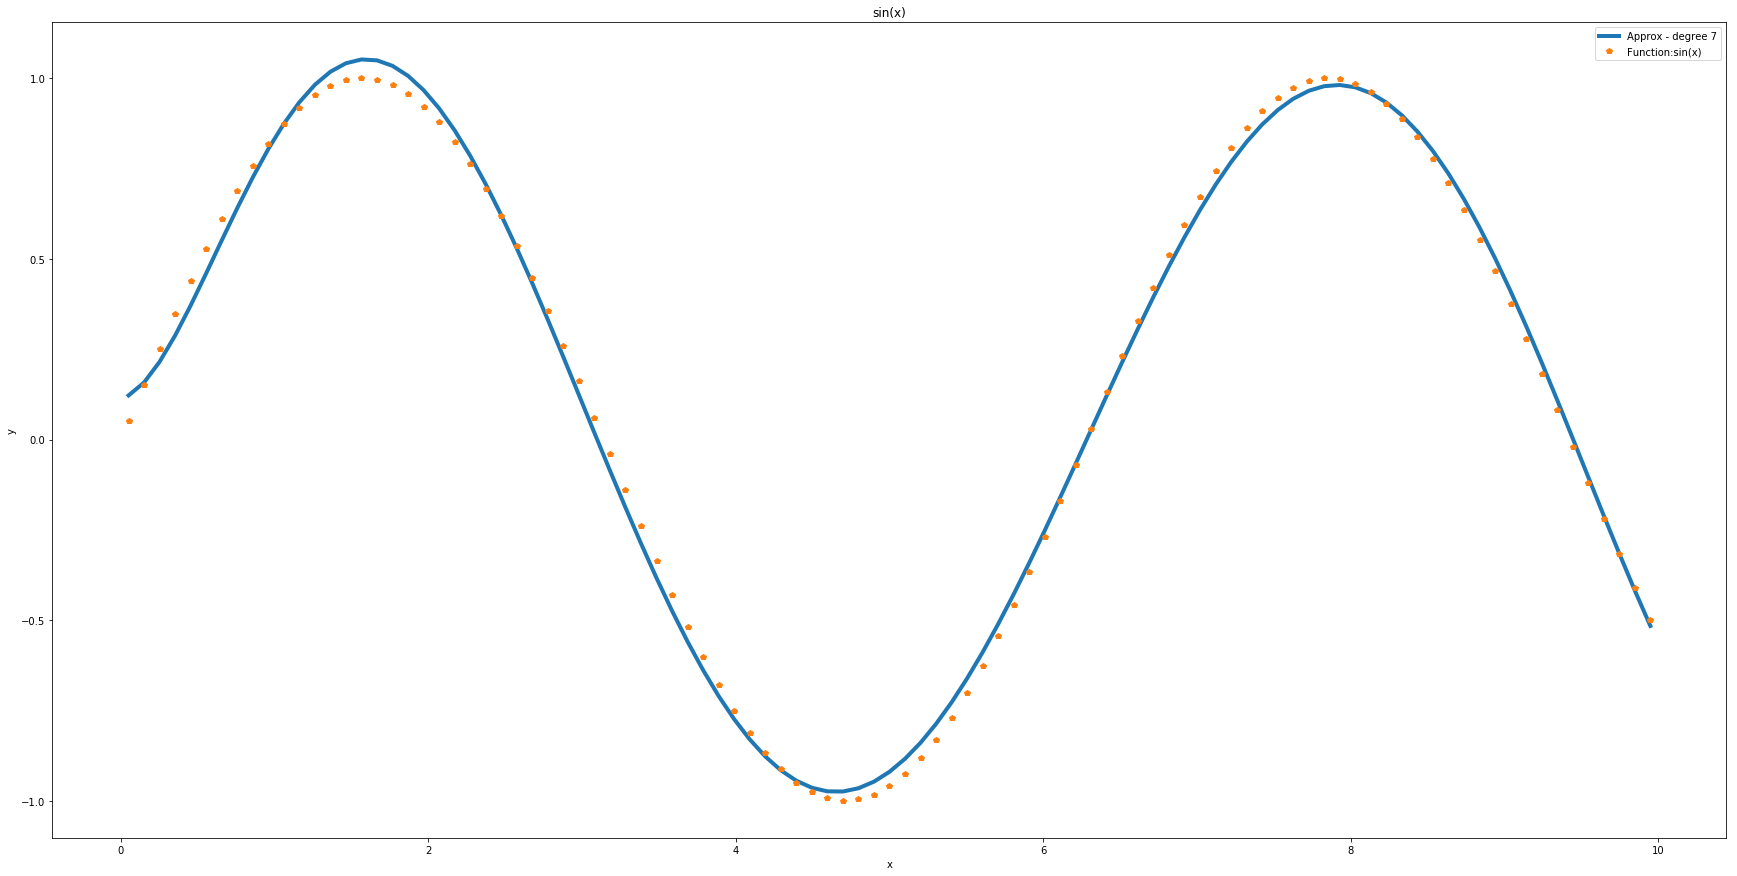



Degree: 8
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0626231359      0.2404653780      0.0121395537
 0.1111111111   0.1108826285            0.1507041004      0.0015370606      0.0002319979
 0.2222222222   0.2203977435            0.2418217143      0.0321320982      0.0080282020
 0.3333333333   0.3271946968            0.3340478006      0.0351481389      0.0121688717
 0.4444444444   0.4299563635            0.4255731868      0.0307041551      0.0134807811
 0.5555555556   0.5274153858            0.5147191708      0.0240725153      0.0126962150
 0.6666666667   0.6183698031            0.5999467916      0.0171253981      0.0104533453
 0.7777777778   0.7016978761            0.6798640416      0.0106207853      0.0072982027
 0.8888888889   0.7763719213            0.7532311535      0.0048724002      0.0036880131
 1.000000

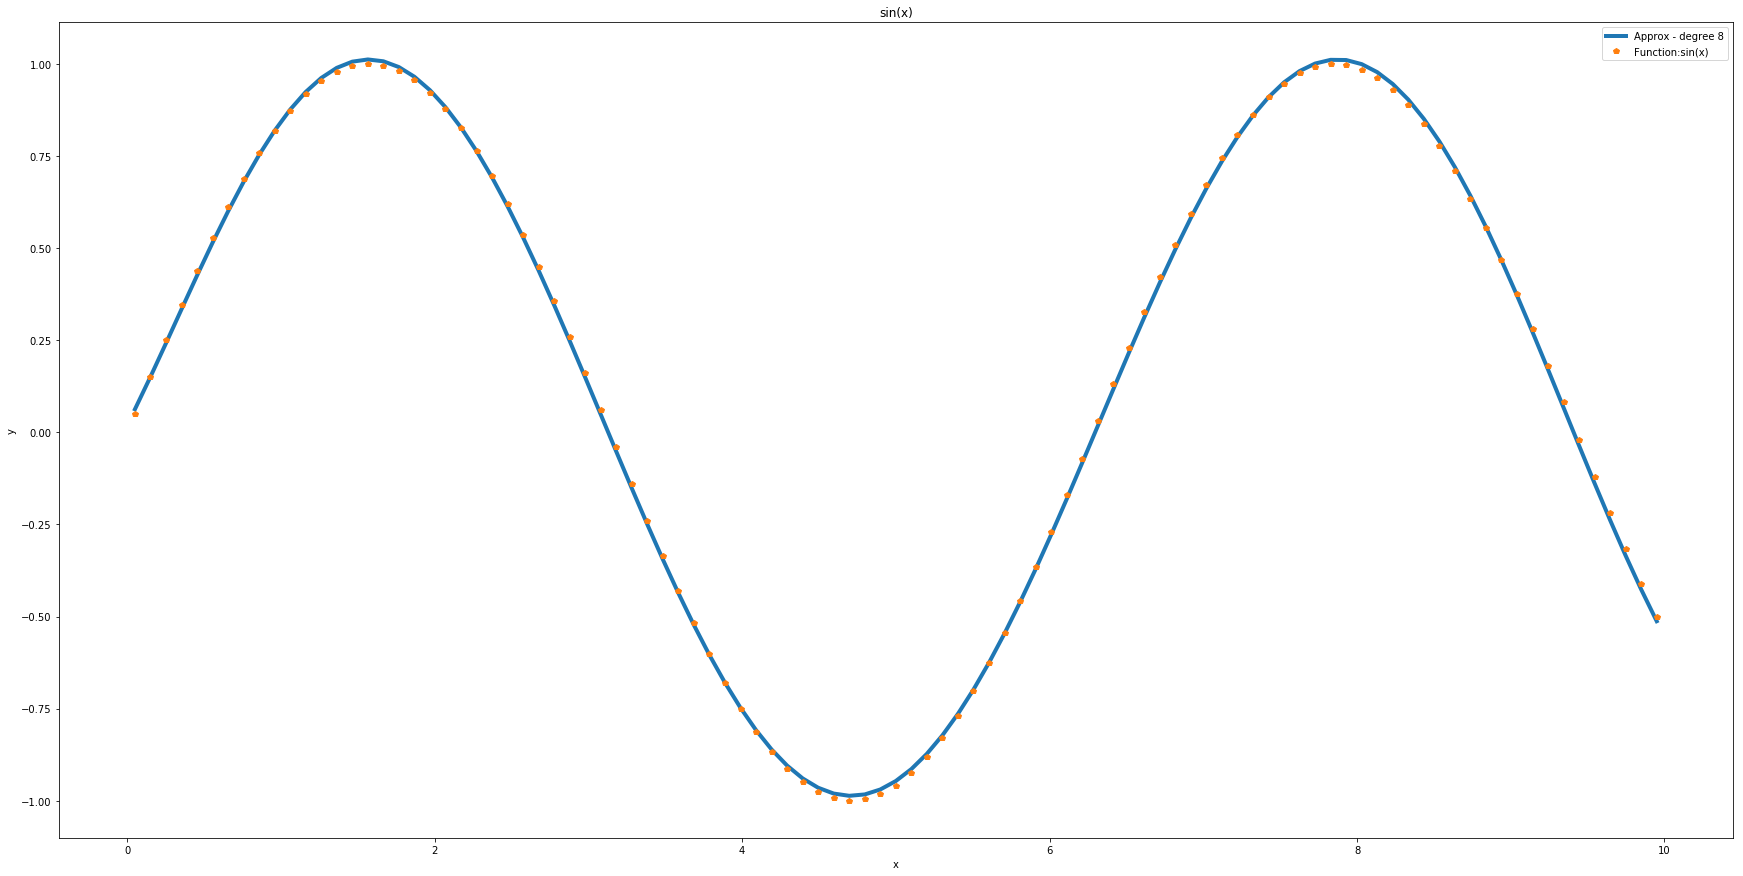



Degree: 9
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0465102277      0.0787058743      0.0039733545
 0.1111111111   0.1108826285            0.1547266719      0.0251137635      0.0037905735
 0.2222222222   0.2203977435            0.2568444702      0.0279950219      0.0069945539
 0.3333333333   0.3271946968            0.3534529759      0.0209010837      0.0072363036
 0.4444444444   0.4299563635            0.4447824408      0.0130473090      0.0057284728
 0.5555555556   0.5274153858            0.5307806780      0.0063807244      0.0033652922
 0.6666666667   0.6183698031            0.6111811511      0.0012795118      0.0007810142
 0.7777777778   0.7016978761            0.6855630560      0.0023272353      0.0015991882
 0.8888888889   0.7763719213            0.7534039425      0.0046441208      0.0035152241
 1.000000

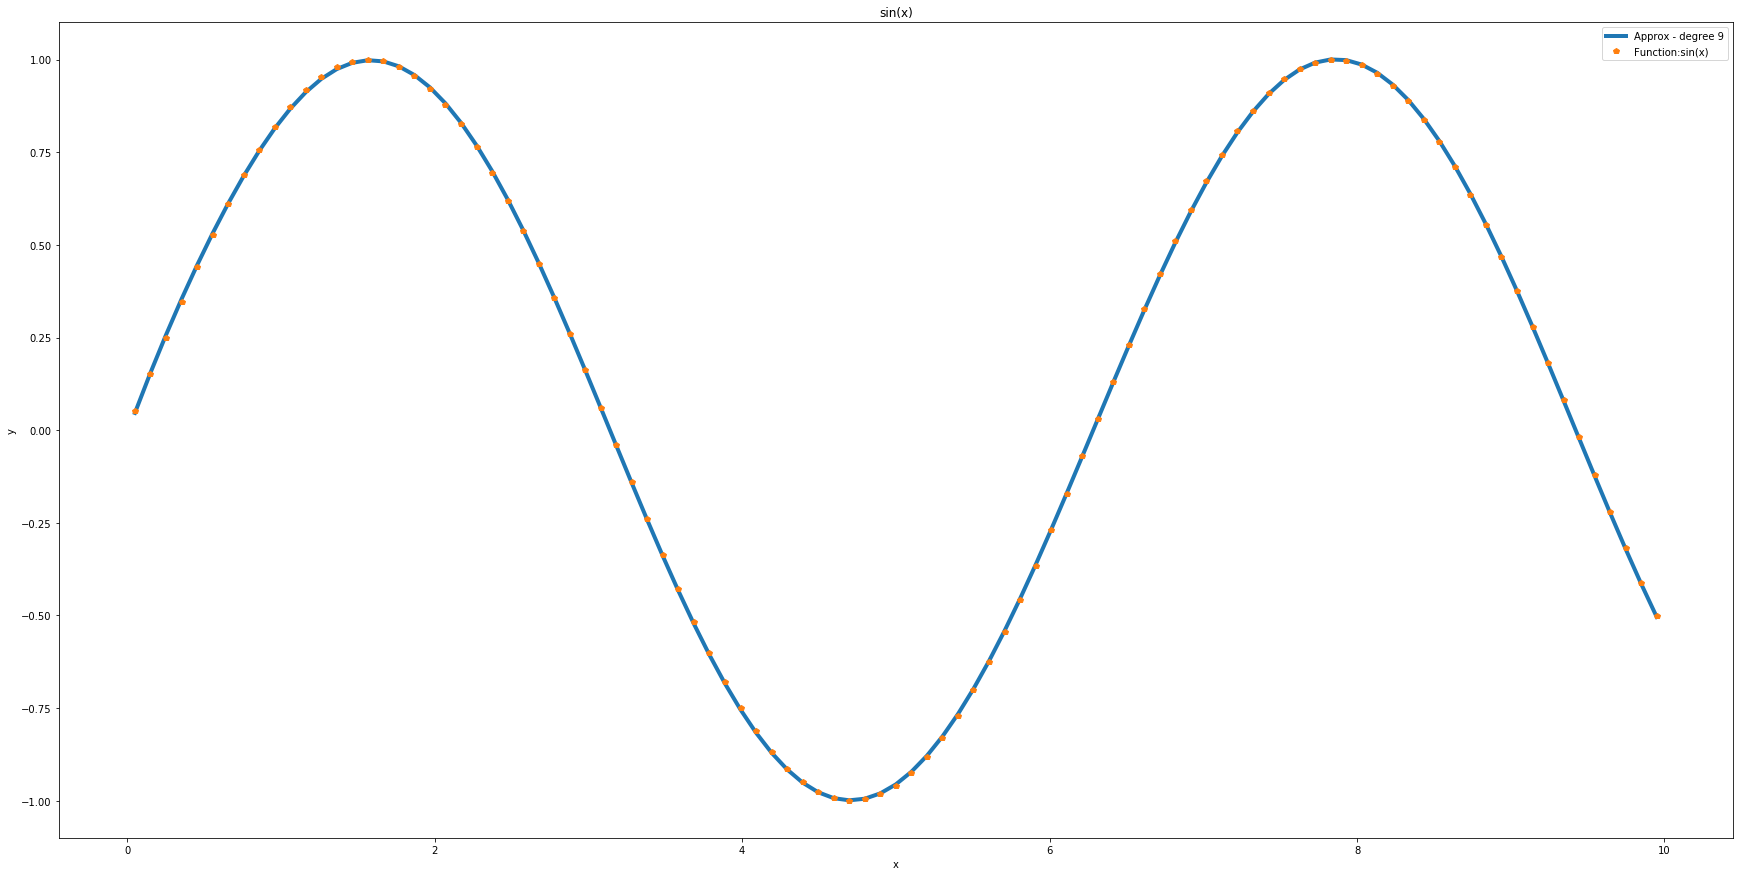



Degree: 10
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0499706043      0.0101612820      0.0005129779
 0.1111111111   0.1108826285            0.1517172630      0.0051754657      0.0007811646
 0.2222222222   0.2203977435            0.2510892535      0.0049603264      0.0012393371
 0.3333333333   0.3271946968            0.3473883660      0.0033842786      0.0011716937
 0.4444444444   0.4299563635            0.4398666826      0.0018510587      0.0008127147
 0.5555555556   0.5274153858            0.5277487591      0.0006320888      0.0003333734
 0.6666666667   0.6183698031            0.6102523602      0.0002420981      0.0001477767
 0.7777777778   0.7016978761            0.6866076331      0.0008071037      0.0005546112
 0.8888888889   0.7763719213            0.7560746281      0.0011157578      0.0008445385
 1.00000

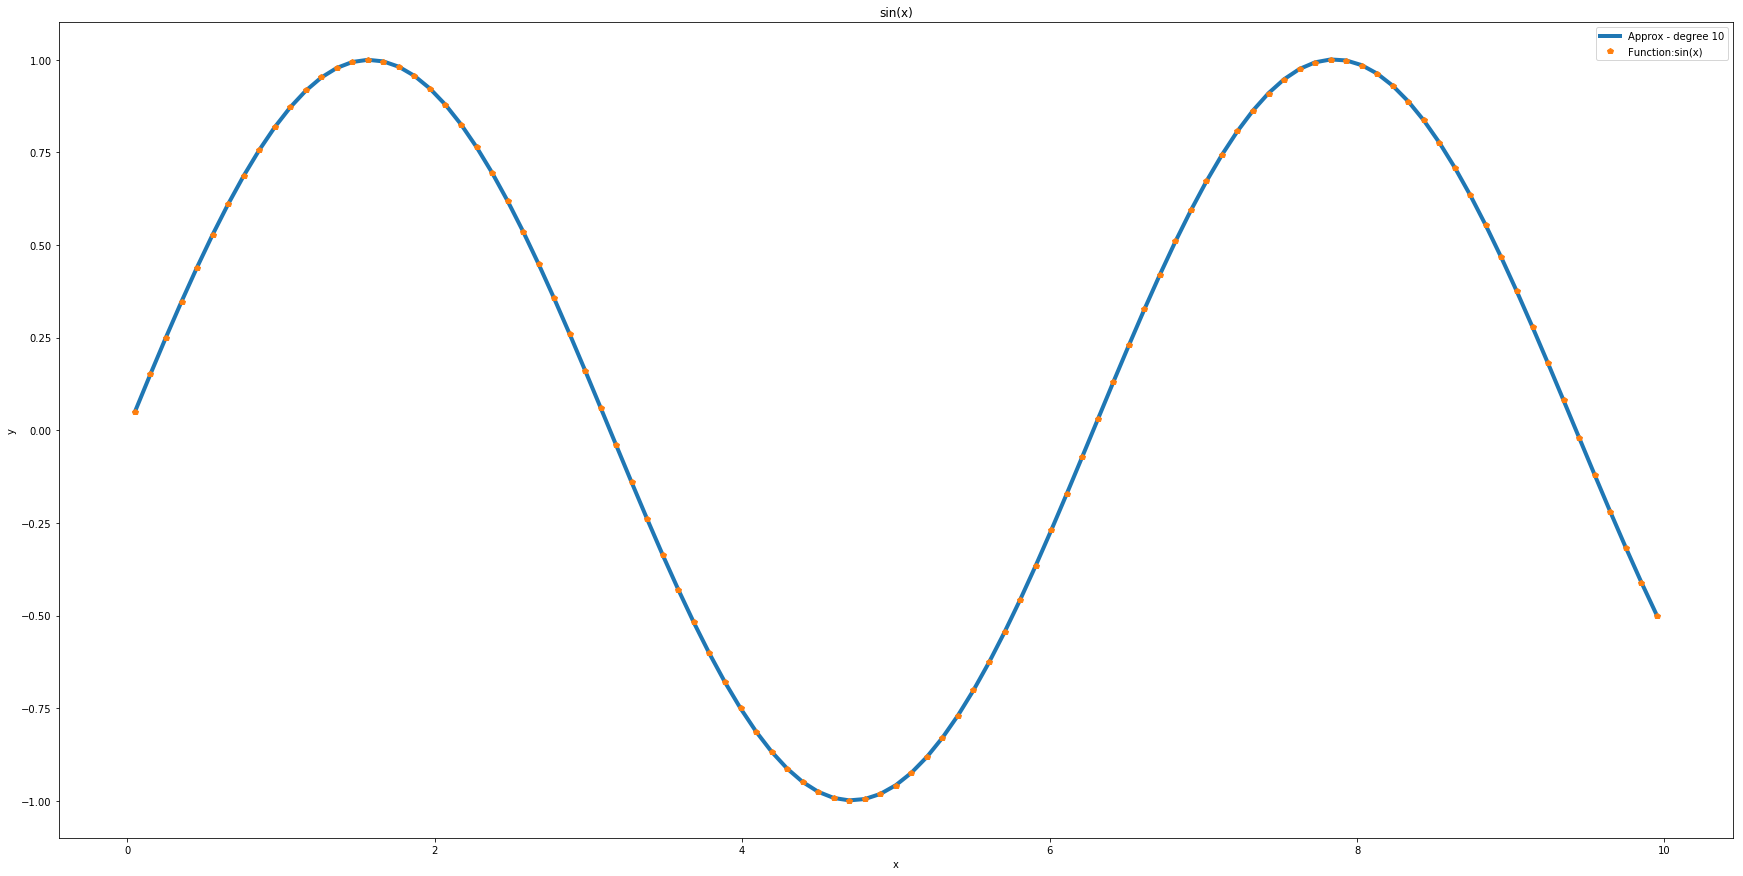

Function: sqrt(x)


Degree: 1
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.8787885150      2.9103620334      0.6540552276
 0.1111111111  0.3333333333             0.9033684590      1.3207955920      0.5141189869
 0.2222222222  0.4714045208             0.9279484029      0.8465940064      0.4254294953
 0.3333333333  0.5773502692             0.9525283468      0.6019962092      0.3579399568
 0.4444444444  0.6666666667             0.9771082908      0.4492858056      0.3029084283
 0.5555555556  0.7453559925             1.0016882347      0.3439057911      0.2563322422
 0.6666666667  0.8164965809             1.0262681787      0.2665483748      0.2159807873
 0.7777777778  0.8819171037             1.0508481226      0.2073325744      0.1804598428
 0.8888888889  0.9428090416             1.0754280665      0.1606185324      0.14

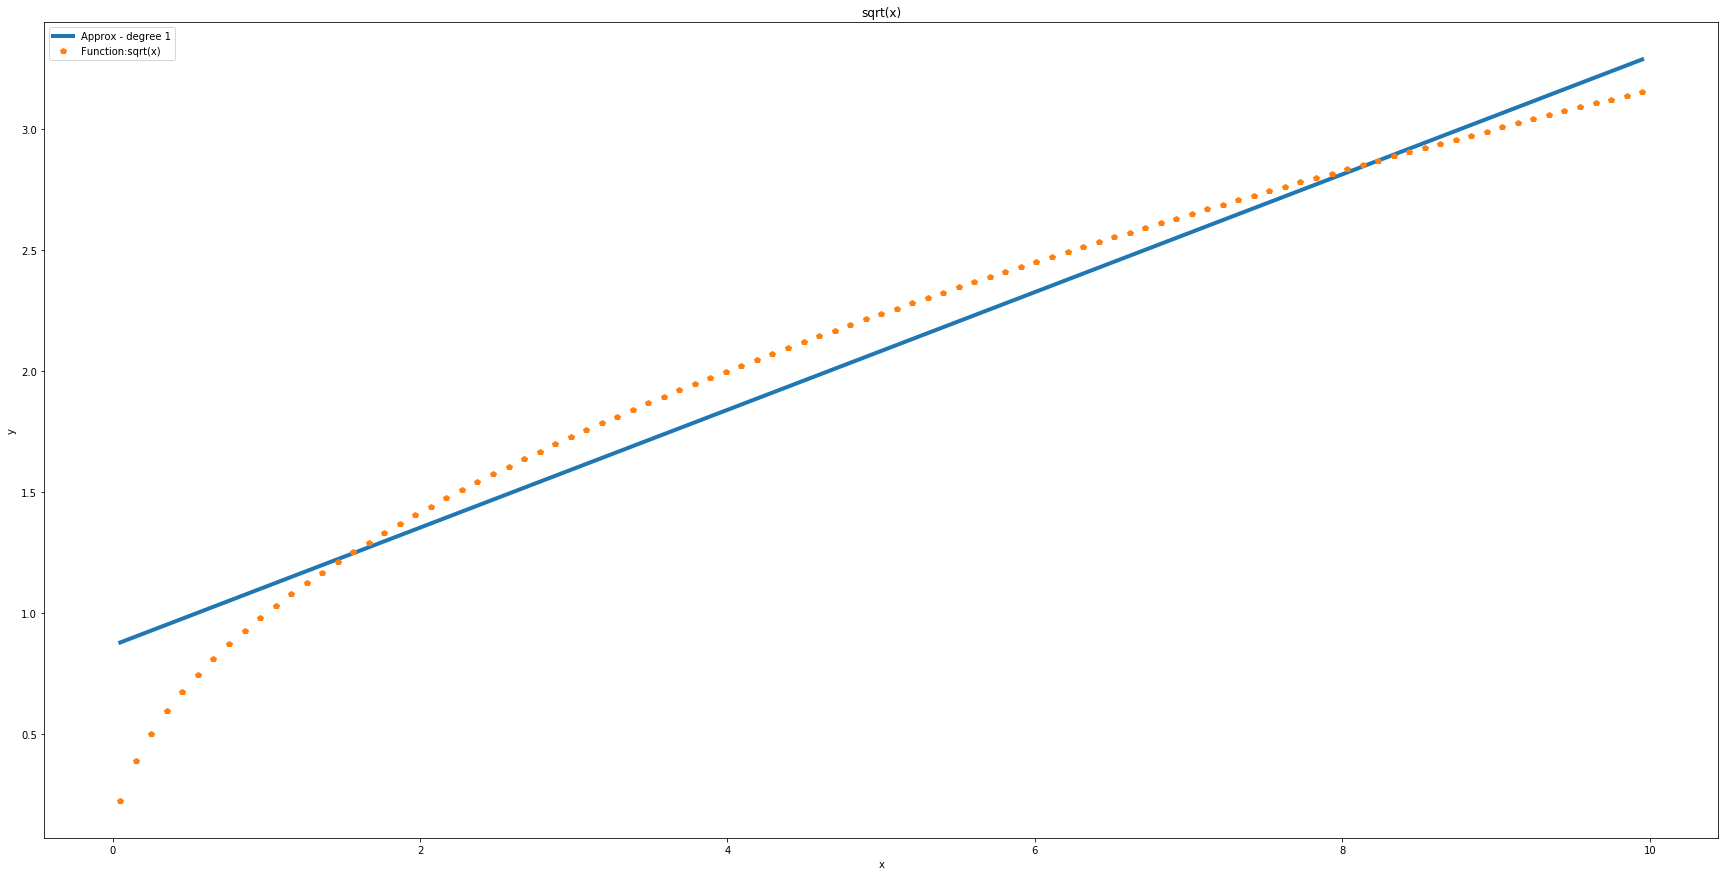



Degree: 2
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.5608761493      1.4957413101      0.3361428619
 0.1111111111  0.3333333333             0.6033205633      0.5499585911      0.2140710912
 0.2222222222  0.4714045208             0.6454307496      0.2843909748      0.1429118420
 0.3333333333  0.5773502692             0.6872067082      0.1557687970      0.0926183182
 0.4444444444  0.6666666667             0.7286484391      0.0807602904      0.0544485767
 0.5555555556  0.7453559925             0.7697559424      0.0327359679      0.0243999499
 0.6666666667  0.8164965809             0.8105292179      0.0002984454      0.0002418266
 0.7777777778  0.8819171037             0.8509682658      0.0223118974      0.0194200140
 0.8888888889  0.9428090416             0.8910730859      0.0383402020      0.0355259960
 1.000000

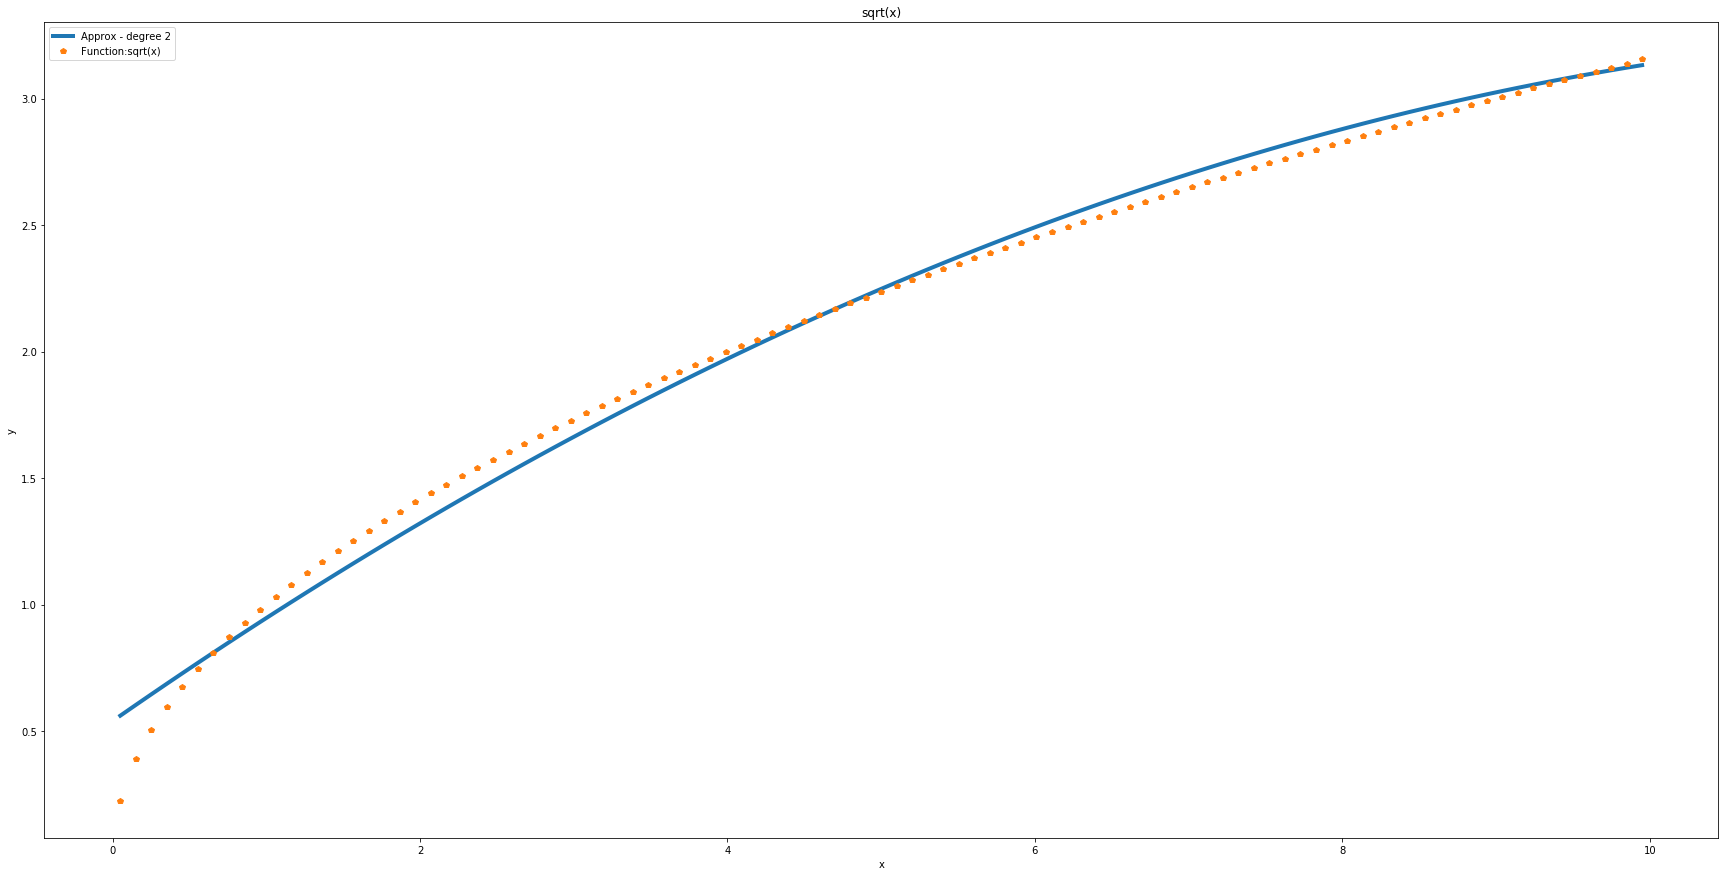



Degree: 3
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.4112264004      0.8298419651      0.1864931129
 0.1111111111  0.3333333333             0.4707700942      0.2094302702      0.0815206221
 0.2222222222  0.4714045208             0.5291755143      0.0530459774      0.0266566066
 0.3333333333  0.5773502692             0.5864578457      0.0136742400      0.0081305443
 0.4444444444  0.6666666667             0.6426322734      0.0468223013      0.0315675891
 0.5555555556  0.7453559925             0.6977139824      0.0639184639      0.0476420101
 0.6666666667  0.8164965809             0.7517181577      0.0722820499      0.0585692336
 0.7777777778  0.8819171037             0.8046599844      0.0755160621      0.0657282954
 0.8888888889  0.9428090416             0.8565546473      0.0755930326      0.0700444346
 1.000000

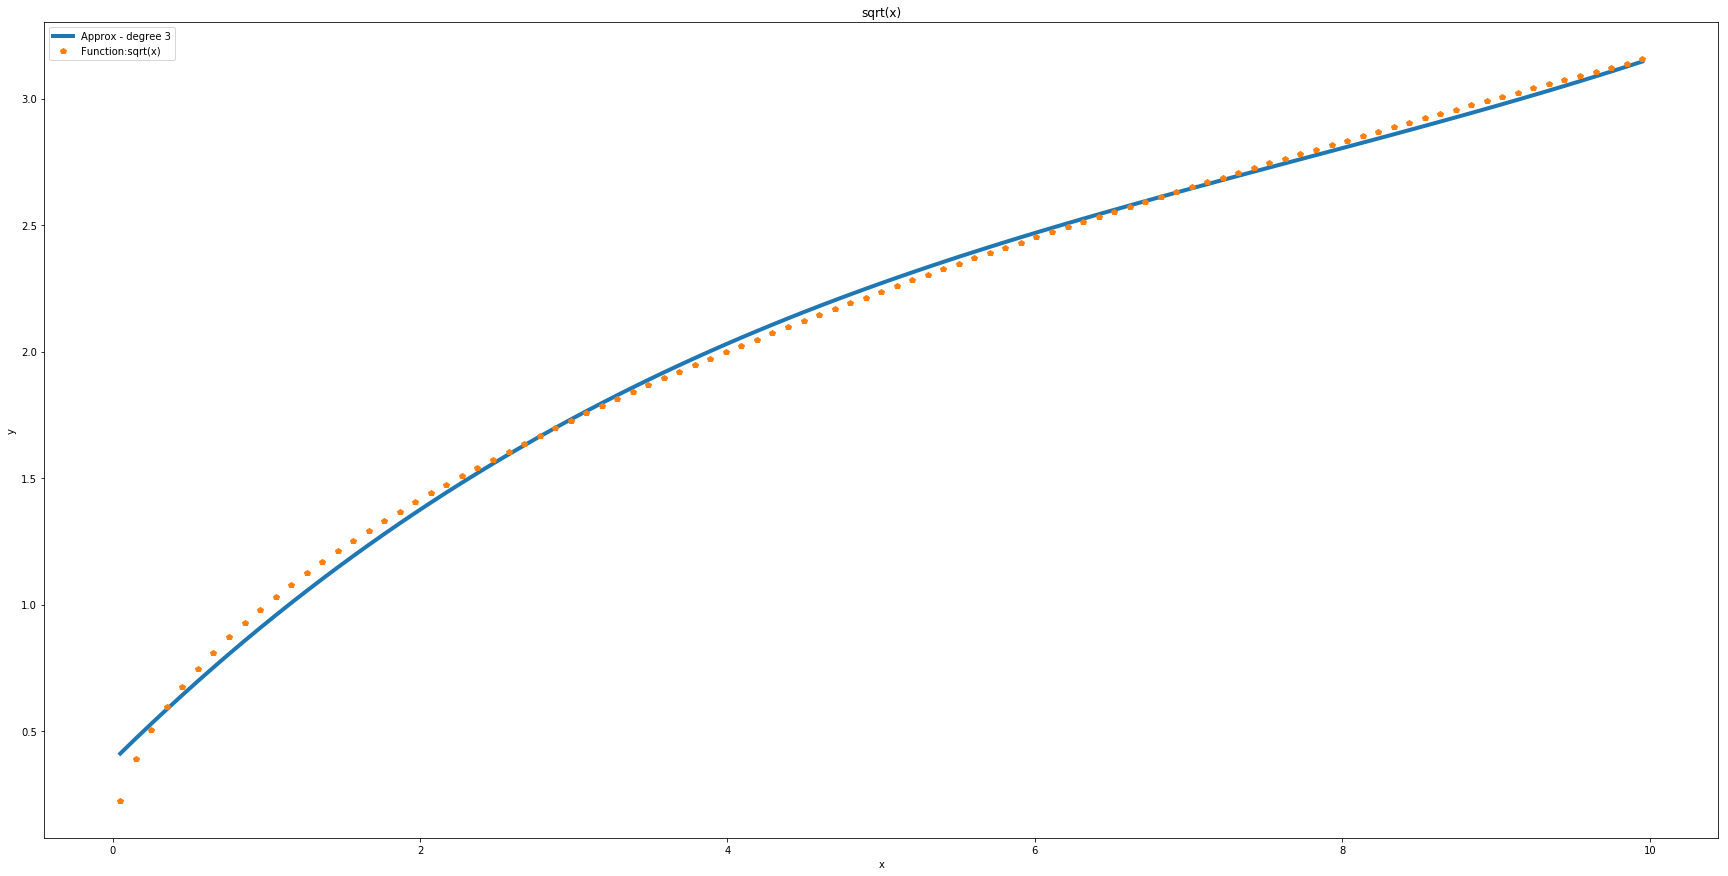



Degree: 4
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.3234155963      0.4391085538      0.0986823089
 0.1111111111  0.3333333333             0.4000839370      0.0278342444      0.0108344650
 0.2222222222  0.4714045208             0.4741538064      0.0564458388      0.0283651012
 0.3333333333  0.5773502692             0.5457049679      0.0822138859      0.0488834221
 0.4444444444  0.6666666667             0.6148159540      0.0880805704      0.0593839085
 0.5555555556  0.7453559925             0.6815640656      0.0855858509      0.0637919269
 0.6666666667  0.8164965809             0.7460253727      0.0793076868      0.0642620186
 0.7777777778  0.8819171037             0.8082747138      0.0713630542      0.0621135660
 0.8888888889  0.9428090416             0.8683856962      0.0628247824      0.0582133857
 1.000000

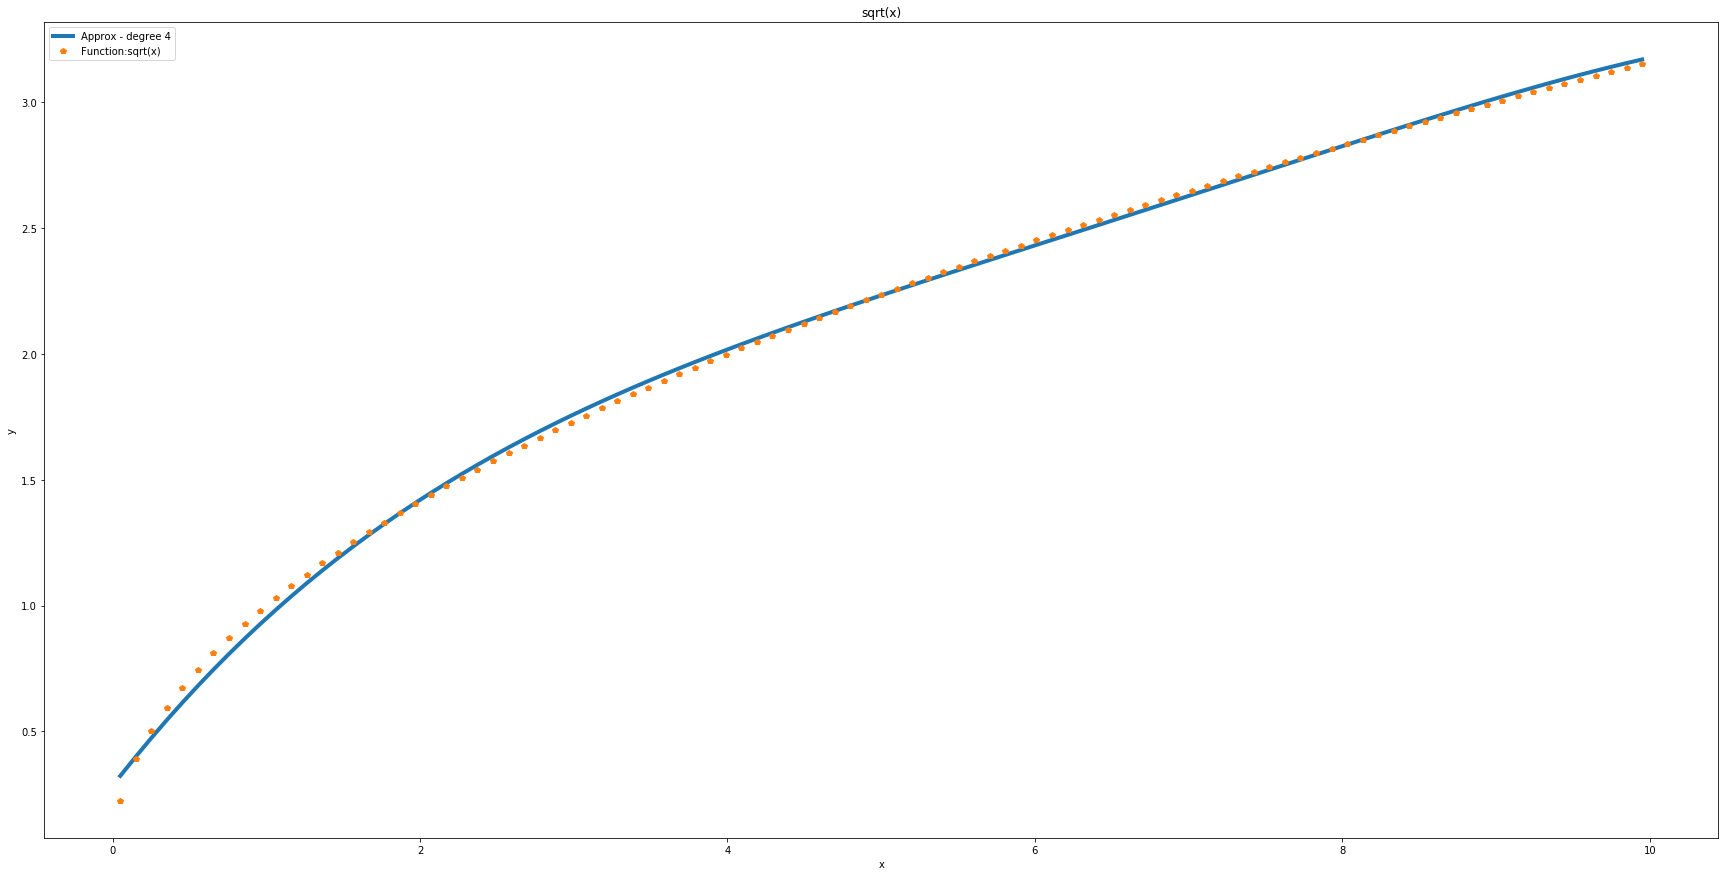



Degree: 5
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.2661765836      0.1844110260      0.0414432961
 0.1111111111  0.3333333333             0.3601475165      0.0747642775      0.0291019556
 0.2222222222  0.4714045208             0.4492023940      0.1060985224      0.0533165136
 0.3333333333  0.5773502692             0.5335975145      0.1025766337      0.0609908755
 0.4444444444  0.6666666667             0.6135803512      0.0899132656      0.0606195113
 0.5555555556  0.7453559925             0.6893896984      0.0750866628      0.0559662941
 0.6666666667  0.8164965809             0.7612558179      0.0605113370      0.0490315734
 0.7777777778  0.8819171037             0.8294005847      0.0470912764      0.0409876950
 0.8888888889  0.9428090416             0.8940376336      0.0351408165      0.0325614483
 1.000000

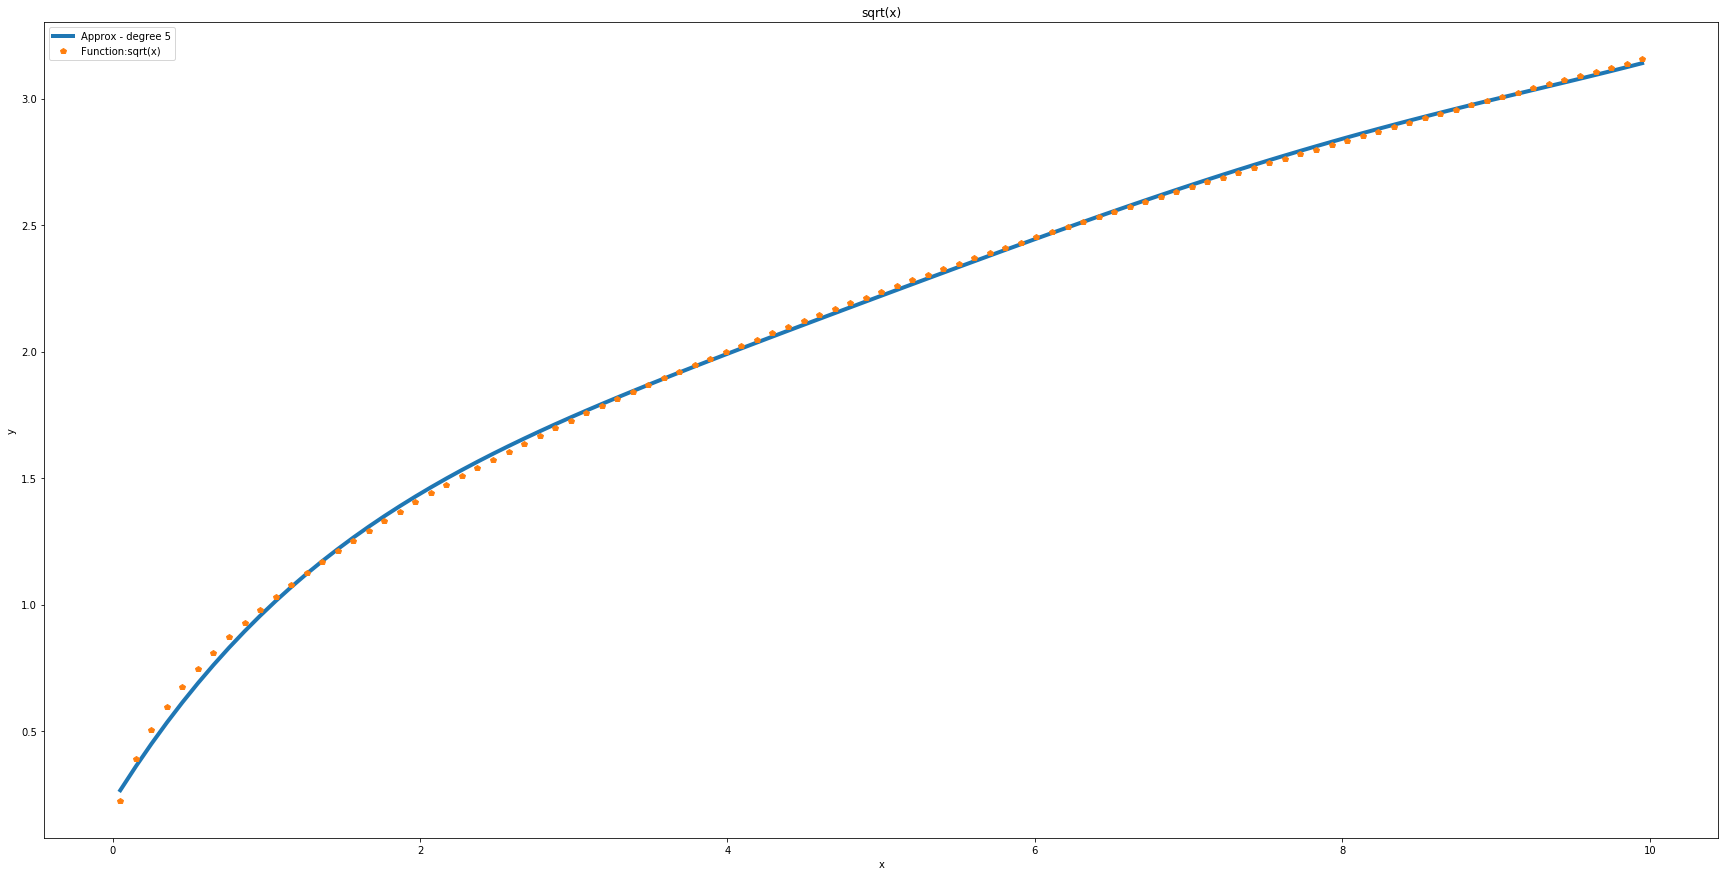



Degree: 6
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.2269327482      0.0097869825      0.0021994607
 0.1111111111  0.3333333333             0.3382726784      0.1309617542      0.0509767937
 0.2222222222  0.4714045208             0.4413308838      0.1217626301      0.0611880238
 0.3333333333  0.5773502692             0.5367504938      0.0972738404      0.0578378962
 0.4444444444  0.6666666667             0.6251379847      0.0727705248      0.0490618778
 0.5555555556  0.7453559925             0.7070645062      0.0513734198      0.0382914863
 0.6666666667  0.8164965809             0.7830671867      0.0335932719      0.0272202047
 0.7777777778  0.8819171037             0.8536504140      0.0192303437      0.0167378658
 0.8888888889  0.9428090416             0.9192870940      0.0078912100      0.0073119879
 1.000000

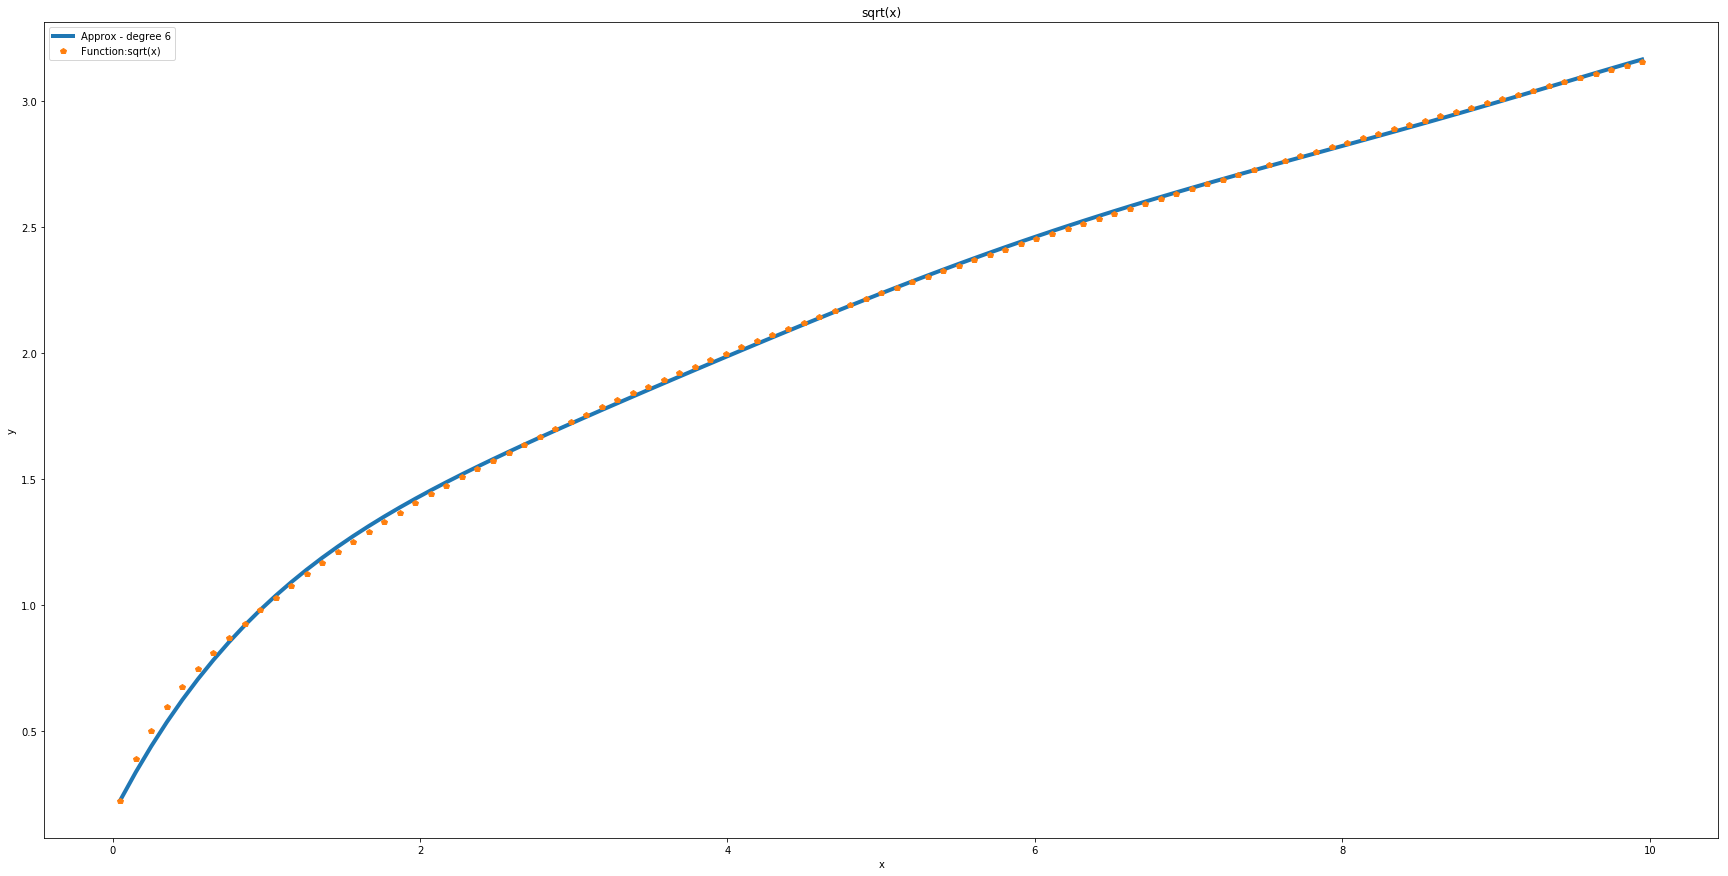



Degree: 7
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1996018908      0.1118276556      0.0251313967
 0.1111111111  0.3333333333             0.3280947864      0.1571092321      0.0611546857
 0.2222222222  0.4714045208             0.4437463414      0.1169559300      0.0587725662
 0.3333333333  0.5773502692             0.5479328804      0.0784669032      0.0466555096
 0.4444444444  0.6666666667             0.6419163907      0.0478841268      0.0322834717
 0.5555555556  0.7453559925             0.7268512603      0.0248267035      0.0185047322
 0.6666666667  0.8164965809             0.8037907628      0.0080176843      0.0064966285
 0.7777777778  0.8819171037             0.8736932978      0.0037971766      0.0033050180
 0.8888888889  0.9428090416             0.9374283869      0.0116871527      0.0108293050
 1.000000

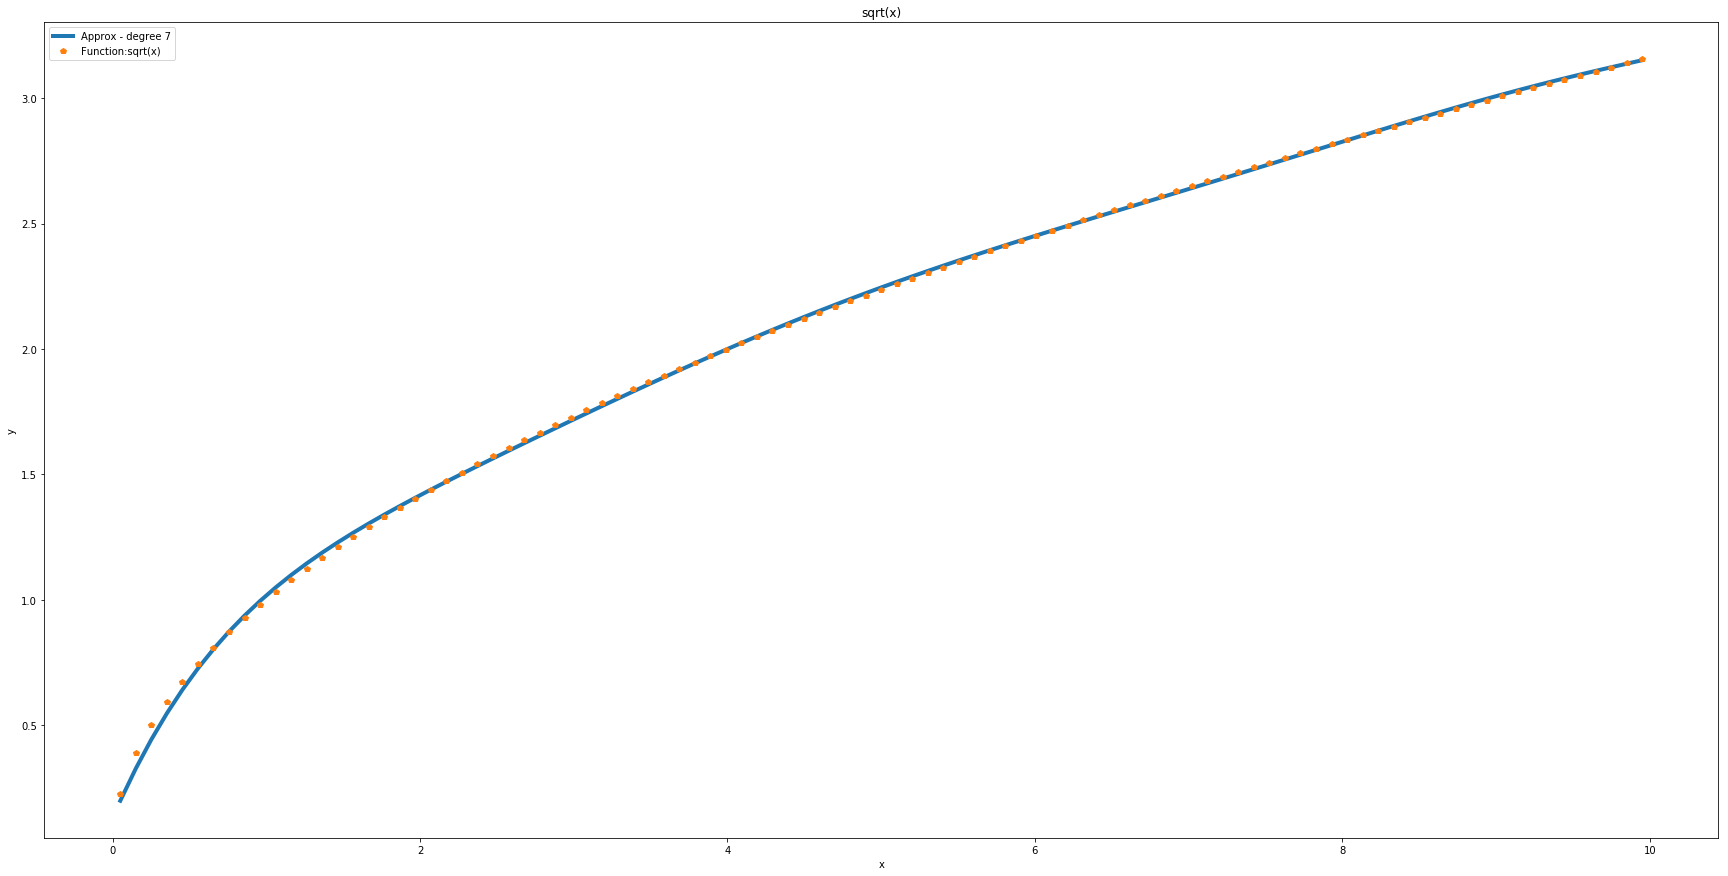



Degree: 8
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1808028468      0.1954781206      0.0439304407
 0.1111111111  0.3333333333             0.3258387624      0.1629050628      0.0634107097
 0.2222222222  0.4714045208             0.4522158319      0.1001018568      0.0503030757
 0.3333333333  0.5773502692             0.5625563140      0.0538726900      0.0320320760
 0.4444444444  0.6666666667             0.6591872096      0.0222673627      0.0150126529
 0.5555555556  0.7453559925             0.7441652571      0.0015975392      0.0011907354
 0.6666666667  0.8164965809             0.8193004285      0.0111232598      0.0090130372
 0.7777777778  0.8819171037             0.8861779851      0.0181409903      0.0157897053
 0.8888888889  0.9428090416             0.9461791468      0.0211311076      0.0195800649
 1.000000

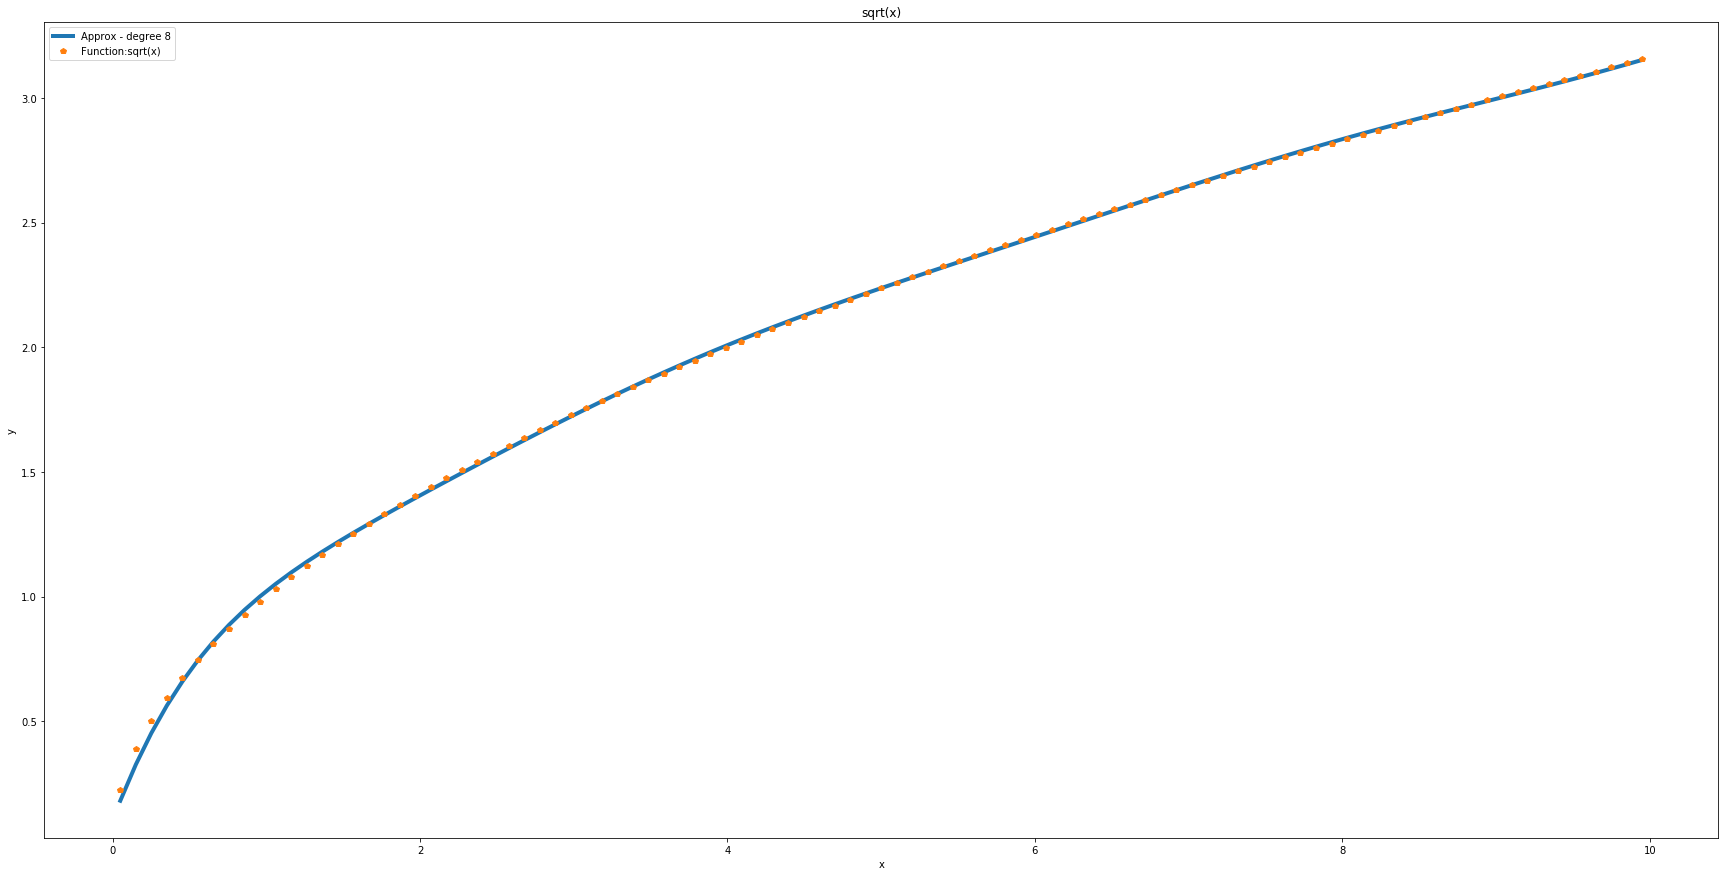



Degree: 9
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1684056270      0.2506422665      0.0563276605
 0.1111111111  0.3333333333             0.3289337089      0.1549540011      0.0603157631
 0.2222222222  0.4714045208             0.4637742846      0.0771008263      0.0387446230
 0.3333333333  0.5773502692             0.5774865898      0.0287624186      0.0171018002
 0.4444444444  0.6666666667             0.6739667505      0.0003457609      0.0002331119
 0.5555555556  0.7453559925             0.7565229394      0.0149820315      0.0111669469
 0.6666666667  0.8164965809             0.8279441271      0.0217907078      0.0176567358
 0.7777777778  0.8819171037             0.8905628149      0.0231787762      0.0201745351
 0.8888888889  0.9428090416             0.9463121239      0.0212746185      0.0197130420
 1.000000

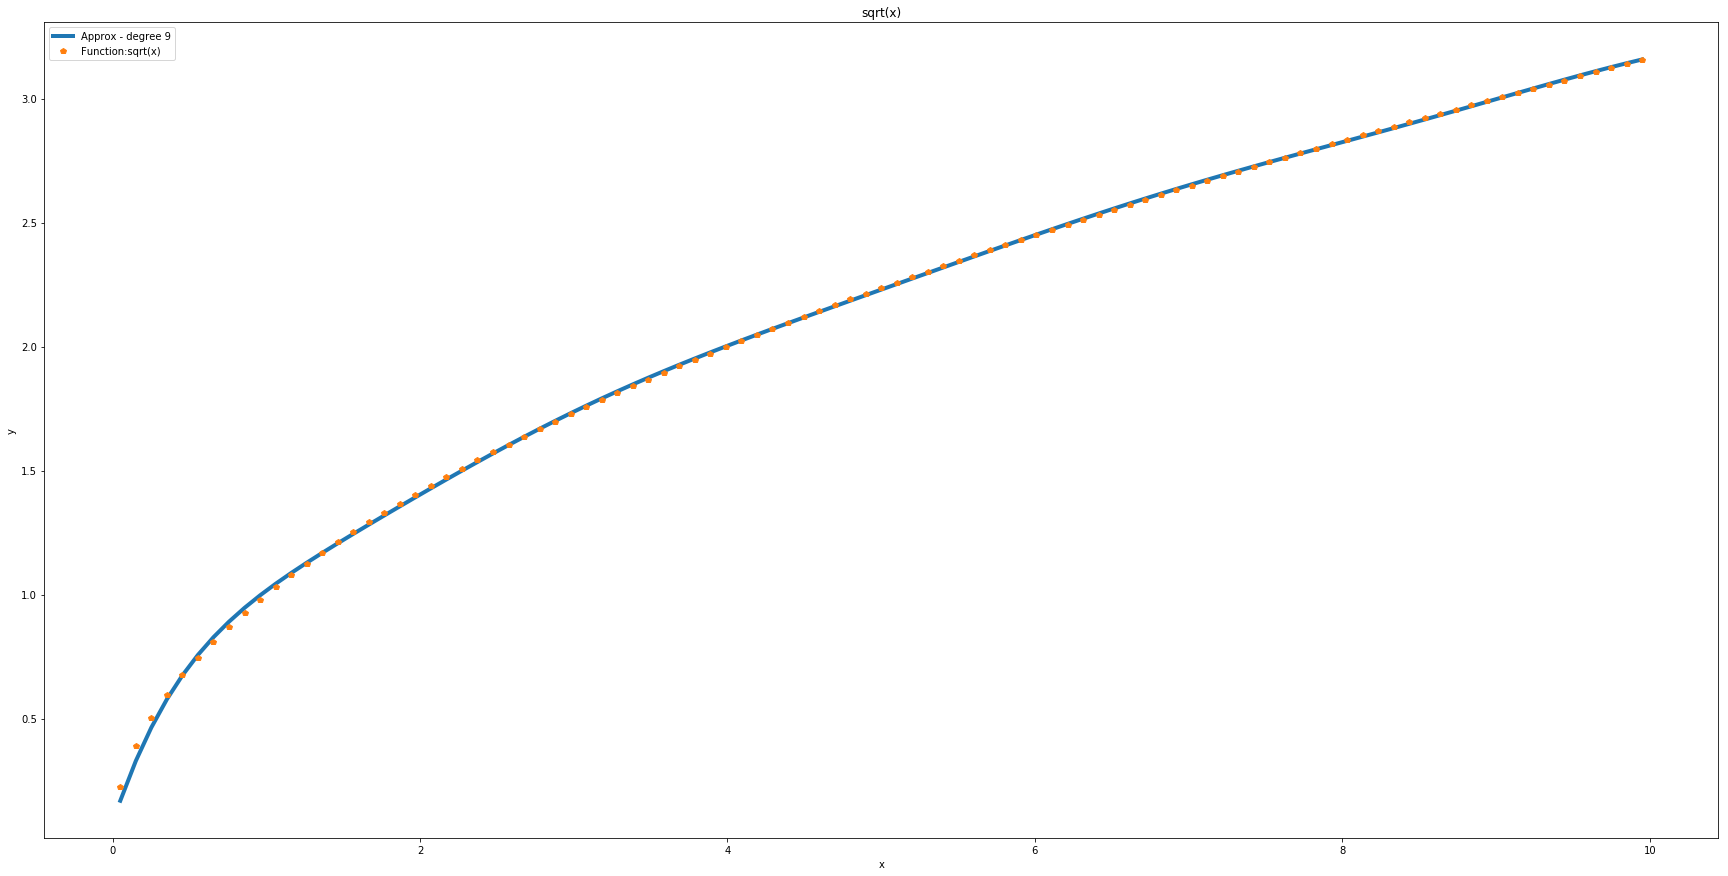



Degree: 10
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1608859276      0.2841028162      0.0638473599
 0.1111111111  0.3333333333             0.3354732720      0.1381535595      0.0537762001
 0.2222222222  0.4714045208             0.4762806332      0.0522135069      0.0262382744
 0.3333333333  0.5773502692             0.5906652308      0.0065981094      0.0039231592
 0.4444444444  0.6666666667             0.6846488308      0.0154983246      0.0104489683
 0.5555555556  0.7453559925             0.7631112977      0.0238212416      0.0177553052
 0.6666666667  0.8164965809             0.8299622488      0.0242813323      0.0196748574
 0.7777777778  0.8819171037             0.8882926865      0.0205705972      0.0179044067
 0.8888888889  0.9428090416             0.9405083658      0.0150111134      0.0139092839
 1.00000

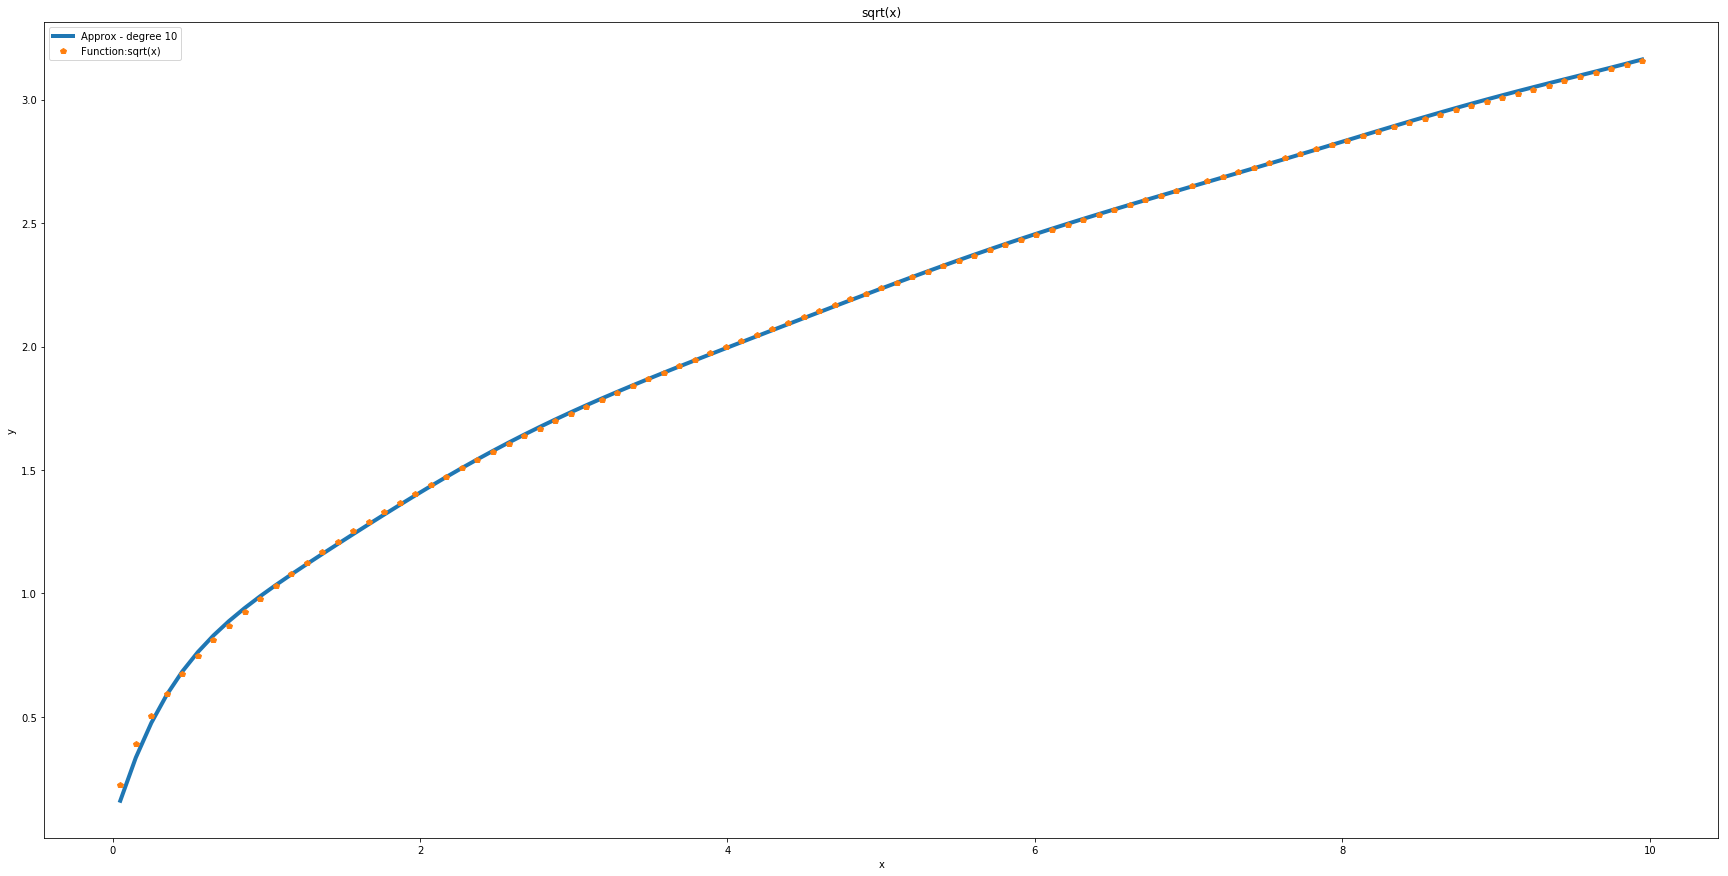

Function: x^3+2x


Degree: 1
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000         -259.2225713929   2564.0346135426    259.3237103202
 0.1111111111     0.2235939643         -247.9837635615    810.0596923387    248.2902721738
 0.2222222222     0.4554183813         -236.7449557301    455.2708138627    237.2661095188
 0.3333333333     0.7037037037         -225.5061478987    301.1713295242    226.2574060161
 0.4444444444     0.9766803841         -214.2673400673    214.6253405465    215.2703453265
 0.5555555556     1.2825788752         -203.0285322359    159.2971122995    204.3111111111
 0.6666666667     1.6296296296         -191.7897244045    121.1567567498    193.3858870307
 0.7777777778     2.0260631001         -180.5509165731     93.5930544258    182.5008567462
 0.8888888889     2.4801097394         -169.3121087417     73

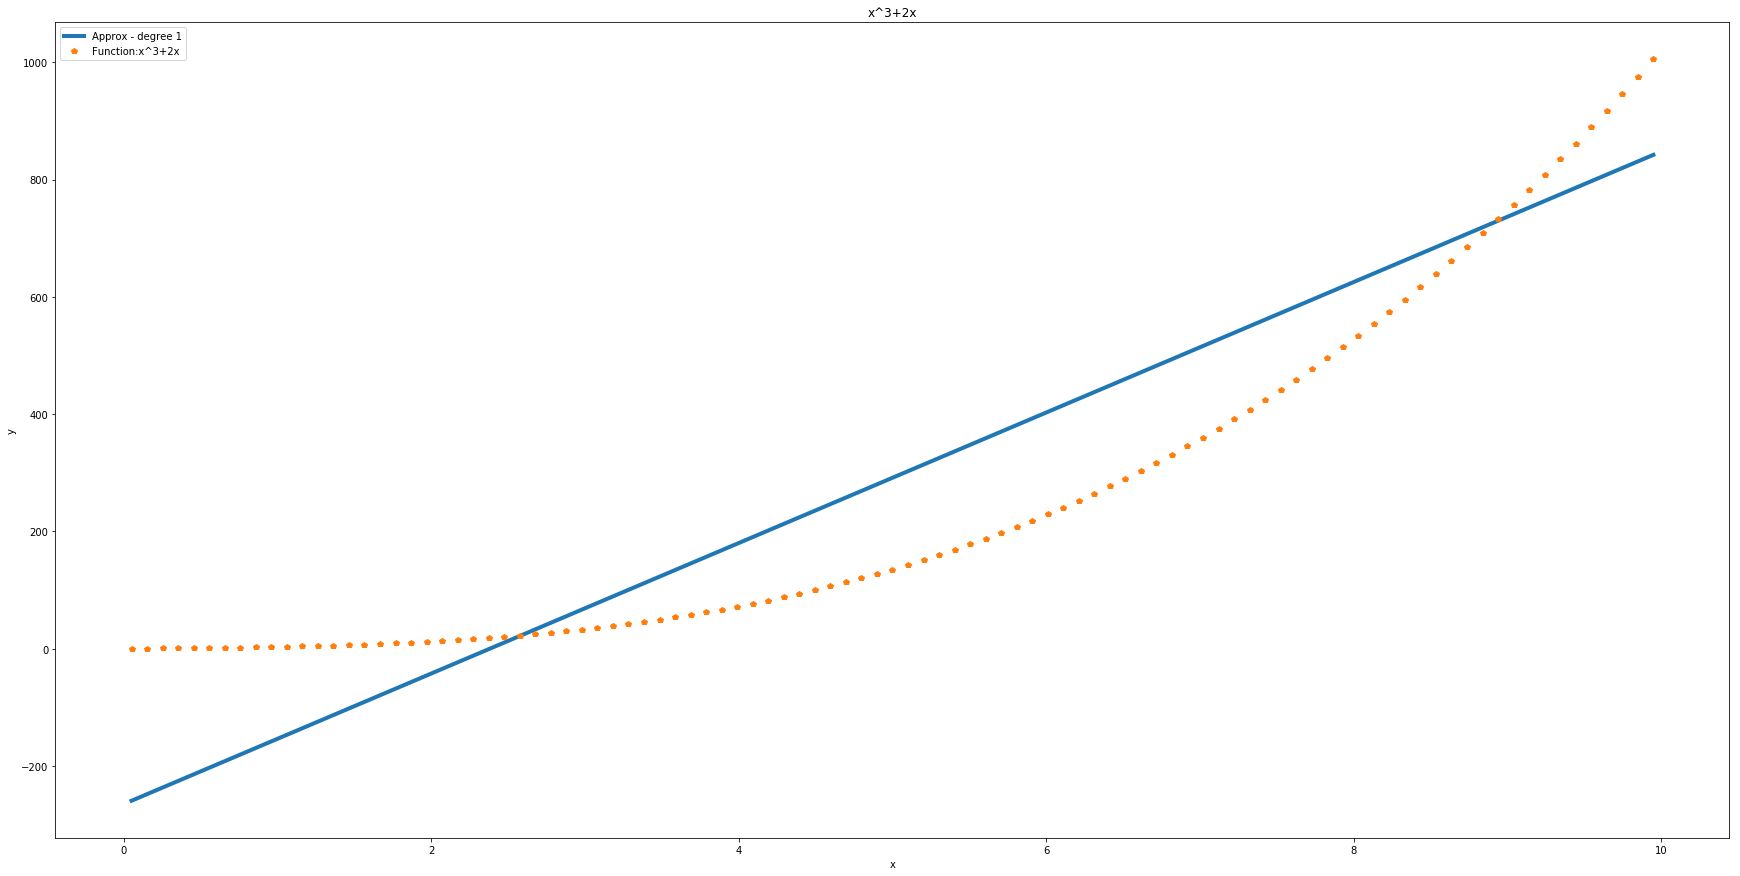



Degree: 2
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000           61.0417383714    602.5434625771     60.9405994441
 0.1111111111     0.2235939643           54.2839132061    176.1040389368     53.9774045938
 0.2222222222     0.4554183813           47.8627883776     90.8400468680     47.3416345889
 0.3333333333     0.7037037037           41.7783638858     54.6111979642     41.0271057684
 0.4444444444     0.9766803841           36.0306397306     34.9226827577     35.0276344714
 0.5555555556     1.2825788752           30.6196159122     22.8734759358     29.3370370370
 0.6666666667     1.6296296296           25.5452924305     15.0041915603     23.9491298043
 0.7777777778     2.0260631001           20.8076692854      9.6709270226     18.8577291124
 0.8888888889     2.4801097394           16.4067464771      5.9813114970     1



Degree: 3
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000001      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000
 0.4444444444     0.9766803841            1.0030052592      0.0000000000      0.0000000000
 0.5555555556     1.2825788752            1.2825788752      0.0000000000      0.0000000000
 0.6666666667     1.6296296296            1.5961626262      0.0000000000      0.0000000000
 0.7777777778     2.0260631001            1.9499401731      0.0000000000      0.0000000000
 0.8888888889     2.4801097394            2.3500951768      0.0000000000      



Degree: 4
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000002      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000001      0.0000000000
 0.2222222222     0.4554183813            0.5211537886      0.0000000001      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000001      0.0000000001
 0.4444444444     0.9766803841            1.0030052591      0.0000000001      0.0000000001
 0.5555555556     1.2825788752            1.2825788751      0.0000000001      0.0000000001
 0.6666666667     1.6296296296            1.5961626261      0.0000000001      0.0000000001
 0.7777777778     2.0260631001            1.9499401730      0.0000000000      0.0000000001
 0.8888888889     2.4801097394            2.3500951767      0.0000000000      

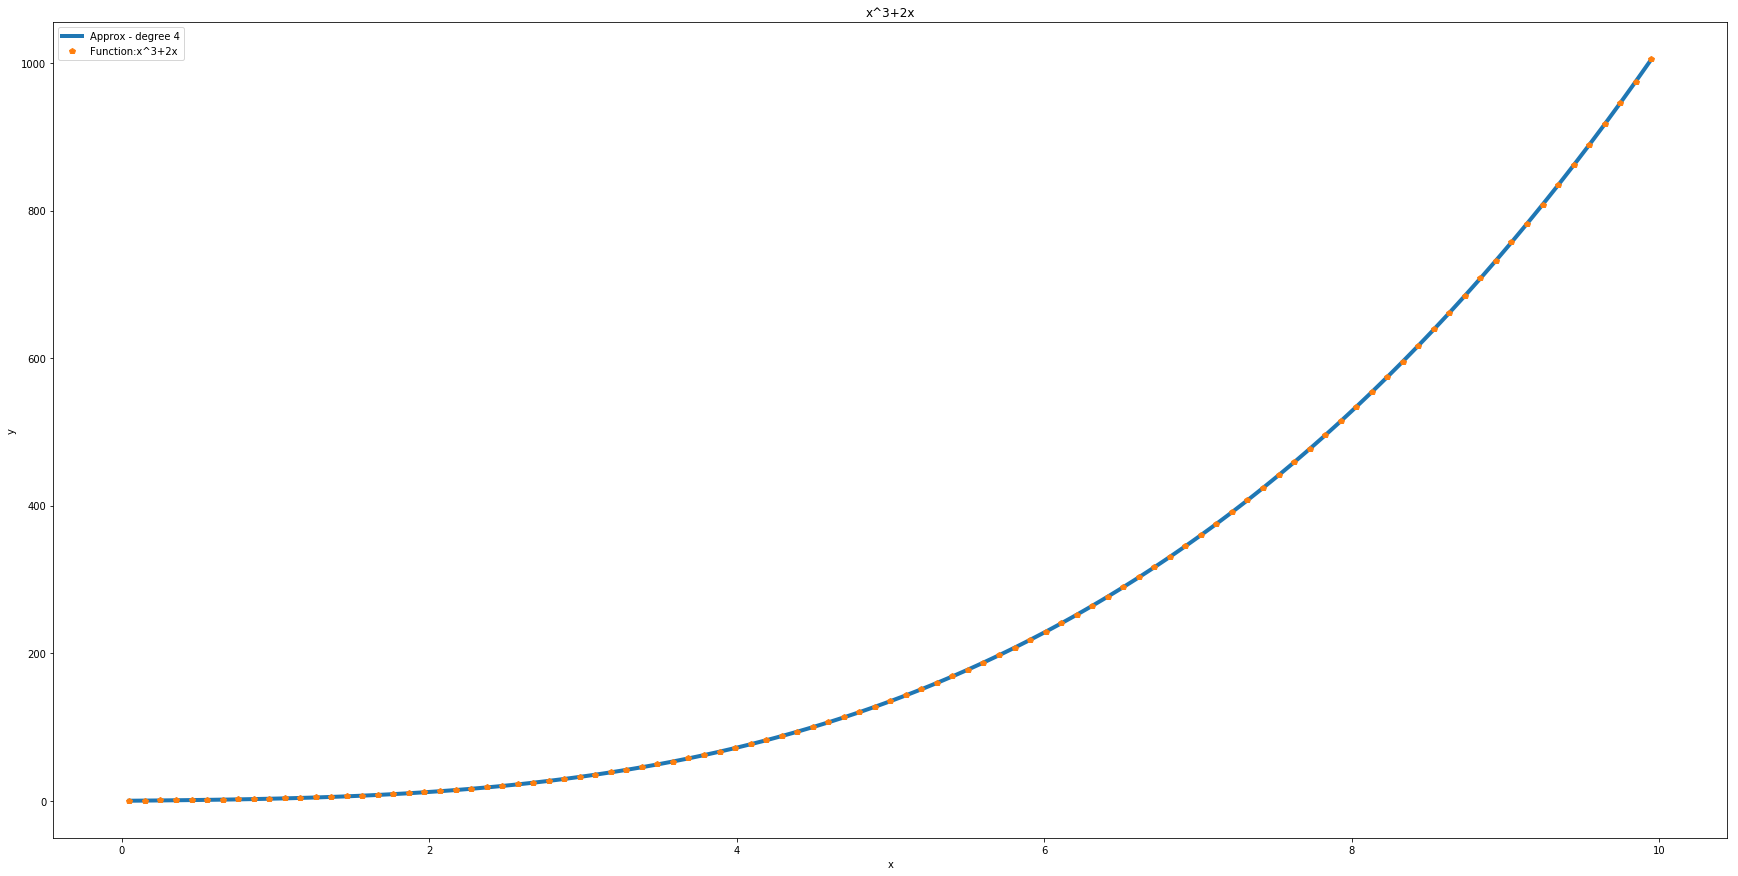



Degree: 5
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389272      0.0000000008      0.0000000001
 0.1111111111     0.2235939643            0.3065086123      0.0000000001      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000001      0.0000000000
 0.3333333333     0.7037037037            0.7512581174      0.0000000001      0.0000000001
 0.4444444444     0.9766803841            1.0030052594      0.0000000002      0.0000000002
 0.5555555556     1.2825788752            1.2825788754      0.0000000002      0.0000000002
 0.6666666667     1.6296296296            1.5961626264      0.0000000002      0.0000000003
 0.7777777778     2.0260631001            1.9499401734      0.0000000002      0.0000000003
 0.8888888889     2.4801097394            2.3500951772      0.0000000001      

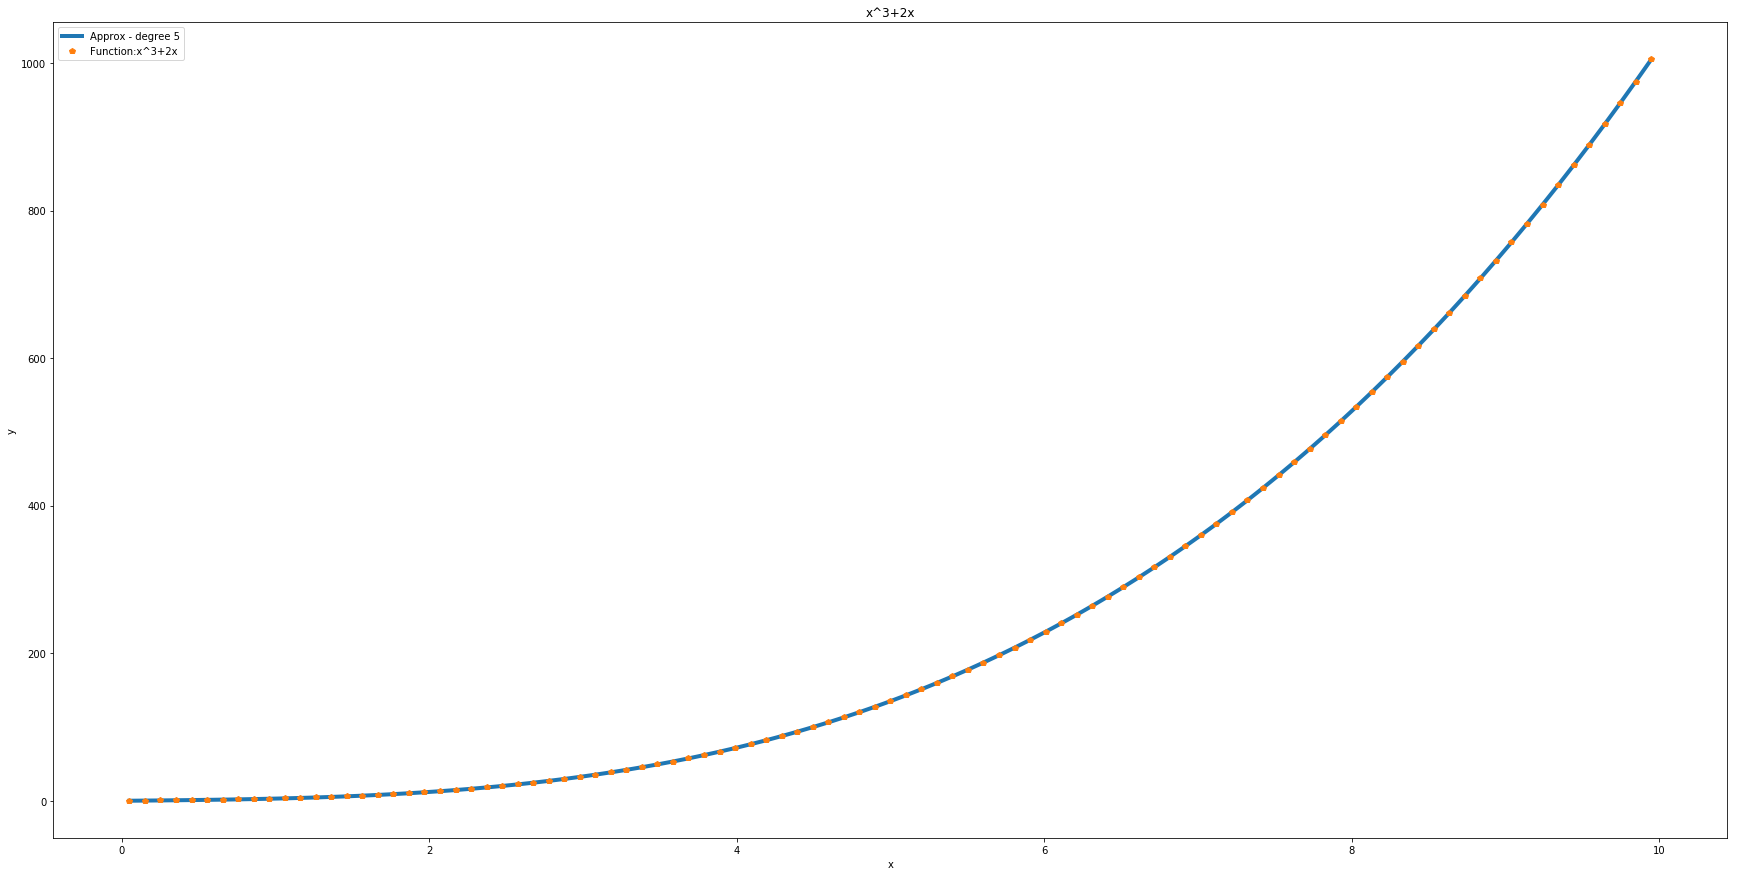



Degree: 6
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389284      0.0000000110      0.0000000011
 0.1111111111     0.2235939643            0.3065086133      0.0000000033      0.0000000010
 0.2222222222     0.4554183813            0.5211537896      0.0000000018      0.0000000009
 0.3333333333     0.7037037037            0.7512581182      0.0000000012      0.0000000009
 0.4444444444     0.9766803841            1.0030052600      0.0000000008      0.0000000008
 0.5555555556     1.2825788752            1.2825788760      0.0000000006      0.0000000008
 0.6666666667     1.6296296296            1.5961626270      0.0000000005      0.0000000008
 0.7777777778     2.0260631001            1.9499401739      0.0000000004      0.0000000008
 0.8888888889     2.4801097394            2.3500951778      0.0000000004      

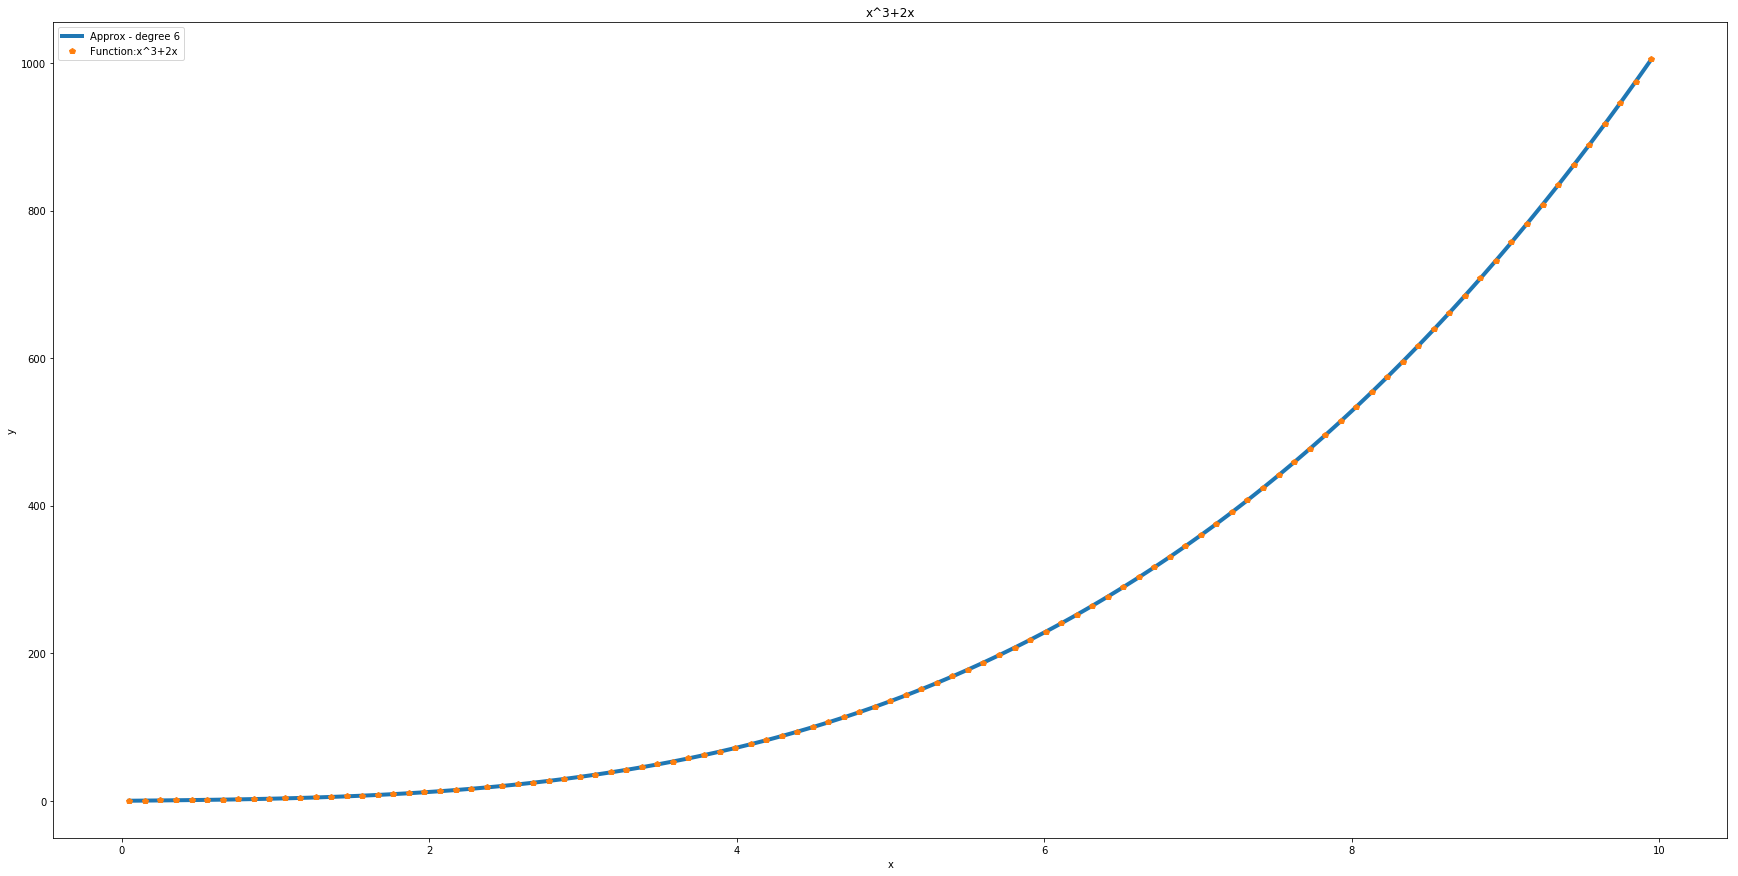



Degree: 7
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389265      0.0000000076      0.0000000008
 0.1111111111     0.2235939643            0.3065086136      0.0000000042      0.0000000013
 0.2222222222     0.4554183813            0.5211537919      0.0000000063      0.0000000033
 0.3333333333     0.7037037037            0.7512581227      0.0000000071      0.0000000054
 0.4444444444     0.9766803841            1.0030052670      0.0000000077      0.0000000078
 0.5555555556     1.2825788752            1.2825788858      0.0000000083      0.0000000106
 0.6666666667     1.6296296296            1.5961626403      0.0000000089      0.0000000142
 0.7777777778     2.0260631001            1.9499401917      0.0000000095      0.0000000186
 0.8888888889     2.4801097394            2.3500952009      0.0000000102      

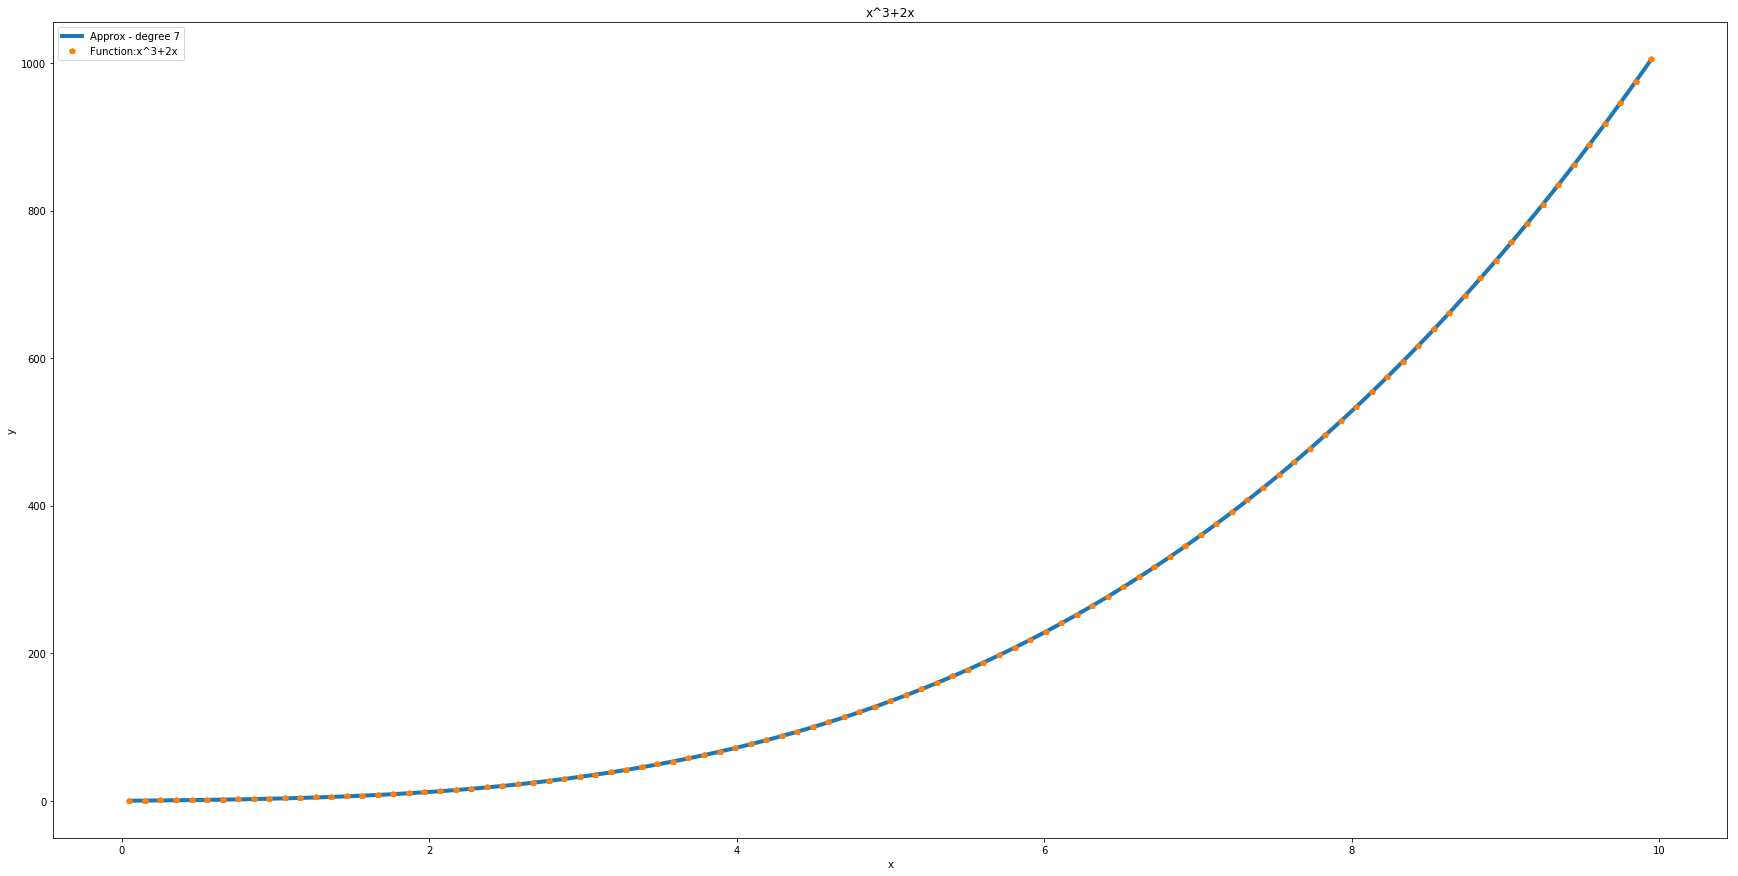



Degree: 8
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389293      0.0000000201      0.0000000020
 0.1111111111     0.2235939643            0.3065086213      0.0000000294      0.0000000090
 0.2222222222     0.4554183813            0.5211538078      0.0000000367      0.0000000192
 0.3333333333     0.7037037037            0.7512581486      0.0000000416      0.0000000312
 0.4444444444     0.9766803841            1.0030053028      0.0000000434      0.0000000436
 0.5555555556     1.2825788752            1.2825789293      0.0000000422      0.0000000541
 0.6666666667     1.6296296296            1.5961626864      0.0000000378      0.0000000603
 0.7777777778     2.0260631001            1.9499402322      0.0000000303      0.0000000592
 0.8888888889     2.4801097394            2.3500952243      0.0000000202      



Degree: 9
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011385595      0.0000036360      0.0000003677
 0.1111111111     0.2235939643            0.3065084090      0.0000006633      0.0000002033
 0.2222222222     0.4554183813            0.5211537063      0.0000001580      0.0000000823
 0.3333333333     0.7037037037            0.7512581411      0.0000000316      0.0000000238
 0.4444444444     0.9766803841            1.0030053974      0.0000001378      0.0000001382
 0.5555555556     1.2825788752            1.2825791545      0.0000002178      0.0000002794
 0.6666666667     1.6296296296            1.5961630876      0.0000002891      0.0000004614
 0.7777777778     2.0260631001            1.9499408675      0.0000003561      0.0000006944
 0.8888888889     2.4801097394            2.3500961617      0.0000004191      



Degree: 10
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011371830      0.0000172467      0.0000017443
 0.1111111111     0.2235939643            0.3065077007      0.0000029742      0.0000009116
 0.2222222222     0.4554183813            0.5211521689      0.0000031081      0.0000016198
 0.3333333333     0.7037037037            0.7512547719      0.0000044531      0.0000033454
 0.4444444444     0.9766803841            1.0029996358      0.0000056065      0.0000056234
 0.5555555556     1.2825788752            1.2825708372      0.0000062670      0.0000080380
 0.6666666667     1.6296296296            1.5961524116      0.0000063994      0.0000102145
 0.7777777778     2.0260631001            1.9499283602      0.0000060581      0.0000118129
 0.8888888889     2.4801097394            2.3500826561      0.0000053278     

In [5]:
# WIZUALIZACJA I WYNIKI KOŃCOWE
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate
from matplotlib.pyplot import figure

def show_graph(fx, results, d, fx_name):
    fig,ax=plt.subplots()
    fig.set_size_inches(30, 15)
    points = getPoints(100)
    plt.plot(points, results, linewidth = 4, label ='Approx - degree ' + str(d))
    plt.plot(points, fx(points),'p', label='Function:'+ fx_name) 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(fx_name)
    plt.legend()
    plt.show()

def compare_precision(fx, d, fx_name):
    points = getPoints(100)
    val_x = np.array(np.linspace(0, 11, 100))
    val_y = lookupTab(fx,100)
    poly = least_squares_aproxy(val_y, val_x, d)
    results =  poly(points)
    absolute_error = (len(points)) *[0]
    relative_error = (len(points)) * [0]
    for i in range(0, len(fx(points))):
        absolute_error[i] = abs(results[i] - fx((points)[i]))
        relative_error[i] = absolute_error[i]/fx((points)[i])
    print(tabulate({"x": val_x, fx_name: val_y, fx_name + " approximation": results, 
                  "relative error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    print("Mean of statistic error: ",statistics.mean(relative_error))
    show_graph(fx, results, d, fx_name)

def show():
    fx = [lambda x: np.sin(x), lambda x: np.sqrt(x), lambda x: x**3+2*x]
    fx_names=["sin(x)", "sqrt(x)", "x^3+2x"]
    
    for f in range(len(fx)):
        print("Function:", fx_names[f])
        for i in range(1, 11, +1):
            print("\n\nDegree:", i)
            compare_precision(fx[f], i, fx_names[f])
            
show()        


### Aproksymacja wielomianowa średniokwadratowa dla danych o koronawirusie

Liczba chorych na COVID-19 w Polsce

Data       Liczba zachorowań
-------  -------------------
3/4/20                     1
3/5/20                     1
3/6/20                     5
3/7/20                     5
3/8/20                    11
3/9/20                    16
3/10/20                   22
3/11/20                   31
3/12/20                   49
3/13/20                   68
3/14/20                  103
3/15/20                  119
3/16/20                  177
3/17/20                  238
3/18/20                  251
3/19/20                  355
3/20/20                  425
3/21/20                  536
3/22/20                  634
3/23/20                  749
3/24/20                  901
3/25/20                 1051
3/26/20                 1221
3/27/20                 1389
3/28/20                 1638
3/29/20                 1862
3/30/20                 2055
3/31/20                 2311
4/1/20                  2554
4/2/20                  2946
4/3/20                  3383
4/4/20

Polynomial degree: 2
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1   244.5899159664    243.5899159664    243.5899159664
3/5/20                      1   159.0056531704    158.0056531704    158.0056531704
3/6/20                      5    86.2799656226     16.2559931245     81.2799656226
3/7/20                      5    26.4128533231      4.2825706646     21.4128533231
3/8/20                     11   -20.5956837280      2.8723348844     31.5956837280
3/9/20                     16   -54.7456455309      4.4216028457     70.7456455309
3/10/20                    22   -76.0370320856      4.4562287312     98.0370320856
3/11/20                    31   -84.4698433919      3.7248336578    115.4698433919
3/12/20                    49   -80.0440794500      2.6335526418    129.0440794500
3/13/20                    68   -62.7597402597      1.9229373568  

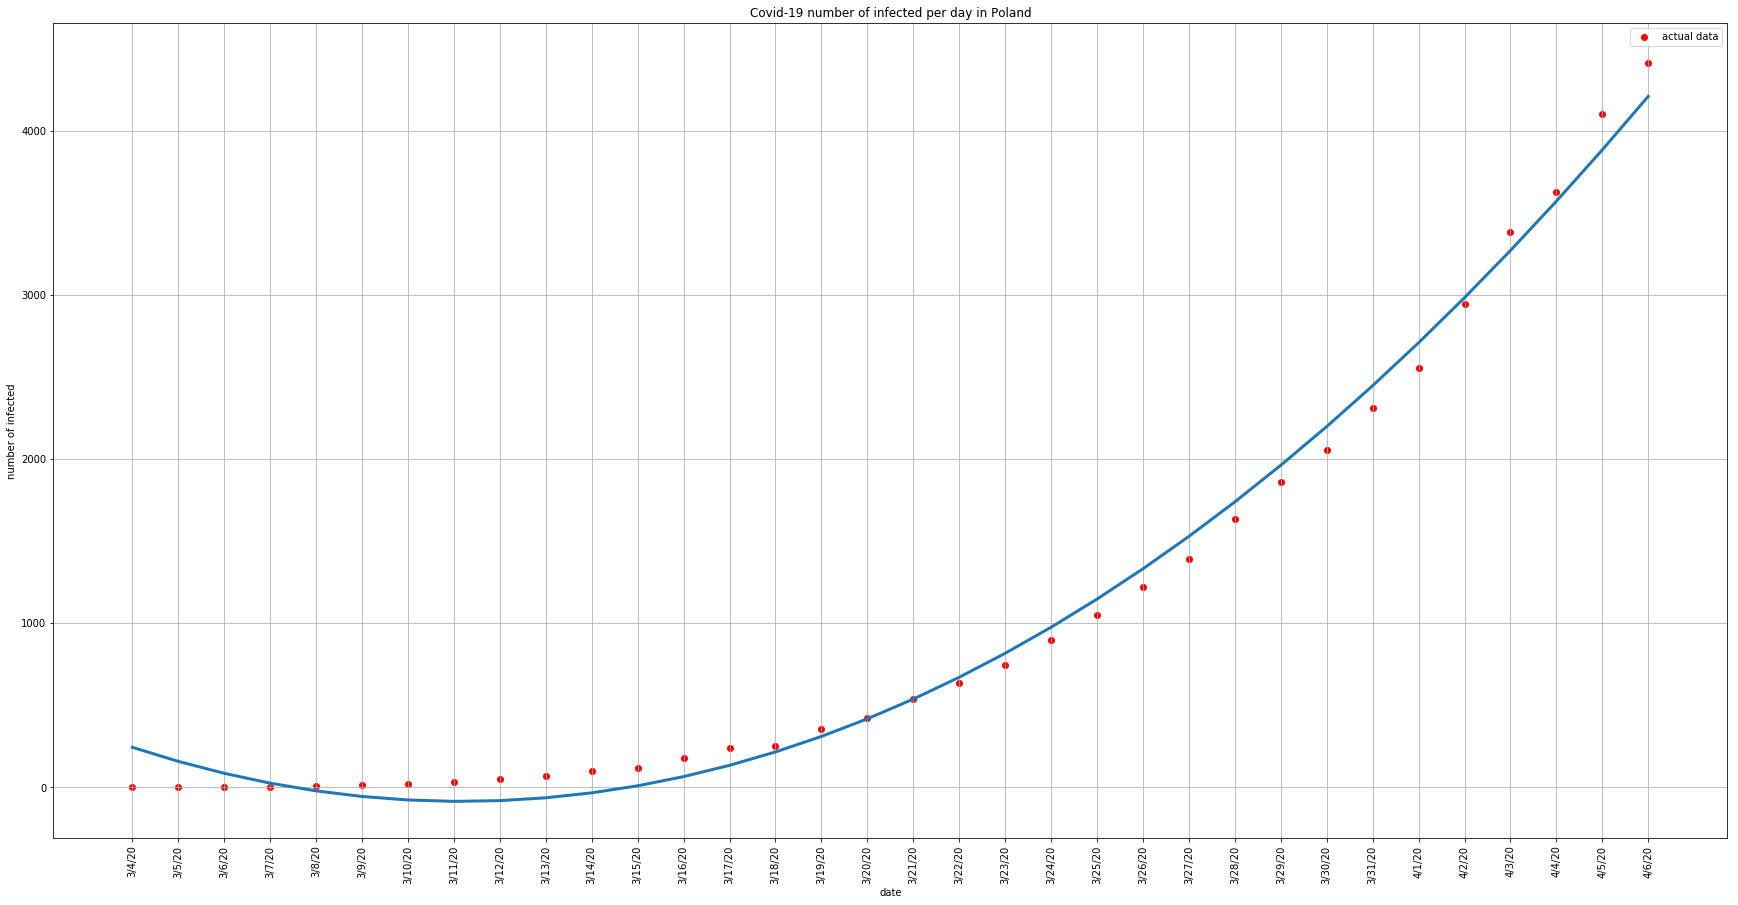

Polynomial degree: 3
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -3.3690665455      4.3690665455      4.3690665455
3/5/20                      1     1.2135733900      0.2135733900      0.2135733900
3/6/20                      5     4.5662100221      0.0867579956      0.4337899779
3/7/20                      5     7.5977839023      0.5195567805      2.5977839023
3/8/20                     11    11.2172355825      0.0197486893      0.2172355825
3/9/20                     16    16.3335056143      0.0208441009      0.3335056143
3/10/20                    22    23.8555345496      0.0843424795      1.8555345496
3/11/20                    31    34.6922629399      0.1191052561      3.6922629399
3/12/20                    49    49.7526313371      0.0153598232      0.7526313371
3/13/20                    68    69.9455802928      0.0286114749  

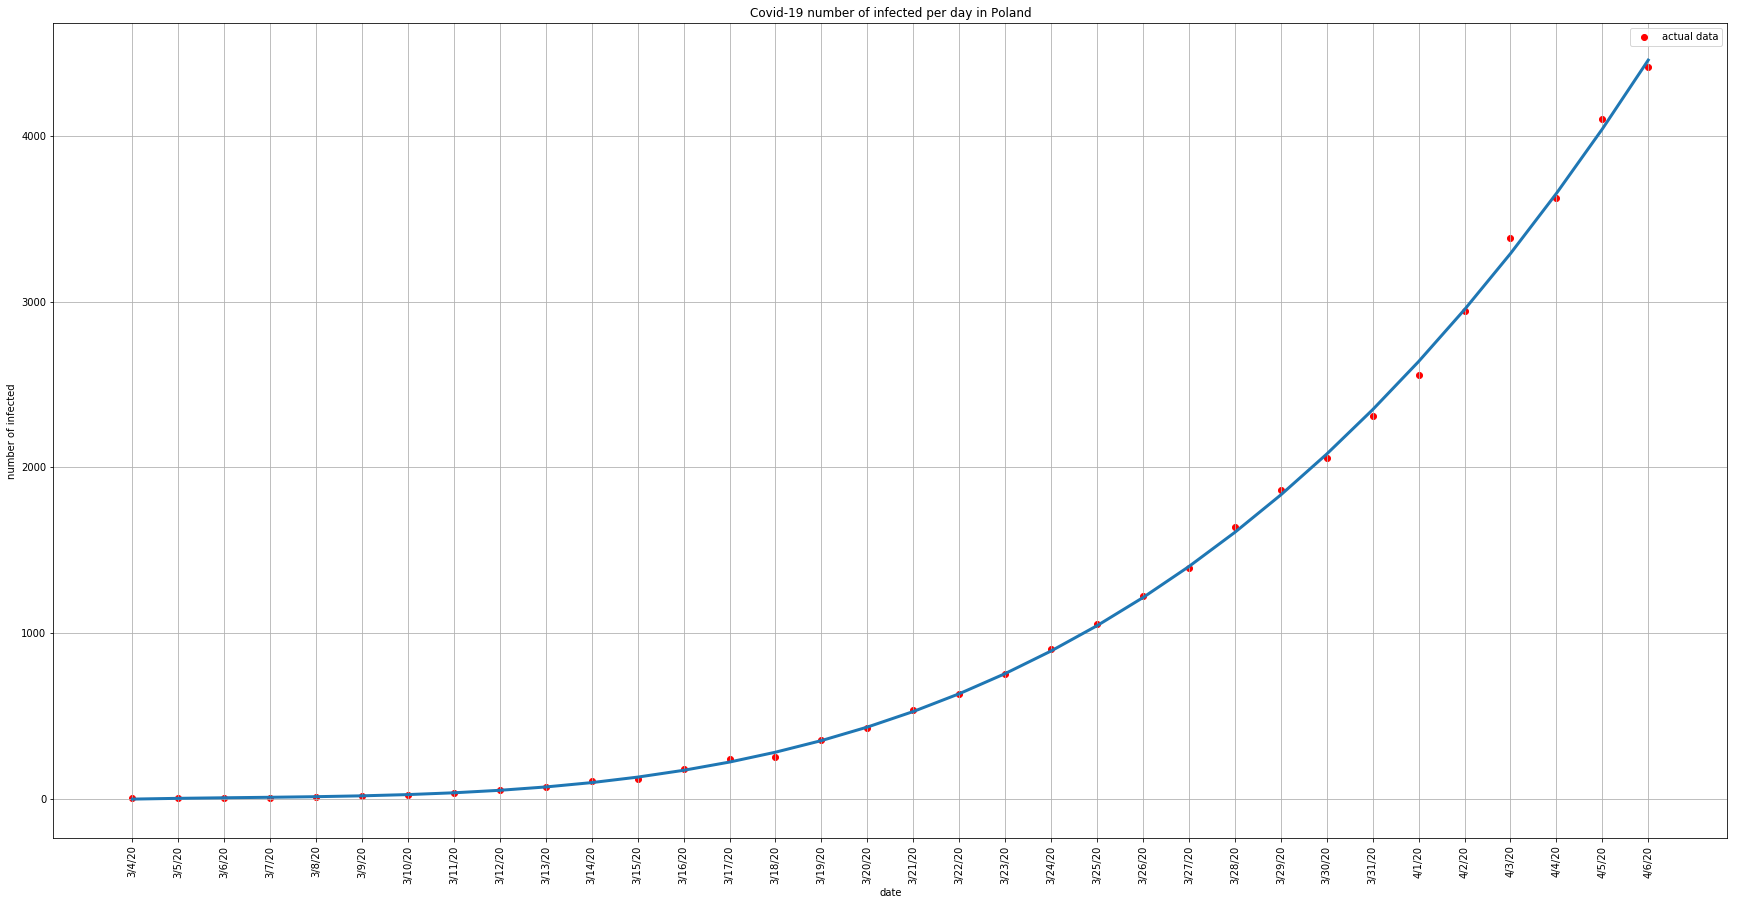

Polynomial degree: 4
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     0.3512676764      0.6487323236      0.6487323236
3/5/20                      1     2.6791595986      1.6791595986      1.6791595986
3/6/20                      5     4.4111960960      0.1177607808      0.5888039040
3/7/20                      5     6.3608545988      0.2721709198      1.3608545988
3/8/20                     11     9.3479767454      0.1501839322      1.6520232546
3/9/20                     16    14.1987683820      0.1125769761      1.8012316180
3/10/20                    22    21.7457995633      0.0115545653      0.2542004367
3/11/20                    31    32.8280045518      0.0589678888      1.8280045518
3/12/20                    49    48.2906818182      0.0144758813      0.7093181818
3/13/20                    68    68.9854940414      0.0144925594  

Polynomial degree: 5
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     1.9639940005      0.9639940005      0.9639940005
3/5/20                      1     2.8257710822      1.8257710822      1.8257710822
3/6/20                      5     3.7331179817      0.2533764037      1.2668820183
3/7/20                      5     5.3339830345      0.0667966069      0.3339830345
3/8/20                     11     8.3075081483      0.2447719865      2.6924918517
3/9/20                     16    13.3623164332      0.1648552229      2.6376835668
3/10/20                    22    21.2347998318      0.0347818258      0.7652001682
3/11/20                    31    32.6874067492      0.0544324758      1.6874067492
3/12/20                    49    48.5069296829      0.0100626595      0.4930703171
3/13/20                    68    69.5027928532      0.0220998949  

Polynomial degree: 6
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -6.7549583414      7.7549583414      7.7549583414
3/5/20                      1     5.2036671773      4.2036671773      4.2036671773
3/6/20                      5    10.2723322459      1.0544664492      5.2723322459
3/7/20                      5    11.7837065951      1.3567413190      6.7837065951
3/8/20                     11    12.4304731790      0.1300430163      1.4304731790
3/9/20                     16    14.3654500646      0.1021593710      1.6345499354
3/10/20                    22    19.2944384468      0.1229800706      2.7055615532
3/11/20                    31    28.5617967860      0.0786517166      2.4382032140
3/12/20                    49    43.2287410715      0.1177807945      5.7712589285
3/13/20                    68    64.1443712083      0.0567004234  

Polynomial degree: 7
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     9.4310240755      8.4310240755      8.4310240755
3/5/20                      1    -6.0774716889      7.0774716889      7.0774716889
3/6/20                      5    -5.3005445098      2.0601089020     10.3005445098
3/7/20                      5     2.6345918916      0.4730816217      2.3654081084
3/8/20                     11    12.5293609361      0.1390328124      1.5293609361
3/9/20                     16    22.0796660389      0.3799791274      6.0796660389
3/10/20                    22    31.0100027717      0.4095455805      9.0100027717
3/11/20                    31    40.3628371339      0.3020270043      9.3628371339
3/12/20                    49    51.9302467347      0.0598009538      2.9302467347
3/13/20                    68    67.8148216878      0.0027232105  

Polynomial degree: 8
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -5.1513907132      6.1513907132      6.1513907132
3/5/20                      1    11.1562972447     10.1562972447     10.1562972447
3/6/20                      5     8.9504509956      0.7900901991      3.9504509956
3/7/20                      5     3.7998935952      0.2400212810      1.2001064048
3/8/20                     11     2.8540655507      0.7405394954      8.1459344493
3/9/20                     16     8.2371234357      0.4851797853      7.7628765643
3/10/20                    22    19.5032438075      0.1134889178      2.4967561925
3/11/20                    31    35.3158536870      0.1392210867      4.3158536870
3/12/20                    49    54.4999915933      0.1122447264      5.4999915933
3/13/20                    68    76.6034858590      0.1265218509  

Polynomial degree: 9
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     1.8429917901      0.8429917901      0.8429917901
3/5/20                      1    -0.9250381884      1.9250381884      1.9250381884
3/6/20                      5     4.0226488711      0.1954702258      0.9773511289
3/7/20                      5     8.5638450534      0.7127690107      3.5638450534
3/8/20                     11    11.5561830741      0.0505620976      0.5561830741
3/9/20                     16    14.7971060051      0.0751808747      1.2028939949
3/10/20                    22    20.7000946839      0.0590866053      1.2999053161
3/11/20                    31    31.1755736098      0.0056636648      0.1755736098
3/12/20                    49    47.3016212451      0.0346607909      1.6983787549
3/13/20                    68    69.4574979500      0.0214337934  

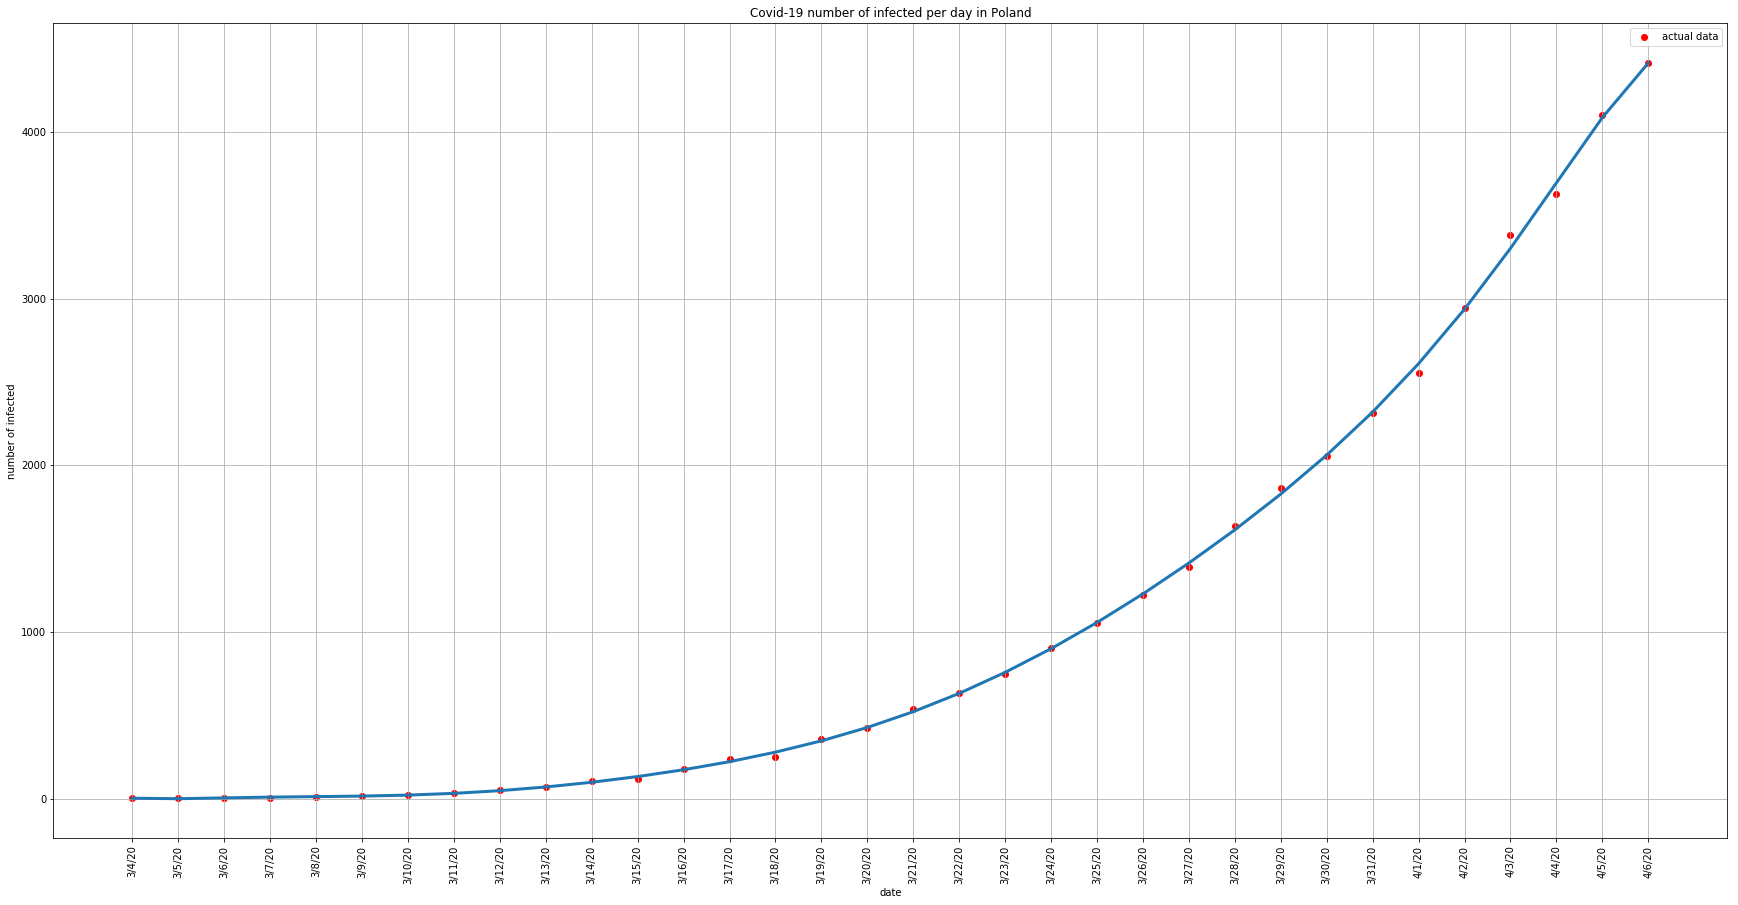

In [6]:
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate

dates = ["3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20","3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20","3/31/20","4/1/20","4/2/20","4/3/20","4/4/20","4/5/20","4/6/20"]
infected = [1,1,5,5,11,16,22,31,49,68,103,119,177,238,251,355,425,536,634,749,901,1051,1221,1389,1638,1862,2055,2311,2554,2946,3383,3627,4102,4413]

def data_table(domain, values, title1, title2):
    print(tabulate({title1: domain, title2: values}, headers="keys"), "\n\n")

print("Liczba chorych na COVID-19 w Polsce\n")
data_table(dates, infected, "Data", "Liczba zachorowań")

def compare_coronavirus_precision(dates, infected, d):  
    n = len(infected)
    x_val = np.linspace(1, n, n)
    poly = least_squares_aproxy(infected, x_val, d)
    results = poly(x_val)
    absolute_error = (len(x_val)) *[0]
    relative_error = (len(x_val)) * [0]
    for i in range(0, len(x_val)):
        absolute_error[i] = abs(results[i] - infected[i])
        relative_error[i] = absolute_error[i]/infected[i]
    print(tabulate({"date": dates, "number of infected": infected, "approximation": results, 
                  "relative error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    print("Mean of statistic error: ",statistics.mean(relative_error))
    show_coronavirus_graph(dates, infected, results)
    
def show_coronavirus_graph(dates, infected, results):
    fig,ax=plt.subplots()
    fig.set_size_inches(30, 15)
    ax.plot(dates,results, linewidth = 3)
    ax.scatter(dates, infected, c = "red", label="actual data")
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates)
    plt.title('Covid-19 - number of infected per day in Poland')
    plt.xticks(rotation=90)
    plt.xlabel('date')
    plt.grid(True, which='major')
    plt.ylabel('number of infected')
    plt.legend()
    plt.show()

def show_all():
    for d in range(1,10, +1):
        print("Polynomial degree:", d)
        compare_coronavirus_precision(dates, infected, d)
    
show_all()
  

### Wnioski

Im większy stopień wielomianu aproksymującego, tym mniejszy jest błąd aproksymacji, pod warunkiem, że stopień jest znacznie mniejszy od liczby węzłów. W przeciwnym razie możemy mogą wystąpić błędy pomiarowe (funkcja może nie być wystarczająco wygładzona)

## ZAD 2

### Za pomocą funkcji PolyFit z pakietu numpy

Function: sin(x)


Degree: 1
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0597130737       -0.0597130737
           0.4129314395        0.4129314395 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.4099156277      7.1197809231      0.3594320455
 0.1111111111   0.1108826285            0.4038840041      1.6758609003      0.2529479057
 0.2222222222   0.2203977435            0.3978523805      0.5923654739      0.1480024641
 0.3333333333   0.3271946968            0.3918207569      0.1317212261      0.0456040846
 0.4444444444   0.4299563635            0.3857891333      0.1213172835      0.0532648347
 0.5555555556   0.5274153858            0.3797575097      0.2799650524      0.1476578761
 0.6666666667   0.6183698031            0.3737258861      0.3877362349      0.23

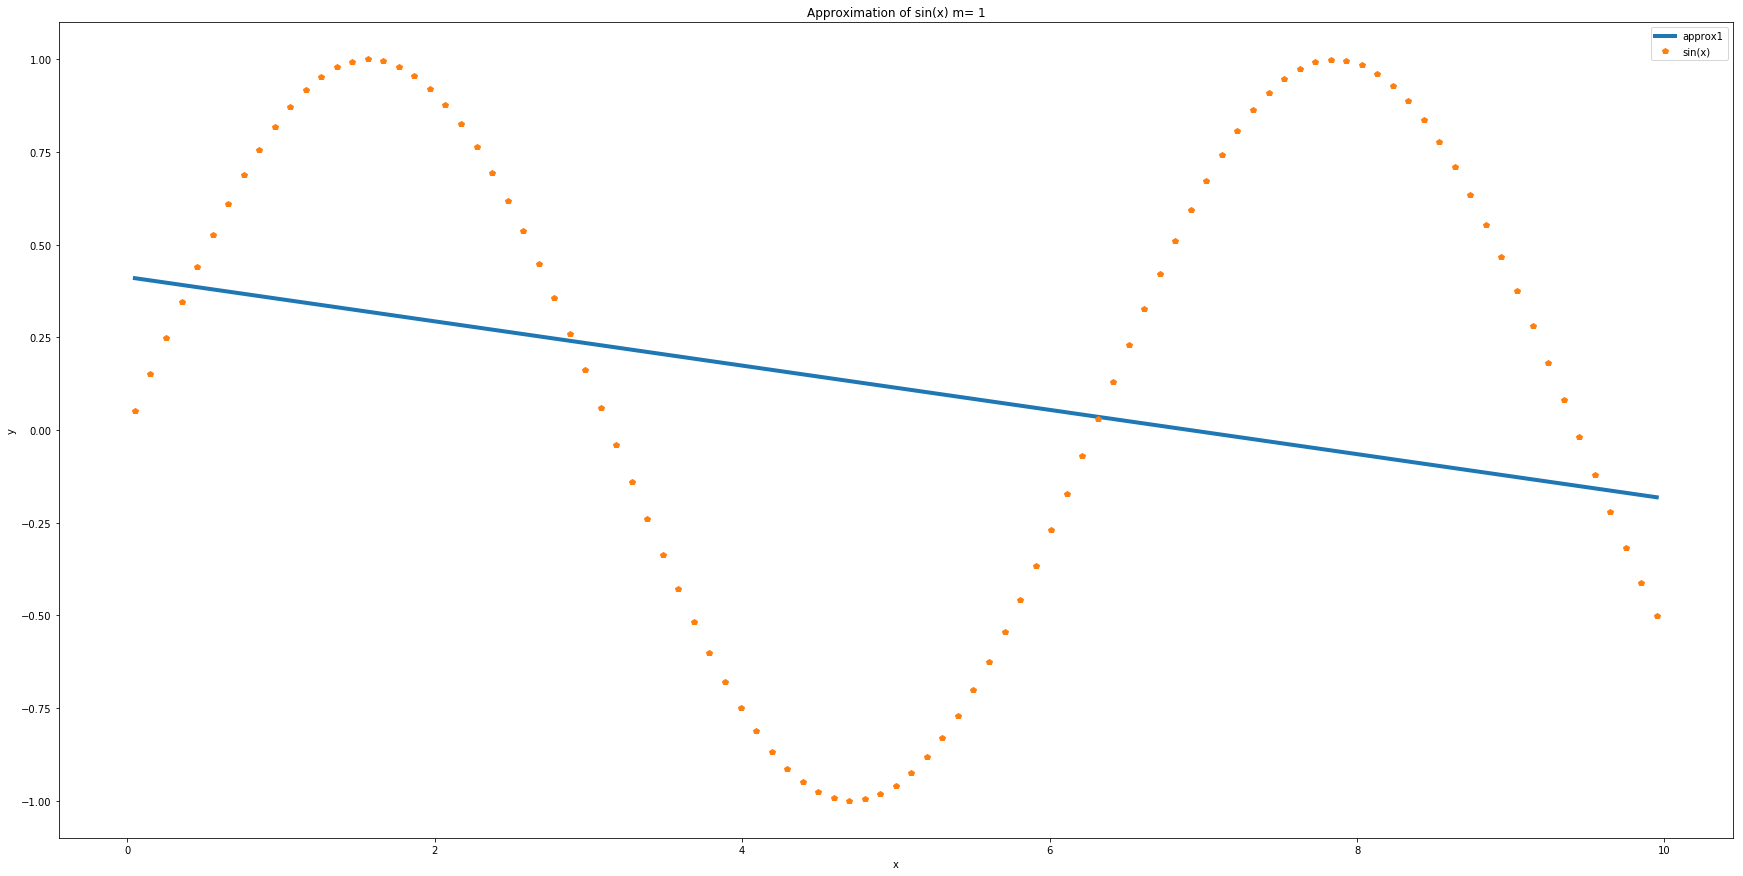



Degree: 2
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0061069248        0.0061069248
          -0.1268892459       -0.1268892459
           0.5348437521        0.5348437521 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.5284507817      9.4677750401      0.4779671995
 0.1111111111   0.1108826285            0.5157583045      2.4170639768      0.3648222062
 0.2222222222   0.2203977435            0.5031904458      1.0139708394      0.2533405294
 0.3333333333   0.3271946968            0.4907472054      0.4174568838      0.1445305331
 0.4444444444   0.4299563635            0.4784285835      0.0896805823      0.0393746155
 0.5555555556   0.5274153858            0.4662345799      0.1160011776      0.0611808058
 0.6666666667   0.6183698031            0.4541651948 

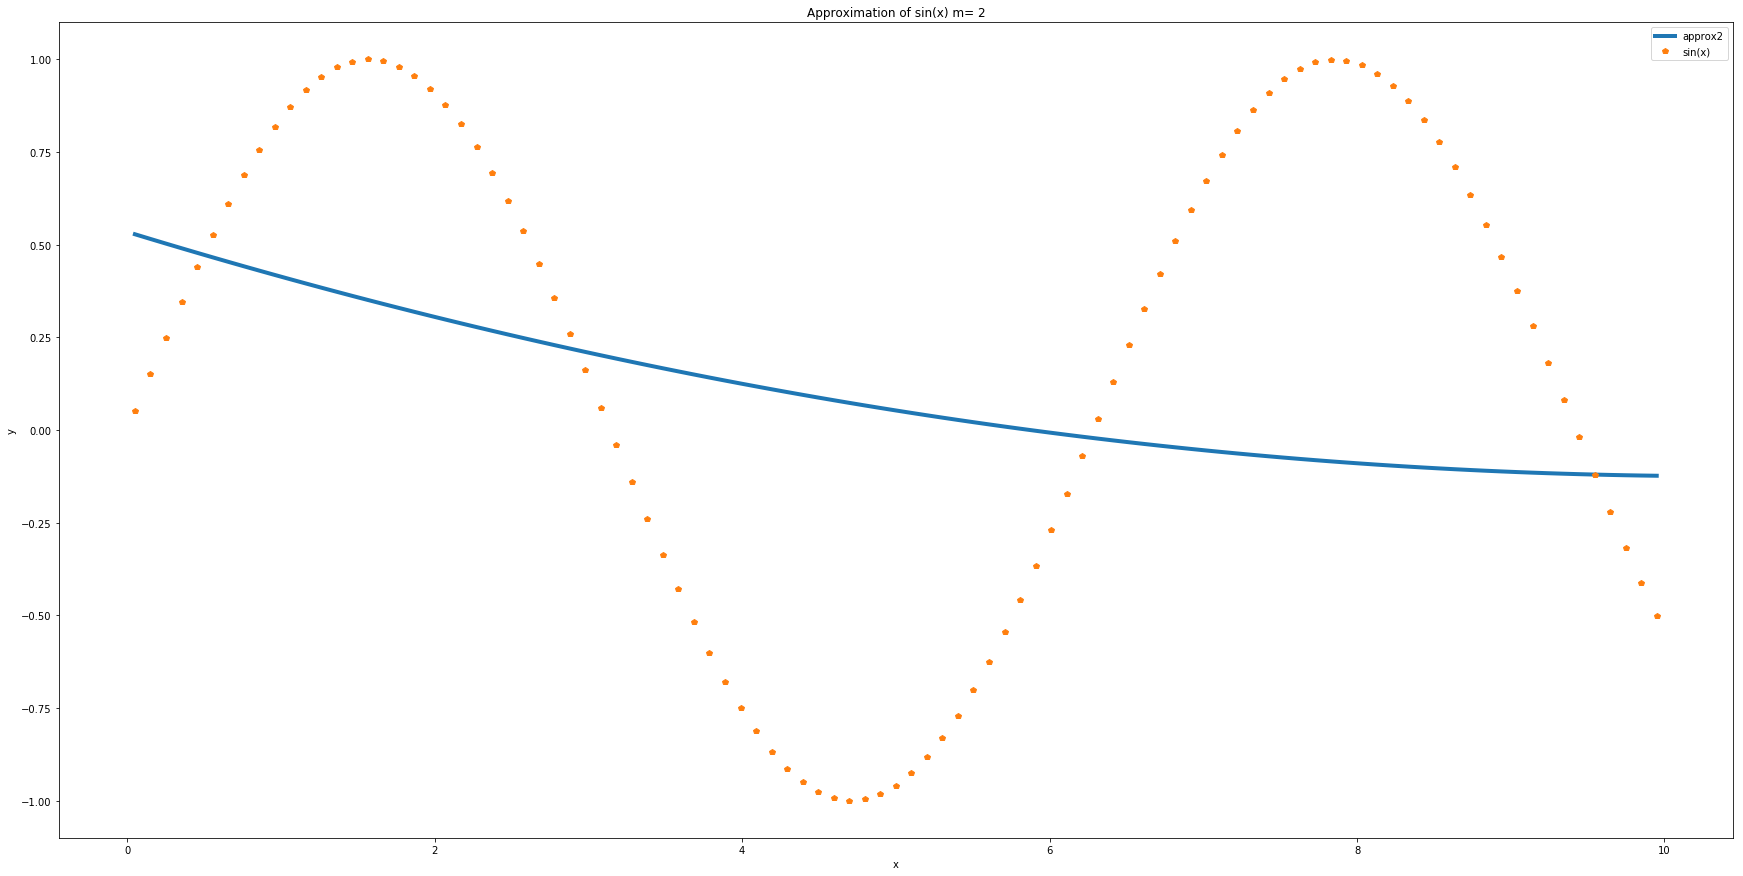



Degree: 3
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0136142945       -0.0136142945
           0.2307427835        0.2307427835
          -1.1103287320       -1.1103287320
           1.4136044407        1.4136044407 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            1.3581140476     25.9020934822      1.3076304654
 0.1111111111   0.1108826285            1.2506225853      7.2857752312      1.0996864870
 0.2222222222   0.2203977435            1.1477133997      3.5936113025      0.8978634834
 0.3333333333   0.3271946968            1.0493023046      2.0307676913      0.7030856323
 0.4444444444   0.4299563635            0.9553051137      1.1758261705      0.5162511458
 0.5555555556   0.5274153858            0.8656376410      0.6412824964      0.3382222552
 0.666666

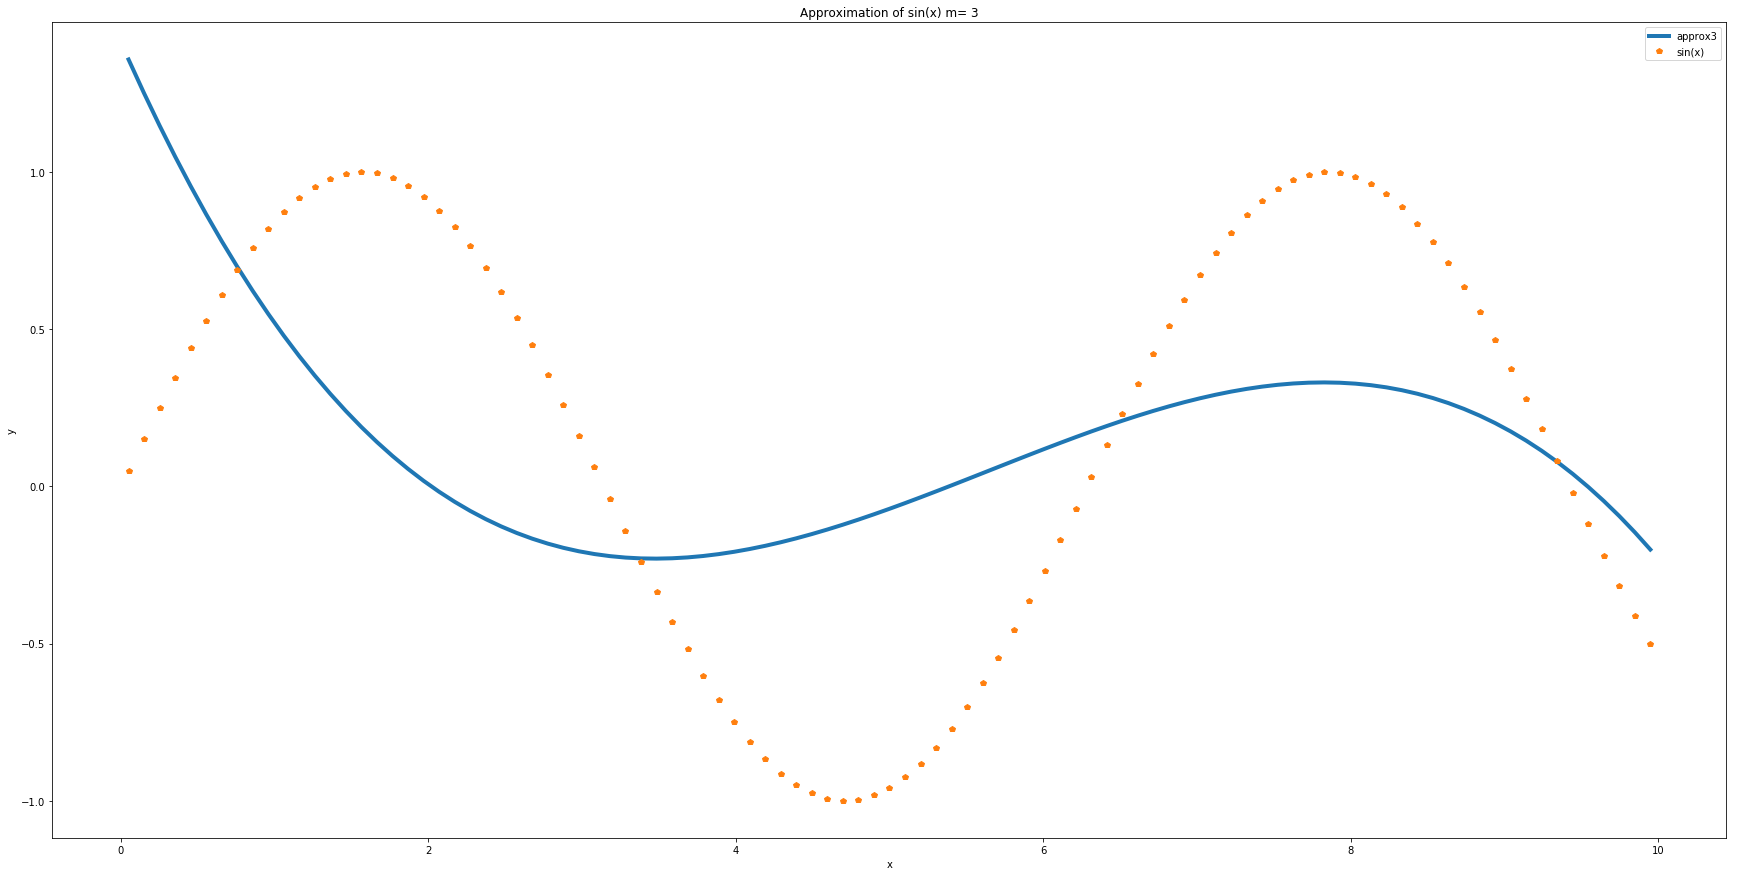



Degree: 4
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0058801982       -0.0058801982
           0.1157500667        0.1157500667
          -0.6810198060       -0.6810198060
           1.0925159014        1.0925159013
           0.2568847537        0.2568847537 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.3103400797      5.1473466450      0.2598564975
 0.1111111111   0.1108826285            0.4071829181      1.6977172622      0.2562468197
 0.2222222222   0.2203977435            0.4911846978      0.9659190003      0.2413347814
 0.3333333333   0.3271946968            0.5630317953      0.6262411384      0.2168151230
 0.4444444444   0.4299563635            0.6233958955      0.4198616595      0.1843419276
 0.5555555556   0.5274153858            0.6729339923  

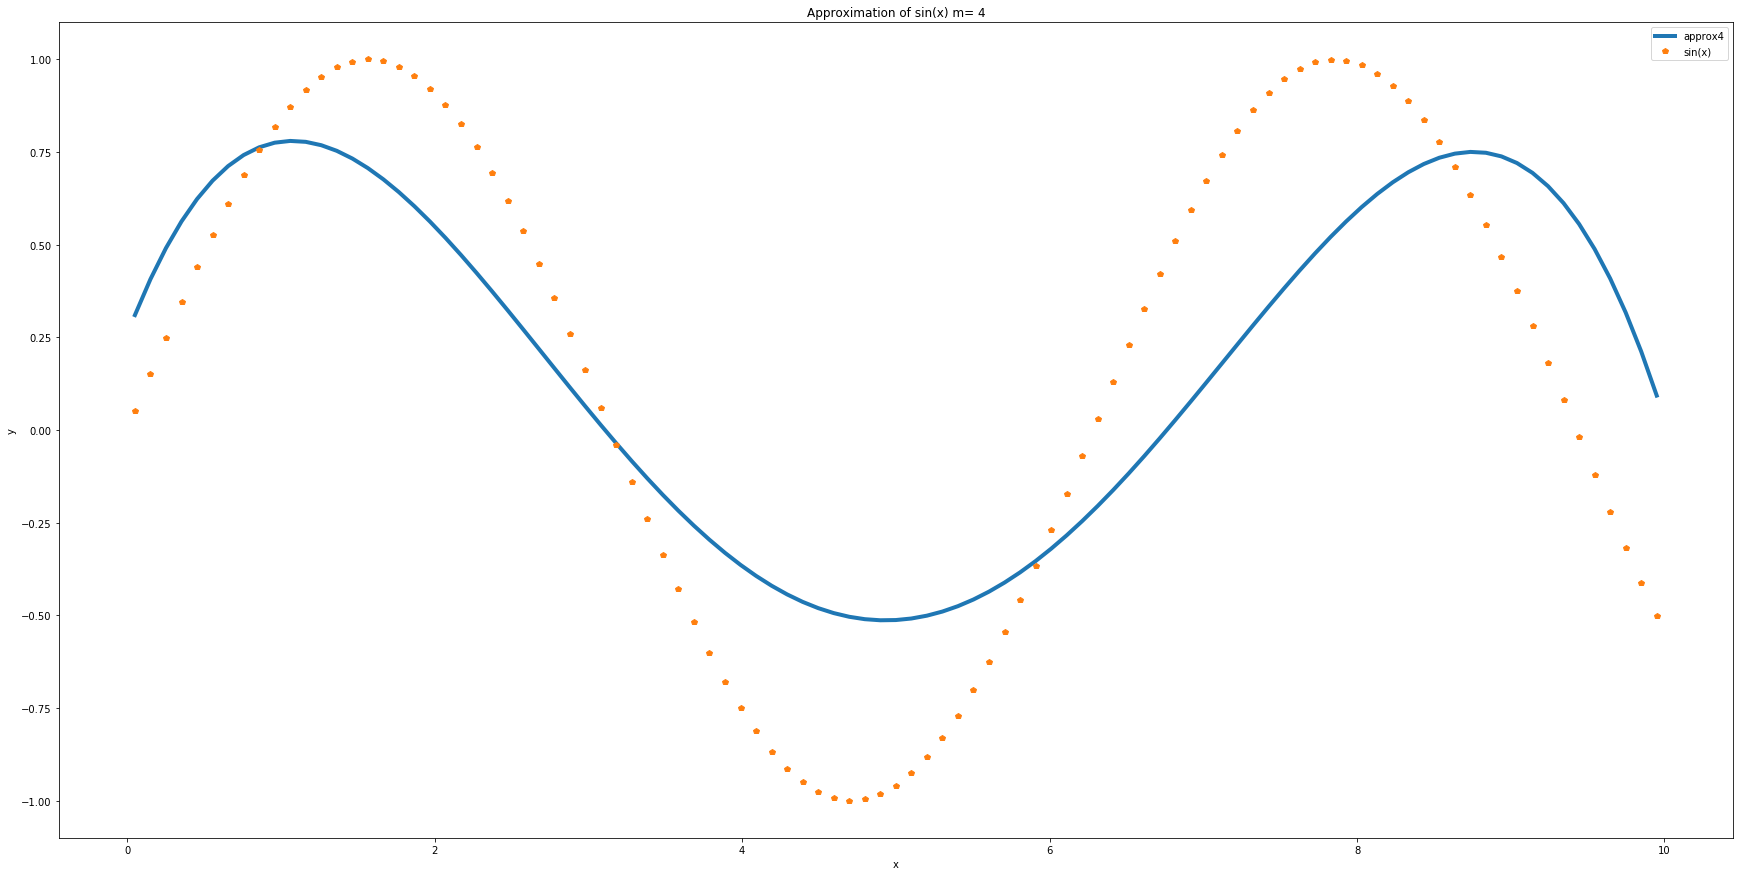



Degree: 5
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0016056514        0.0016056514
          -0.0500356122       -0.0500356122
           0.5464346734        0.5464346733
          -2.4445107230       -2.4445107225
           3.8089771686        3.8089771677
          -0.6692326000       -0.6692325997 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000           -0.4830253061     10.5679681400      0.5335088883
 0.1111111111   0.1108826285           -0.1463586641      1.9696730316      0.2972947625
 0.2222222222   0.2203977435            0.1453438816      0.4182752441      0.1045060347
 0.3333333333   0.3271946968            0.3952155803      0.1415267143      0.0489989080
 0.4444444444   0.4299563635            0.6062697352      0.3808547000      0.1672157672
 0.5555555

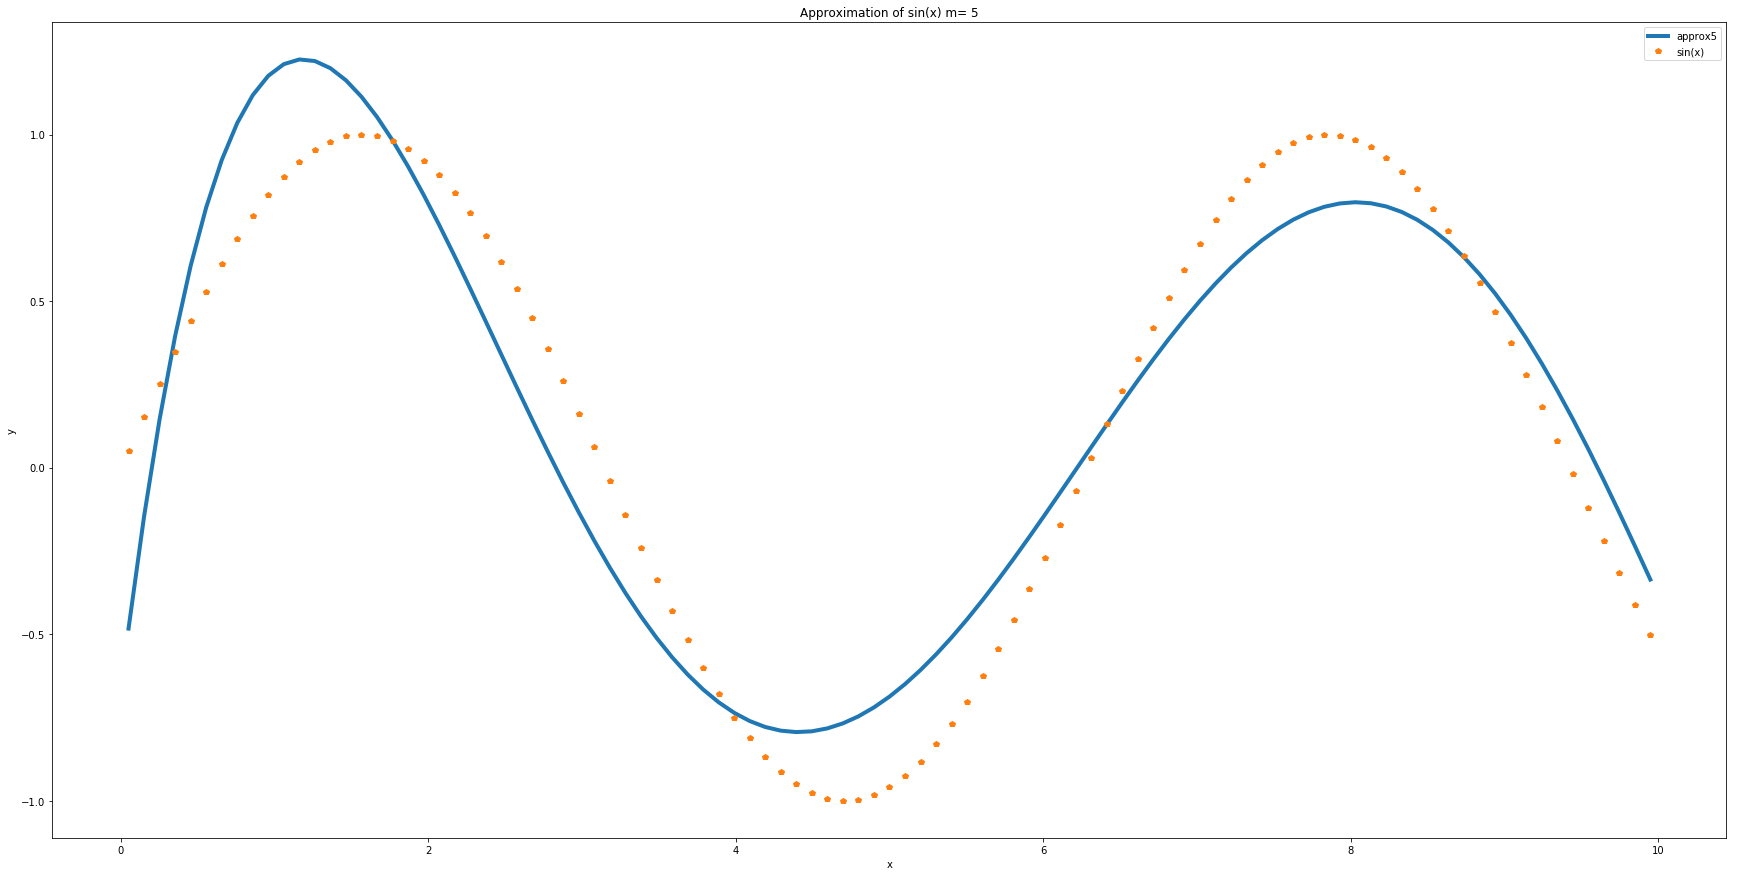



Degree: 6
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0003261749        0.0003261749
          -0.0091581218       -0.0091581218
           0.0842525537        0.0842525537
          -0.2372107041       -0.2372107043
          -0.3155703595       -0.3155703592
           1.5357778076        1.5357778076
          -0.1333381377       -0.1333381378 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000           -0.0566085600      2.1213261337      0.1070921422
 0.1111111111   0.1108826285            0.0913295539      0.3949124507      0.0596065445
 0.2222222222   0.2203977435            0.2308743545      0.0759478416      0.0189755619
 0.3333333333   0.3271946968            0.3609558509      0.0425721225      0.0147391786
 0.4444444444   0.4299563635            0.4806864836   

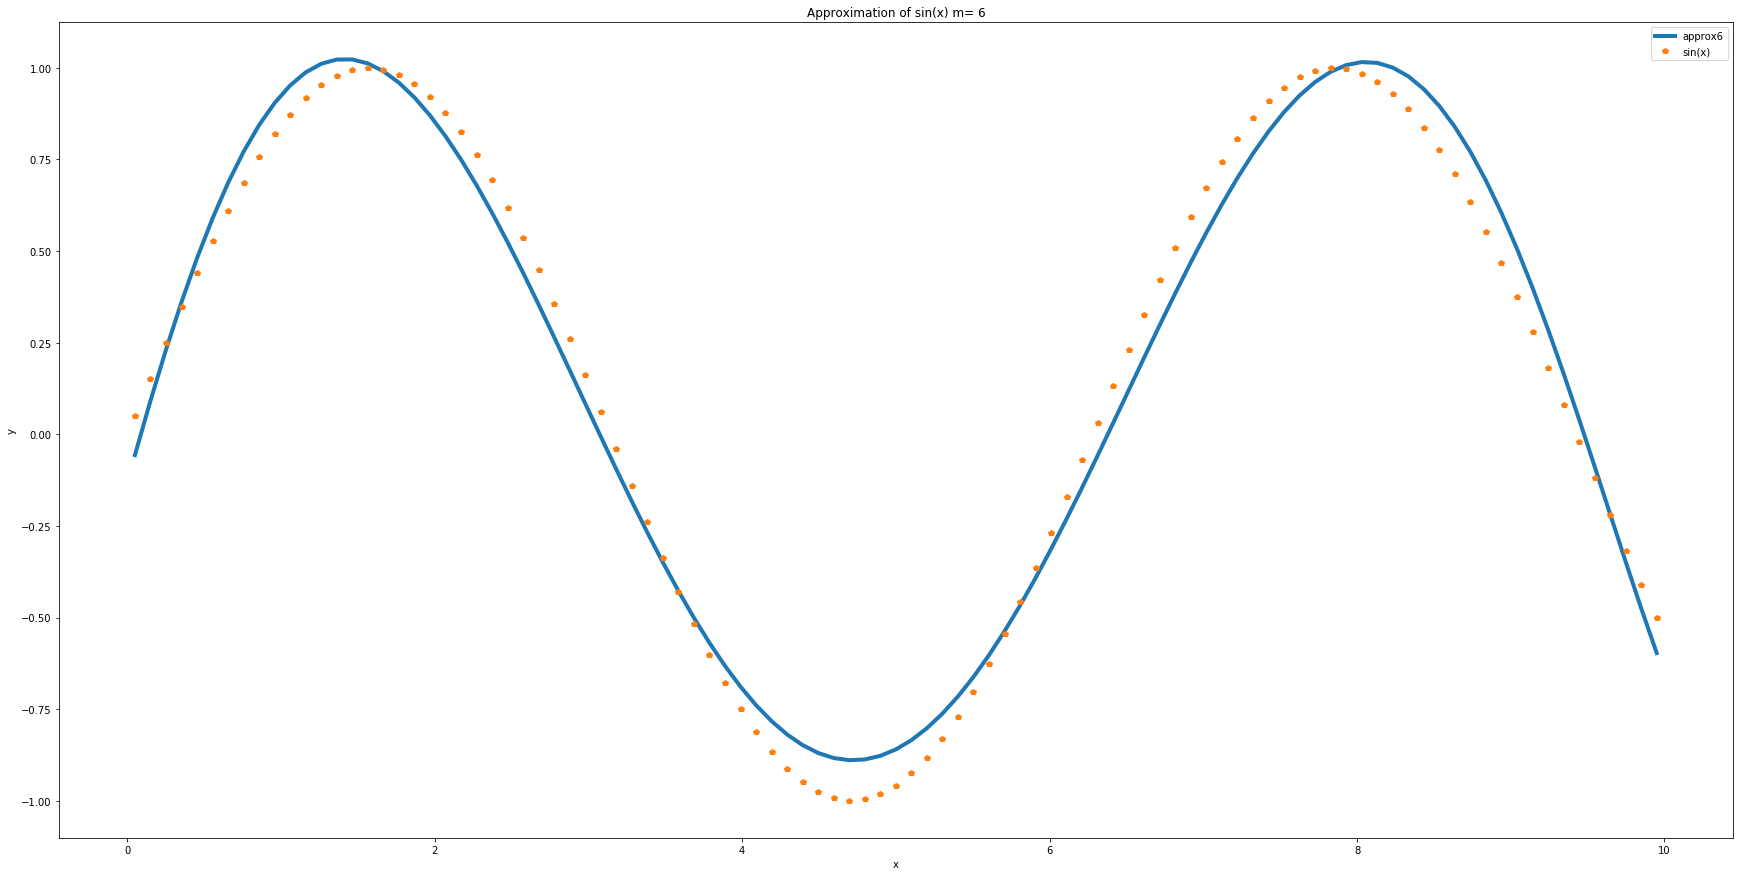



Degree: 7
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000541271       -0.0000541271
           0.0024100677        0.0024100680
          -0.0408475759       -0.0408475819
           0.3253349945        0.3253350407
          -1.1933255366       -1.1933257223
           1.5444856378        1.5444860047
           0.0810666684        0.0810663760
           0.1140668359        0.1140668868 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.1219490962      1.4156189172      0.0714655140
 0.1111111111   0.1108826285            0.1578236449      0.0456322019      0.0068875465
 0.2222222222   0.2203977435            0.2150937123      0.1391083276      0.0347562040
 0.3333333333   0.3271946968            0.2878992056      0.1684421097      0.0583174667
 0.44444444

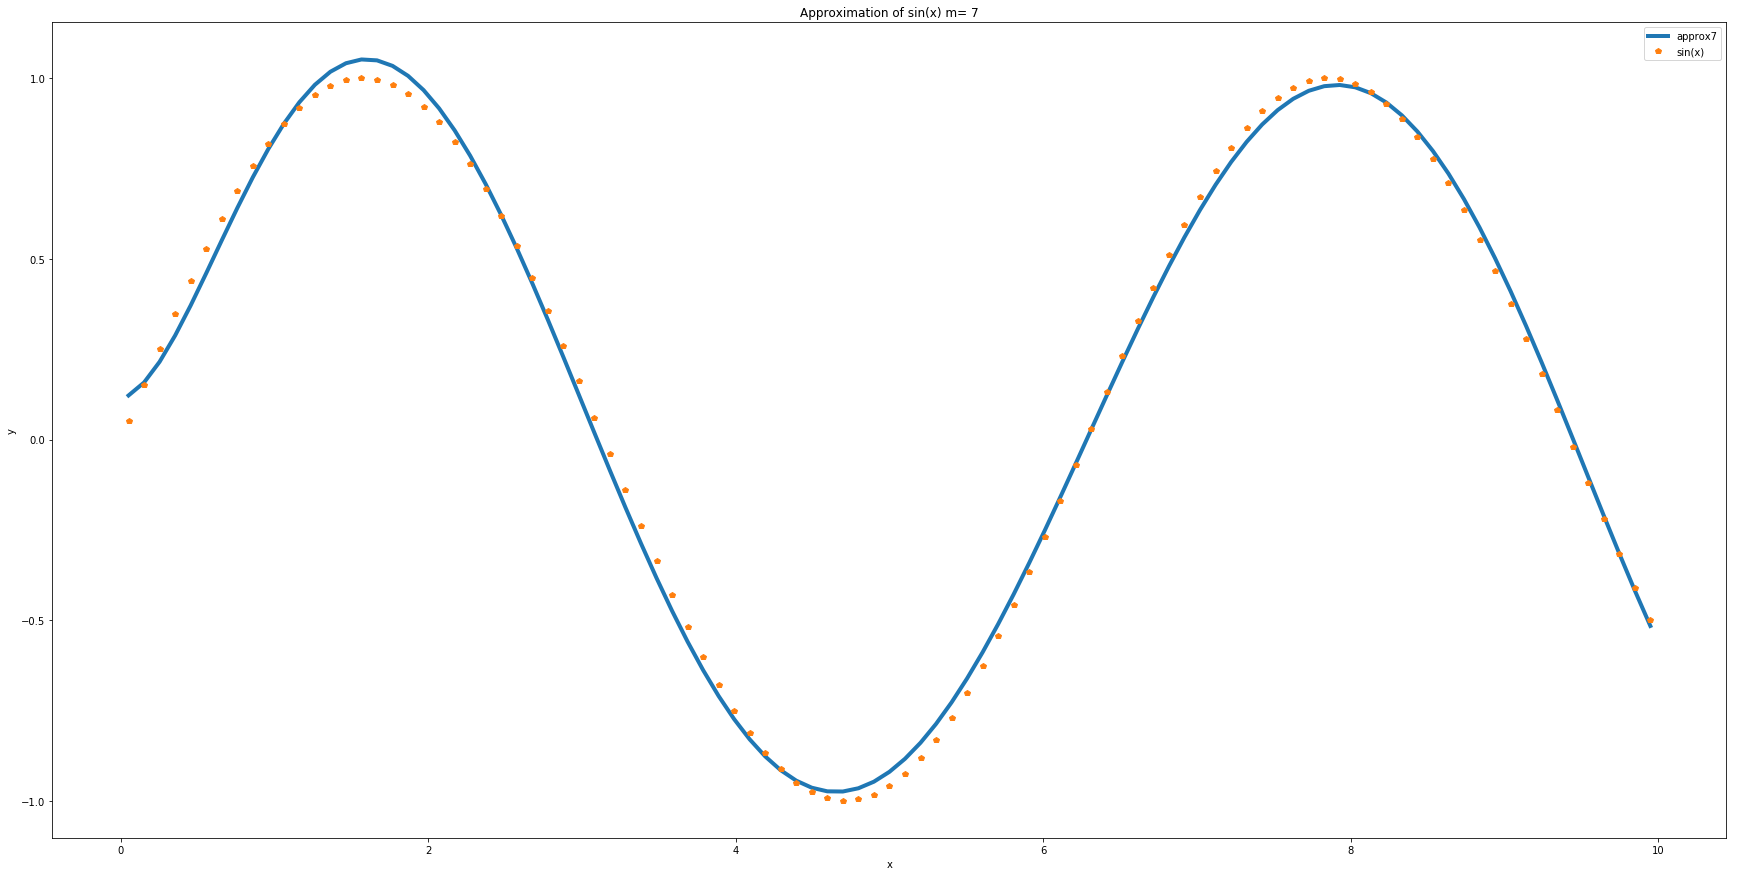



Degree: 8
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000075213       -0.0000075213
           0.0002768105        0.0002768116
          -0.0035279786       -0.0035279983
           0.0149558628        0.0149560515
           0.0321249125        0.0321239031
          -0.3435963720       -0.3435933831
           0.2996457629        0.2996412659
           0.8226818094        0.8226845825
           0.0203535154        0.0203531465 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0626233759      0.2404701315      0.0121397937
 0.1111111111   0.1108826285            0.1507041426      0.0015367815      0.0002319558
 0.2222222222   0.2203977435            0.2418216255      0.0321324536      0.0080282908
 0.3333333333   0.3271946968            0.3340476339    

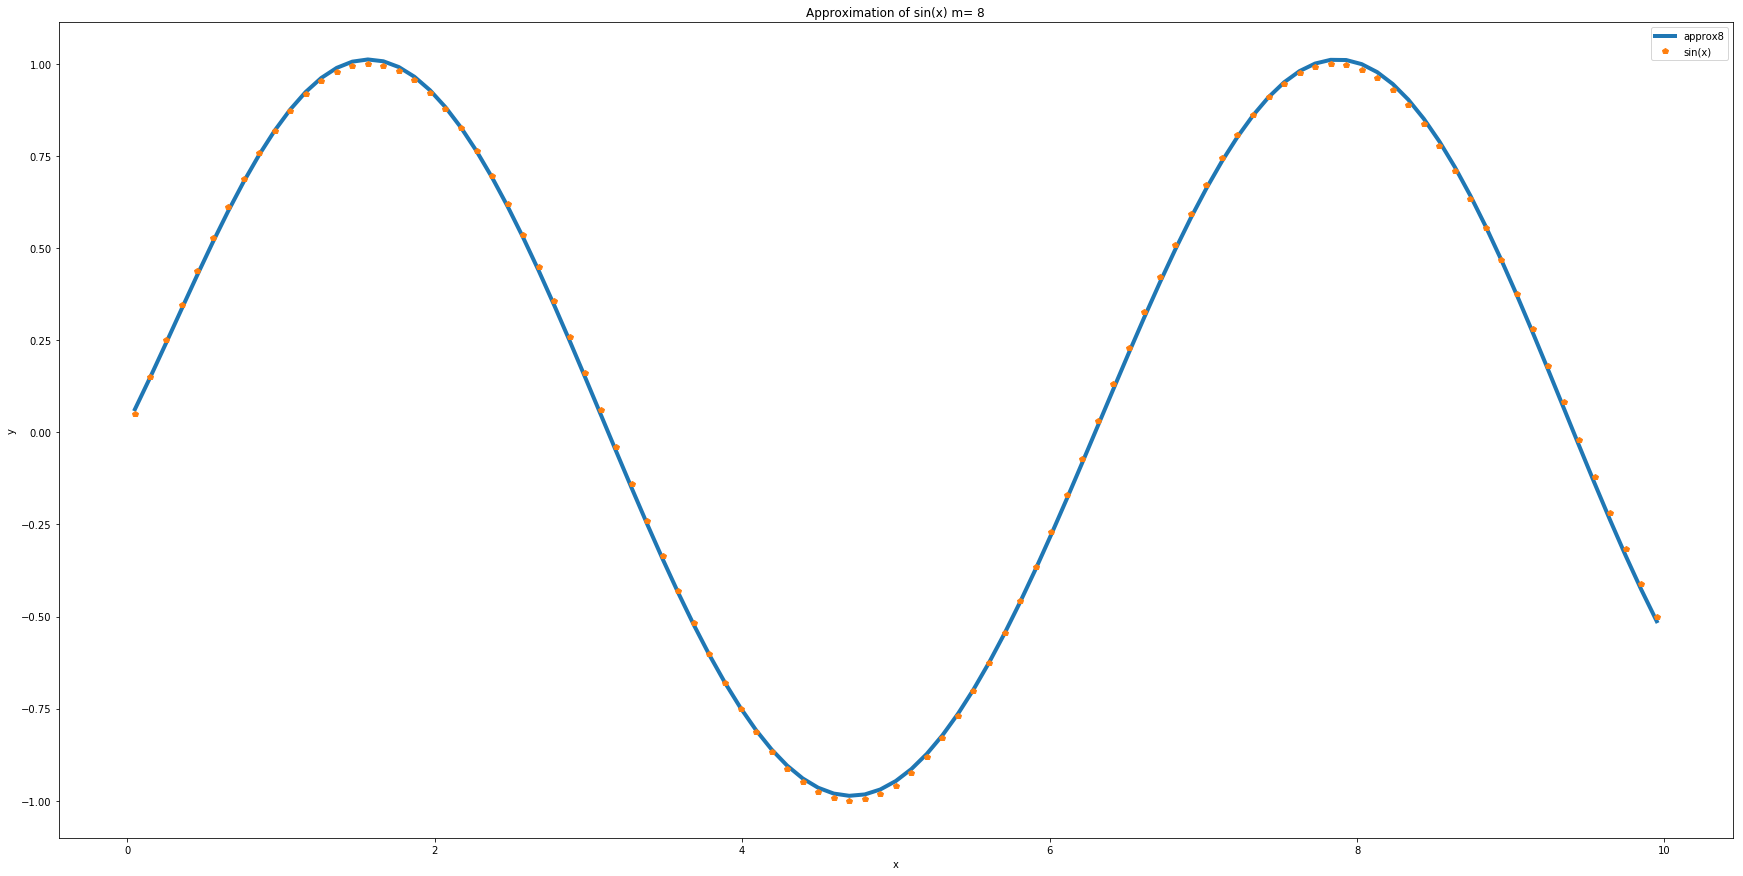



Degree: 9
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000009156        0.0000009158
          -0.0000528423       -0.0000528537
           0.0012141772        0.0012144138
          -0.0140253205       -0.0140280035
           0.0838844144        0.0839022870
          -0.2362364034       -0.2363071674
           0.2523710679        0.2525314146
          -0.3819118463       -0.3820997989
           1.1412234129        1.1413140686
          -0.0101791614       -0.0101882745 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0465152215      0.0786069551      0.0039683607
 0.1111111111   0.1108826285            0.1547258422      0.0251082671      0.0037897439
 0.2222222222   0.2203977435            0.2568403641      0.0279785873      0.0069904477
 0.333333333

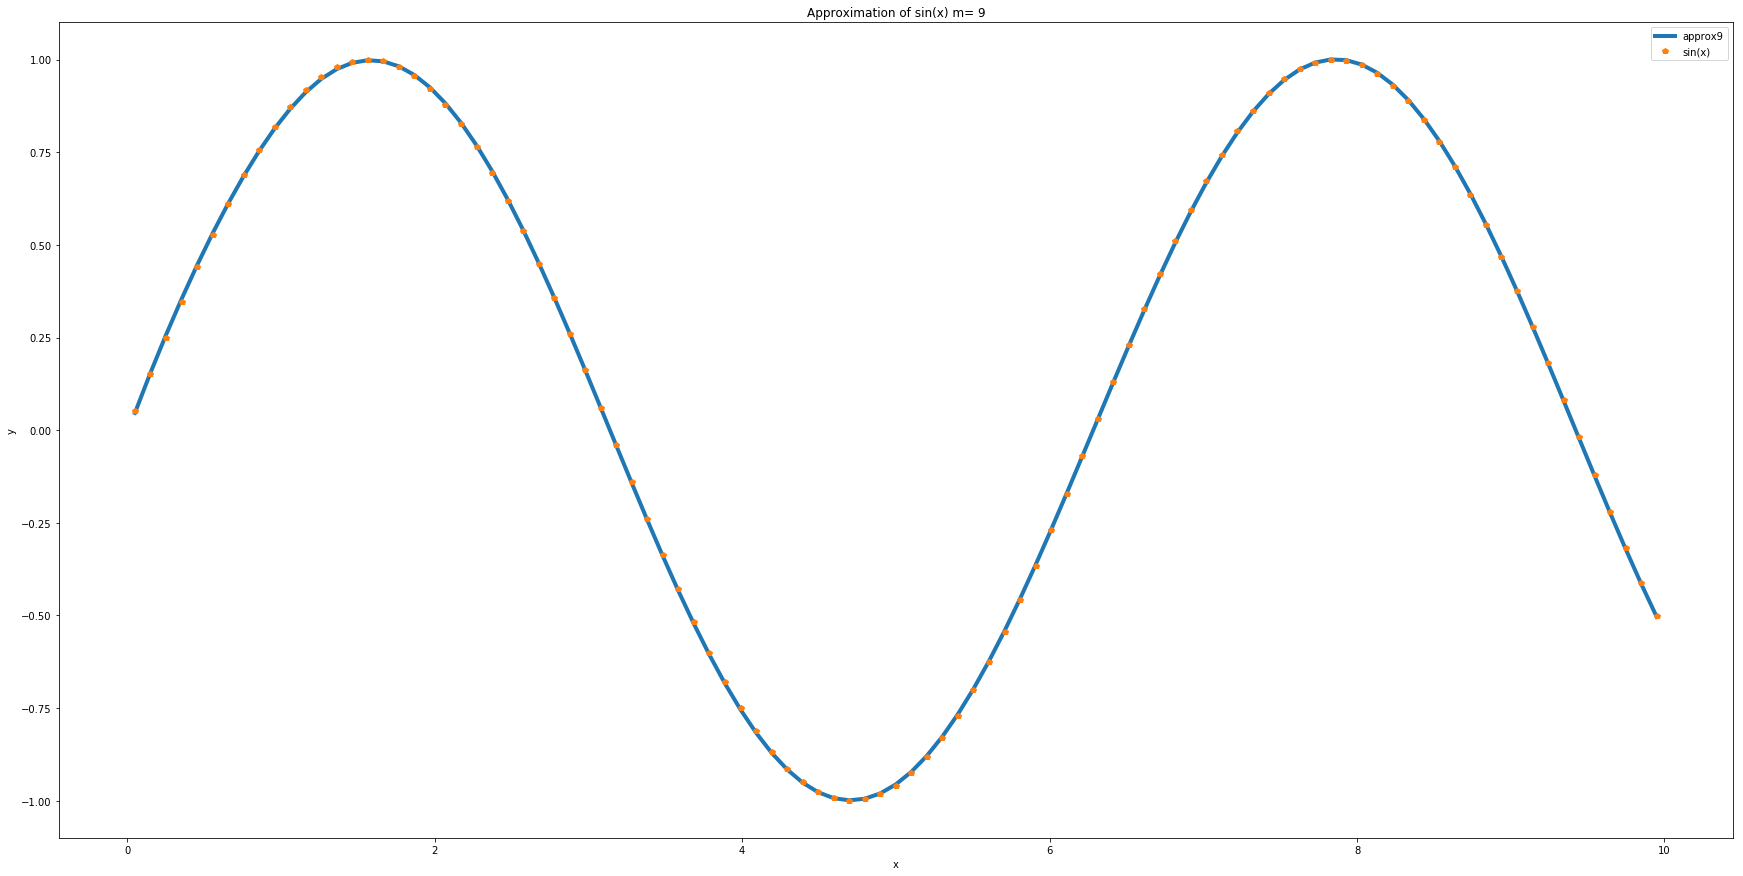



Degree: 10
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000000978        0.0000000978
          -0.0000044633       -0.0000044637
           0.0000731580        0.0000731669
          -0.0004247608       -0.0004248909
          -0.0010883690       -0.0010872046
           0.0202951215        0.0202885905
          -0.0441886142       -0.0441659205
          -0.0857286823       -0.0857752152
          -0.0717470281       -0.0716965552
           1.0248551009        1.0248321237
          -0.0015965953       -0.0015943824 
)
            x         sin(x)    sin(x) approximation    relative error    absolute error
-------------  -------------  ----------------------  ----------------  ----------------
 0.0000000000   0.0000000000            0.0499694290      0.0101845634      0.0005141532
 0.1111111111   0.1108826285            0.1517175232      0.0051771896      0.0007814248
 0.2222222222   0.2203977435            0.2510902878    

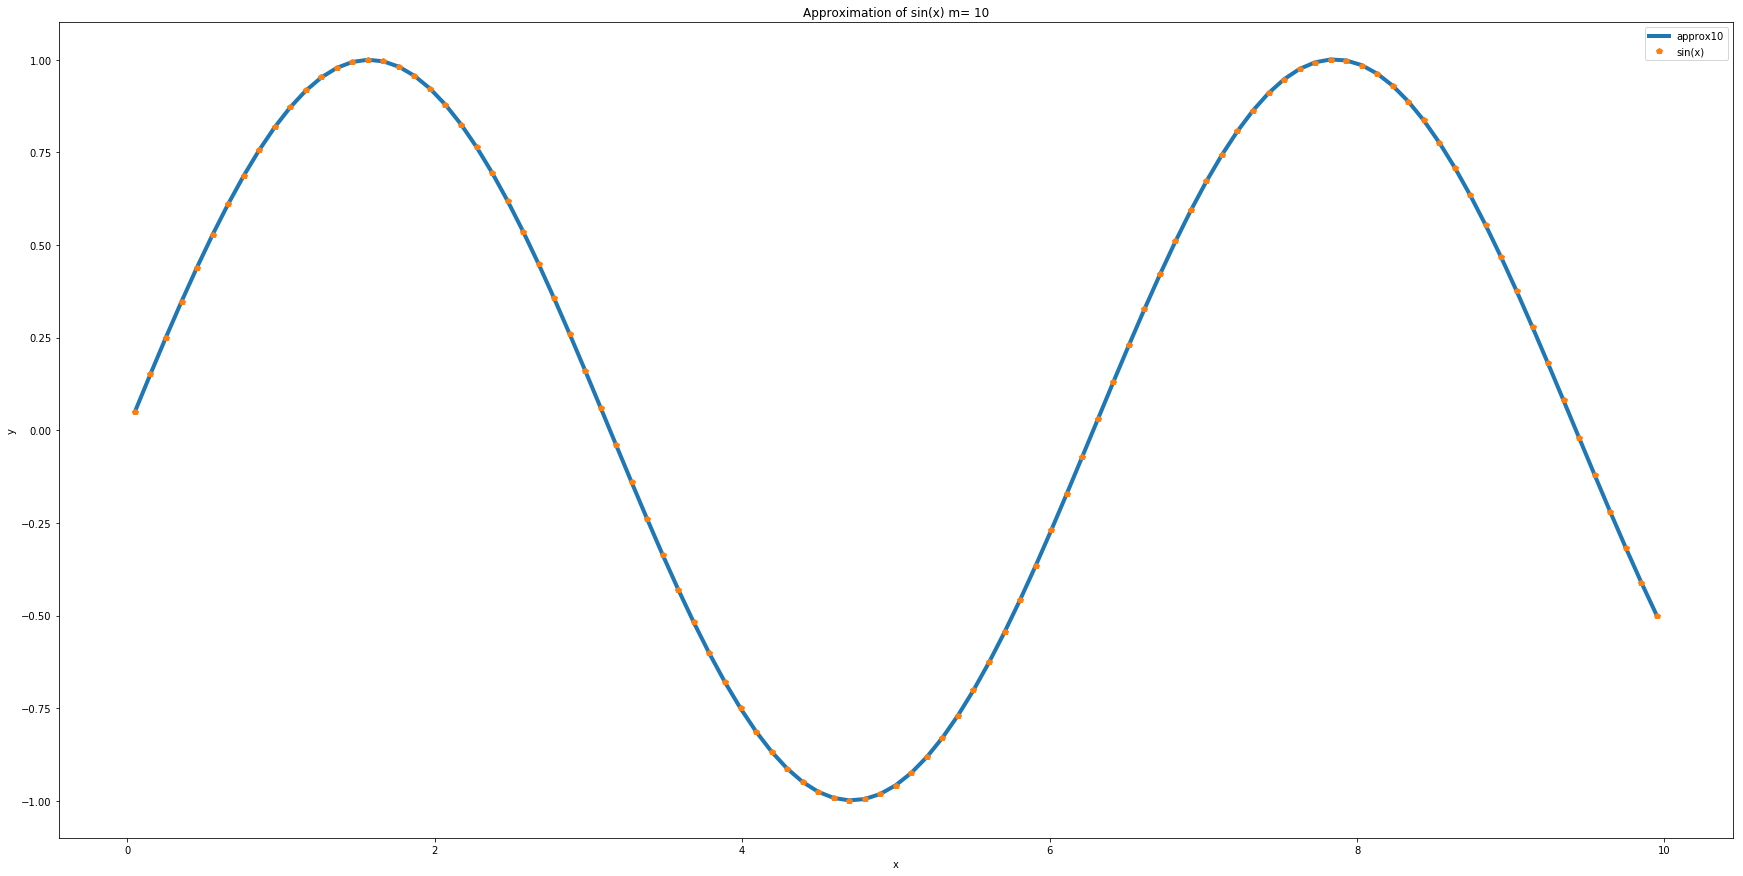

Function: sqrt(x)


Degree: 1
  polyfit approximation    my approximation
-----------------------  ------------------
           0.2433414450        0.2433414450
           0.8664985431        0.8664985431 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.8787885150      2.9103620334      0.6540552276
 0.1111111111  0.3333333333             0.9033684590      1.3207955920      0.5141189869
 0.2222222222  0.4714045208             0.9279484029      0.8465940064      0.4254294953
 0.3333333333  0.5773502692             0.9525283468      0.6019962092      0.3579399568
 0.4444444444  0.6666666667             0.9771082908      0.4492858056      0.3029084283
 0.5555555556  0.7453559925             1.0016882347      0.3439057911      0.2563322422
 0.6666666667  0.8164965809             1.0262681787      0.2665483748      0.2



Degree: 2
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0163788280       -0.0163788280
           0.4235085526        0.4235085526
           0.5395286070        0.5395286070 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.5608761493      1.4957413101      0.3361428619
 0.1111111111  0.3333333333             0.6033205633      0.5499585911      0.2140710912
 0.2222222222  0.4714045208             0.6454307496      0.2843909748      0.1429118420
 0.3333333333  0.5773502692             0.6872067082      0.1557687970      0.0926183182
 0.4444444444  0.6666666667             0.7286484391      0.0807602904      0.0544485767
 0.5555555556  0.7453559925             0.7697559424      0.0327359679      0.0243999499
 0.6666666667  0.8164965809             0.8105292179 

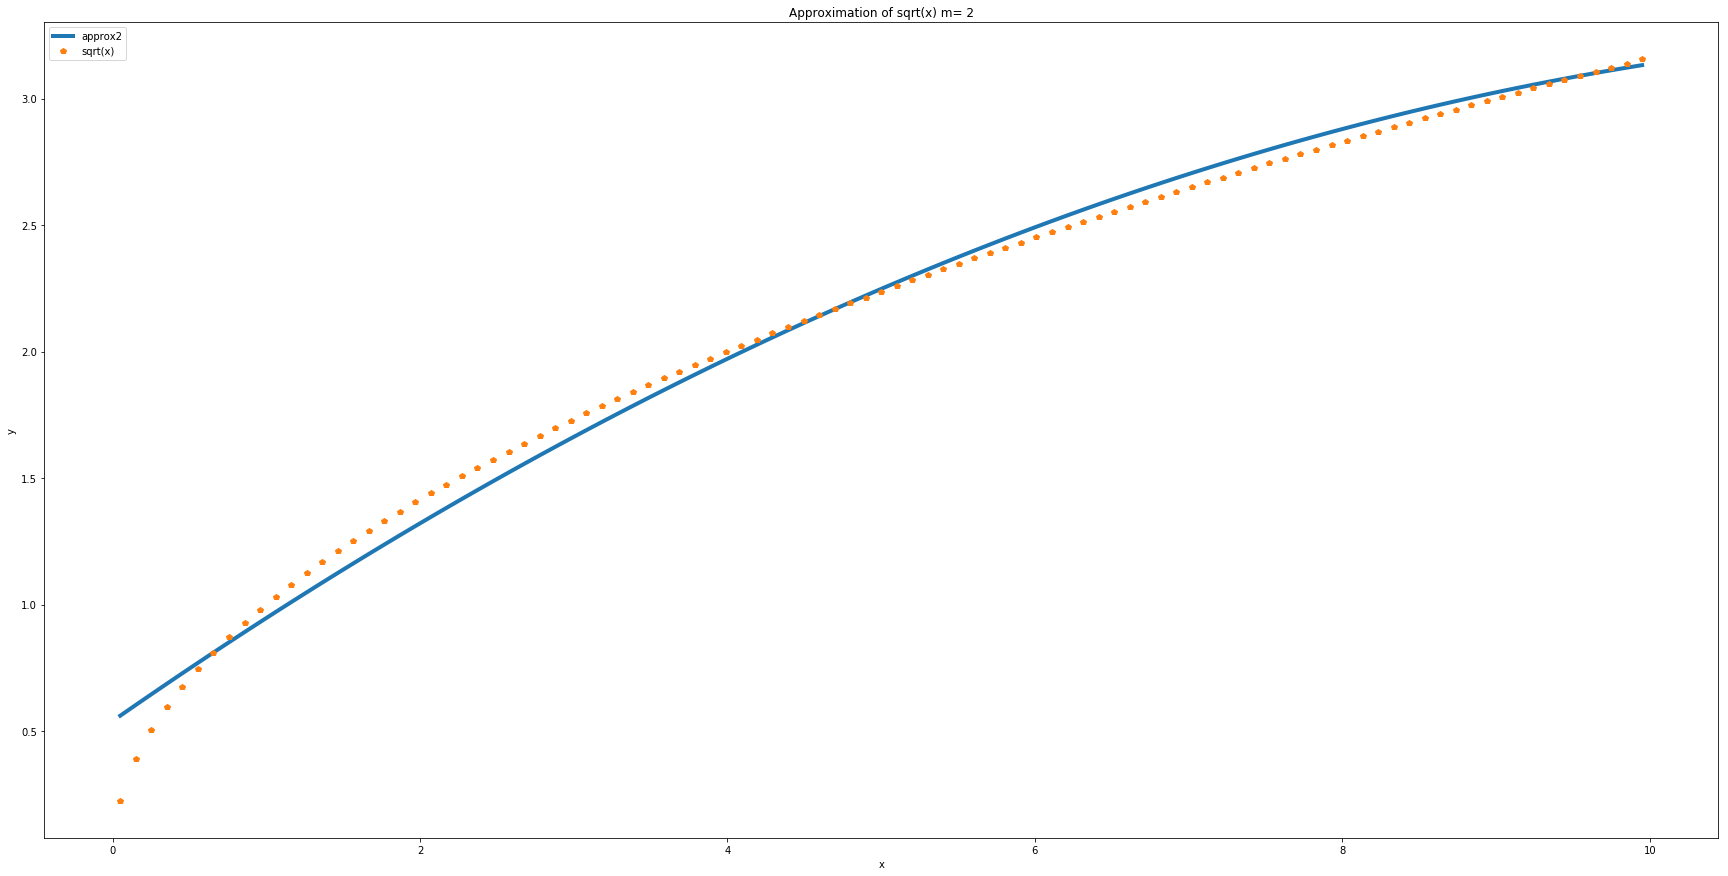



Degree: 3
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0024556659        0.0024556659
          -0.0568973145       -0.0568973145
           0.6008955459        0.6008955459
           0.3810229555        0.3810229555 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.4112264004      0.8298419651      0.1864931129
 0.1111111111  0.3333333333             0.4707700942      0.2094302702      0.0815206221
 0.2222222222  0.4714045208             0.5291755143      0.0530459774      0.0266566066
 0.3333333333  0.5773502692             0.5864578457      0.0136742400      0.0081305443
 0.4444444444  0.6666666667             0.6426322734      0.0468223013      0.0315675891
 0.5555555556  0.7453559925             0.6977139824      0.0639184639      0.0476420101
 0.666666



Degree: 4
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0004928018       -0.0004928018
           0.0132973062        0.0132973062
          -0.1333094115       -0.1333094115
           0.7855093695        0.7855093695
           0.2840817365        0.2840817365 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.3234155963      0.4391085538      0.0986823088
 0.1111111111  0.3333333333             0.4000839370      0.0278342444      0.0108344650
 0.2222222222  0.4714045208             0.4741538064      0.0564458388      0.0283651013
 0.3333333333  0.5773502692             0.5457049679      0.0822138860      0.0488834221
 0.4444444444  0.6666666667             0.6148159540      0.0880805704      0.0593839085
 0.5555555556  0.7453559925             0.6815640656  

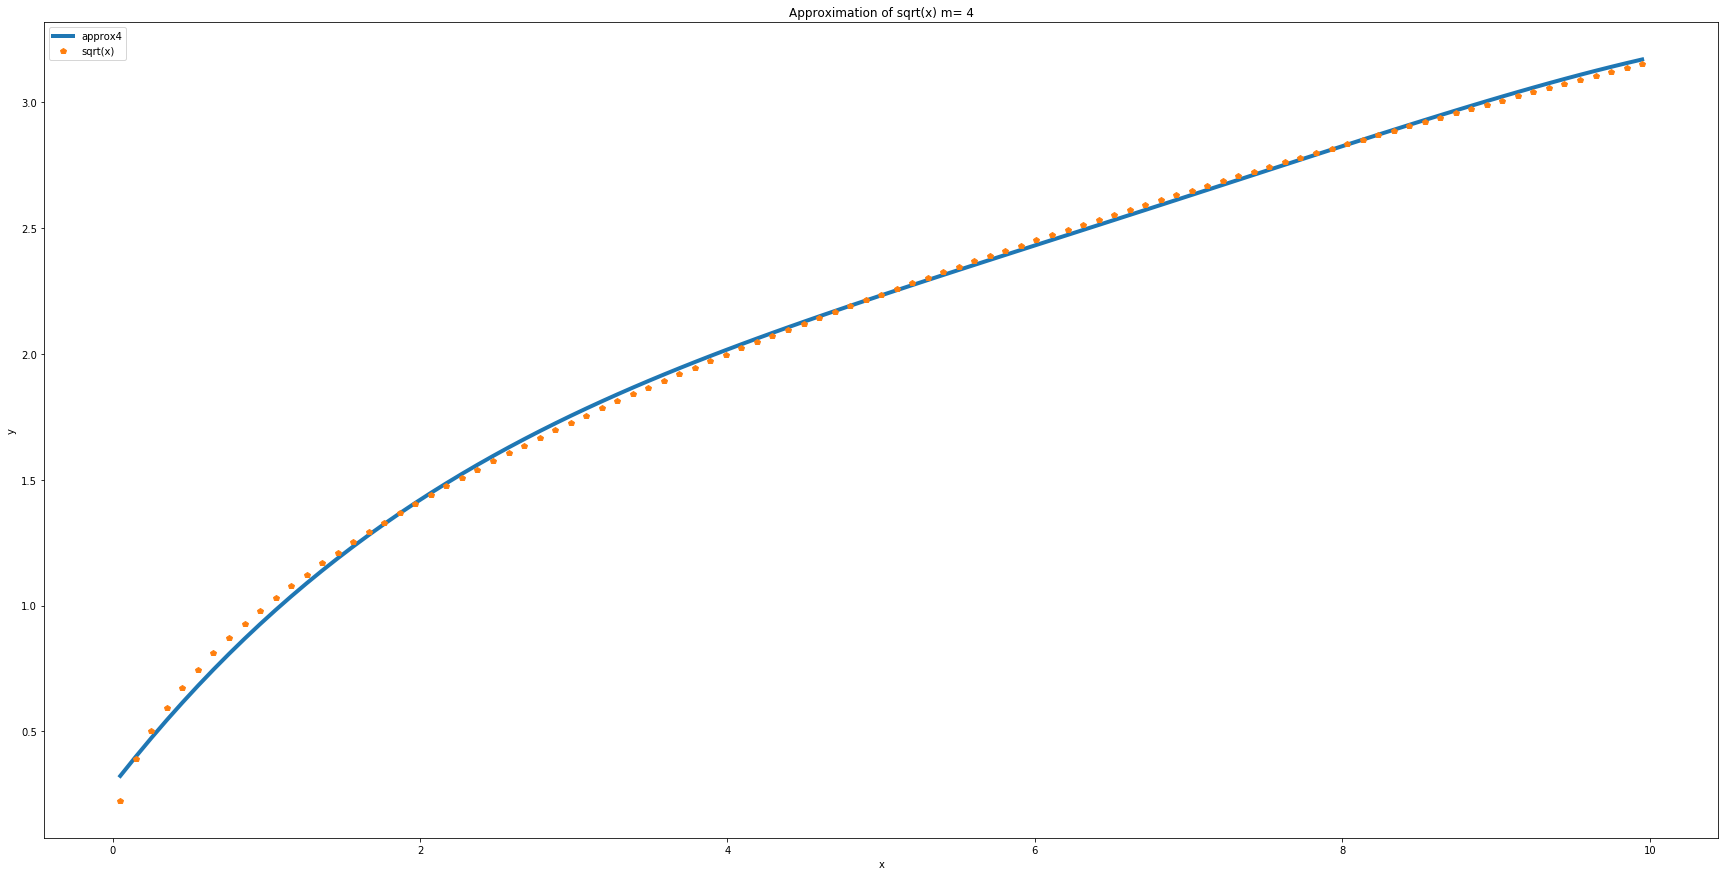



Degree: 5
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0001158431        0.0001158431
          -0.0036784870       -0.0036784870
           0.0443699521        0.0443699521
          -0.2605401691       -0.2605401691
           0.9814941753        0.9814941753
           0.2172650540        0.2172650541 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.2661765836      0.1844110259      0.0414432961
 0.1111111111  0.3333333333             0.3601475165      0.0747642776      0.0291019556
 0.2222222222  0.4714045208             0.4492023940      0.1060985225      0.0533165136
 0.3333333333  0.5773502692             0.5335975145      0.1025766338      0.0609908755
 0.4444444444  0.6666666667             0.6135803512      0.0899132656      0.0606195113
 0.5555555

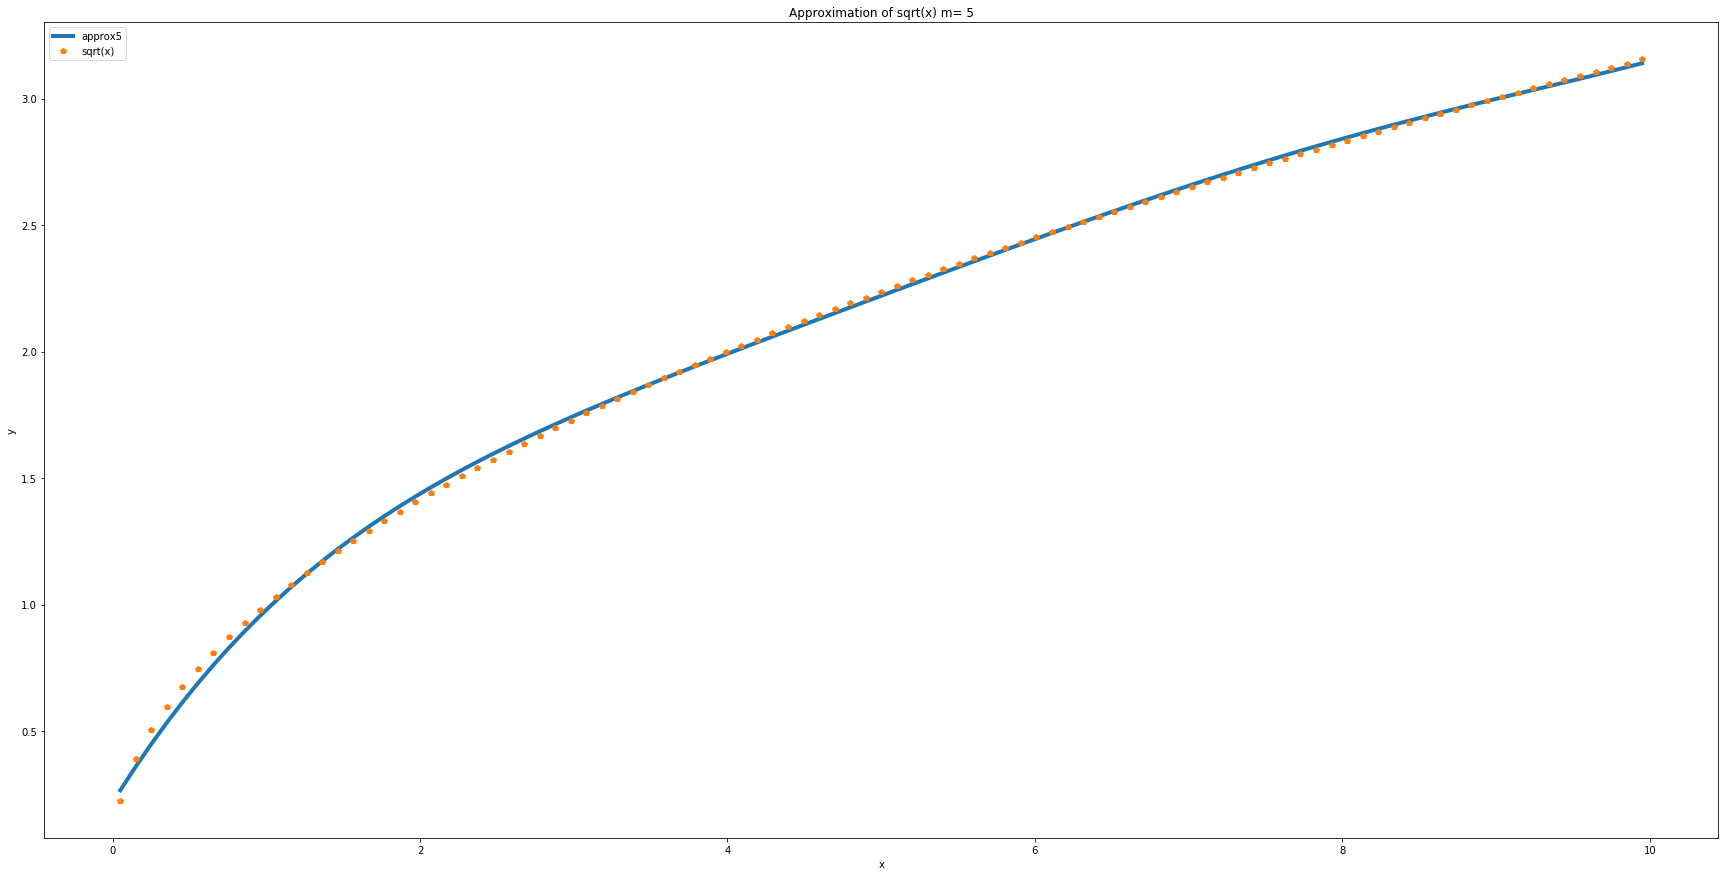



Degree: 6
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000300184       -0.0000300184
           0.0011064509        0.0011064509
          -0.0160372481       -0.0160372480
           0.1164901270        0.1164901269
          -0.4564700575       -0.4564700569
           1.1907004569        1.1907004562
           0.1679458040        0.1679458042 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.2269327481      0.0097869817      0.0021994606
 0.1111111111  0.3333333333             0.3382726783      0.1309617545      0.0509767938
 0.2222222222  0.4714045208             0.4413308837      0.1217626302      0.0611880239
 0.3333333333  0.5773502692             0.5367504938      0.0972738405      0.0578378962
 0.4444444444  0.6666666667             0.6251379847   

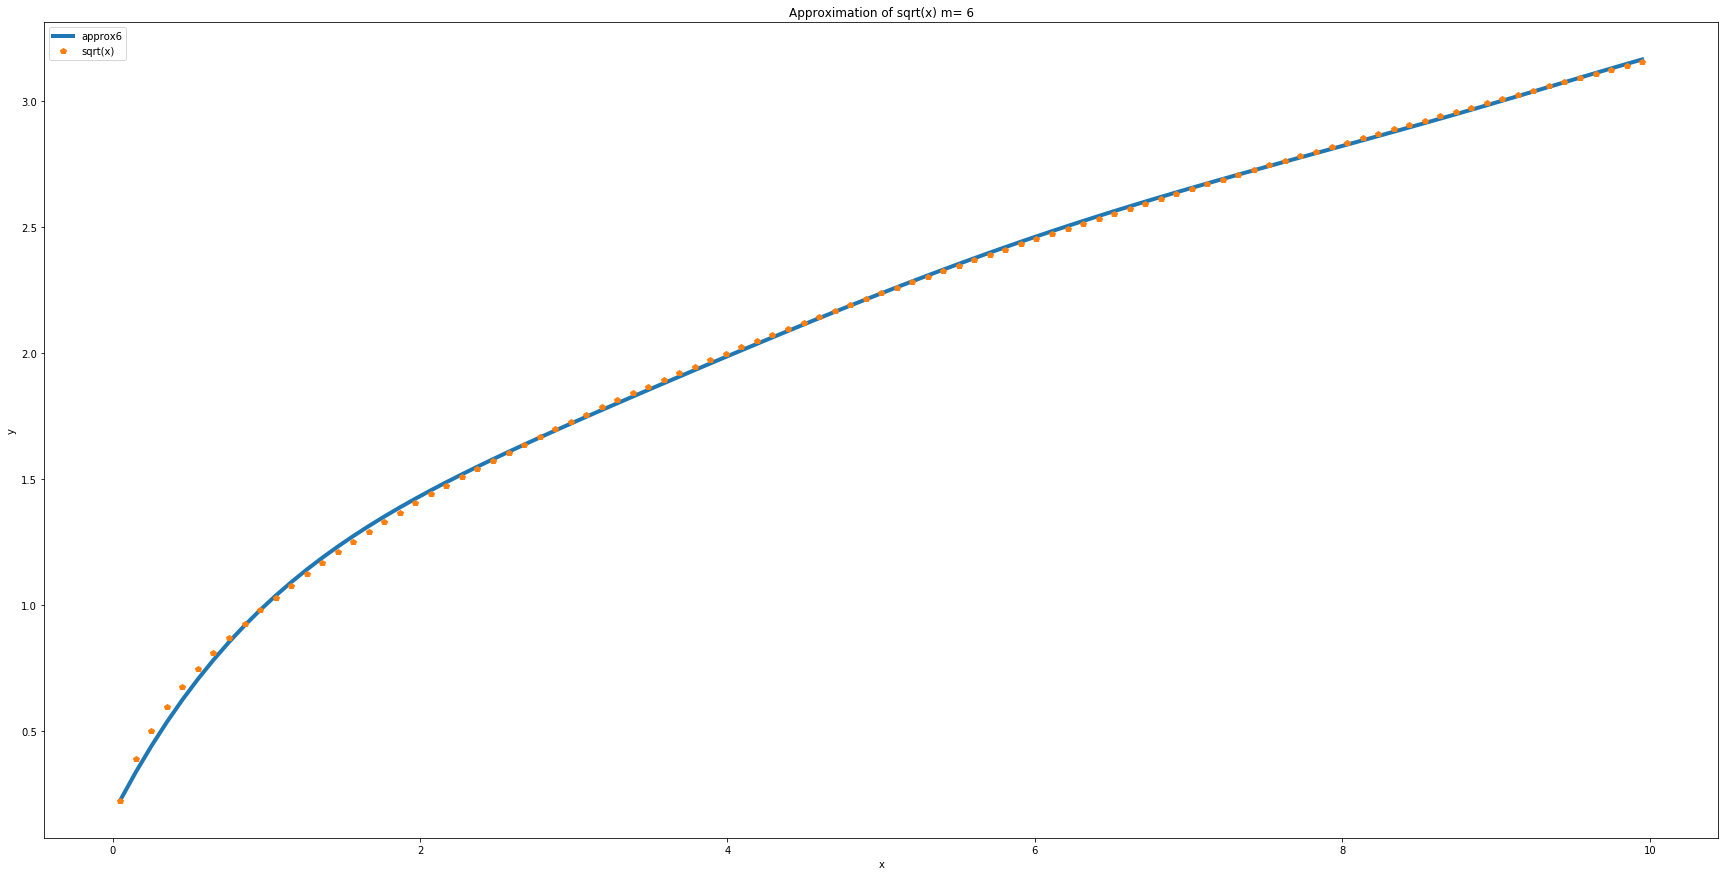



Degree: 7
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000082849        0.0000082849
          -0.0003489886       -0.0003489886
           0.0059569838        0.0059569846
          -0.0529384299       -0.0529384364
           0.2628374396        0.2628374658
          -0.7411787423       -0.7411787938
           1.4133652023        1.4133652432
           0.1300768663        0.1300768593 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1996018959      0.1118276329      0.0251313916
 0.1111111111  0.3333333333             0.3280947884      0.1571092271      0.0611546837
 0.2222222222  0.4714045208             0.4437463410      0.1169559308      0.0587725666
 0.3333333333  0.5773502692             0.5479328783      0.0784669066      0.0466555117
 0.44444444



Degree: 8
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000023833       -0.0000023833
           0.0001131508        0.0001131518
          -0.0022306068       -0.0022306253
           0.0236396973        0.0236398724
          -0.1458493688       -0.1458503020
           0.5320953515        0.5320981035
          -1.1356373526       -1.1356414668
           1.6483644852        1.6483670003
           0.1003814597        0.1003811302 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1808030595      0.1954771743      0.0439302280
 0.1111111111  0.3333333333             0.3258387962      0.1629049759      0.0634106759
 0.2222222222  0.4714045208             0.4522157480      0.1001020238      0.0503031596
 0.3333333333  0.5773502692             0.5625561606    



Degree: 9
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000007044        0.0000007046
          -0.0000372523       -0.0000372618
           0.0008343407        0.0008345388
          -0.0103070379       -0.0103092839
           0.0766718551        0.0766868116
          -0.3523208429       -0.3523800392
           0.9906199919        0.9907540809
          -1.6600132442       -1.6601703372
           1.8934436027        1.8935193475
           0.0768902693        0.0768826655 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1684097890      0.2506237465      0.0563234985
 0.1111111111  0.3333333333             0.3289330062      0.1549558065      0.0603164659
 0.2222222222  0.4714045208             0.4637708452      0.0771076707      0.0387480624
 0.333333333

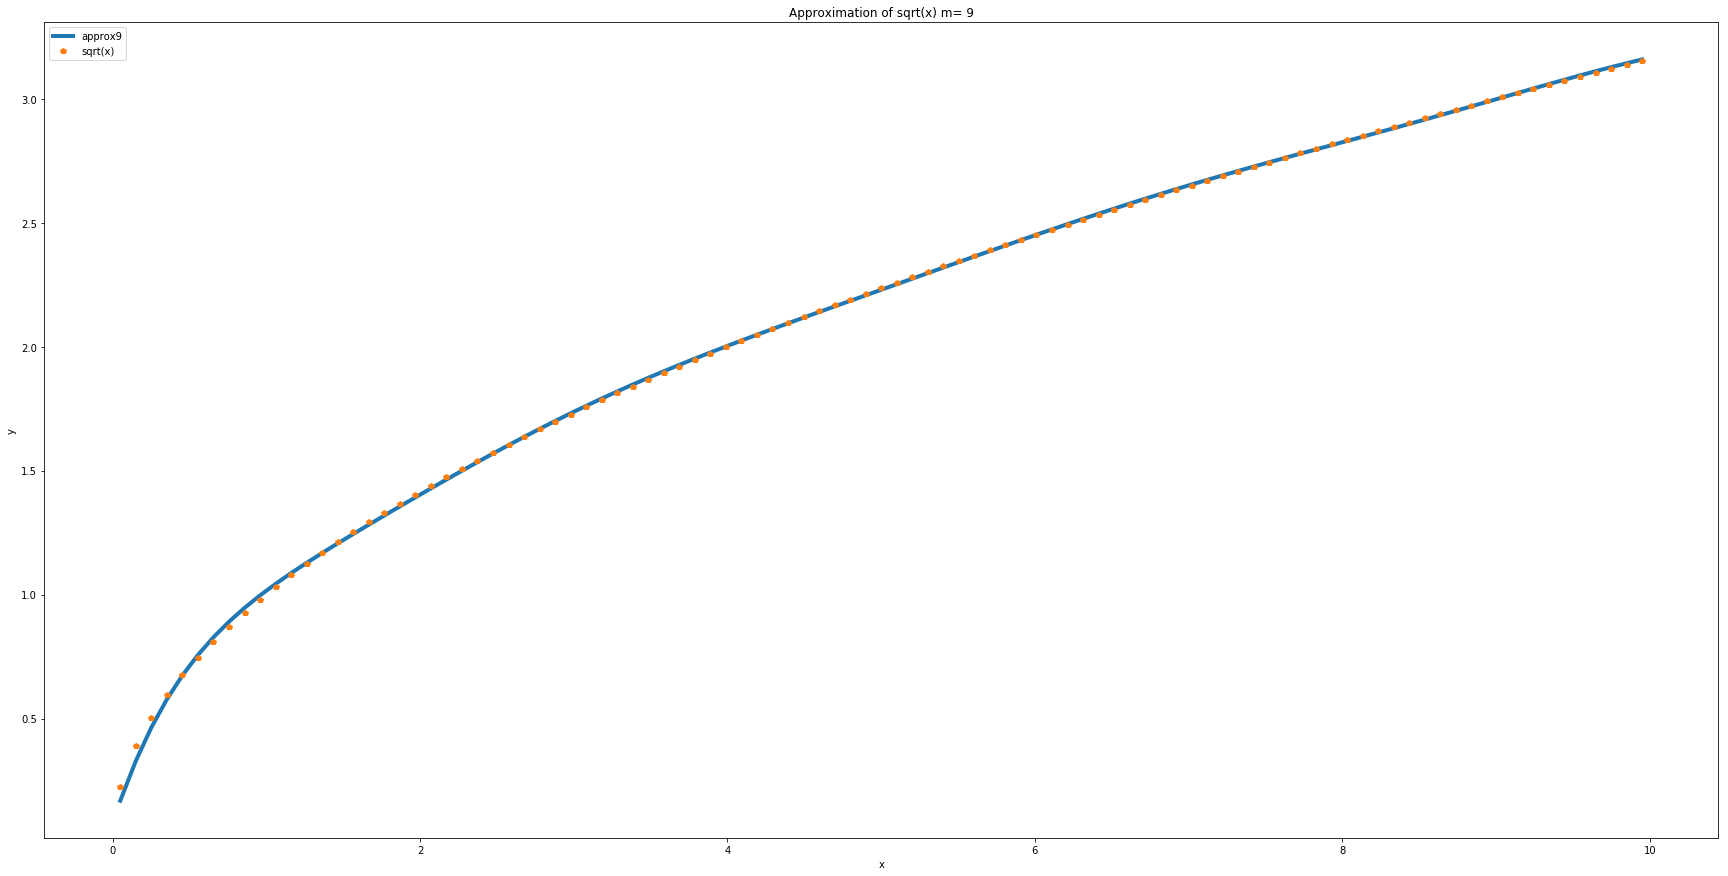



Degree: 10
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000002118       -0.0000002125
           0.0000123553        0.0000123952
          -0.0003101728       -0.0003111260
           0.0043843284        0.0043970050
          -0.0383288539       -0.0384314636
           0.2144081279        0.2149273464
          -0.7683019846       -0.7699239627
           1.7229539632        1.7259259075
          -2.3318393338       -2.3347015306
           2.1455007781        2.1466428544
           0.0583001794        0.0582074802 
)
            x       sqrt(x)    sqrt(x) approximation    relative error    absolute error
-------------  ------------  -----------------------  ----------------  ----------------
 0.0000000000  0.0000000000             0.1609278745      0.2839161646      0.0638054130
 0.1111111111  0.3333333333             0.3354491135      0.1382156237      0.0538003586
 0.2222222222  0.4714045208             0.4762256790    

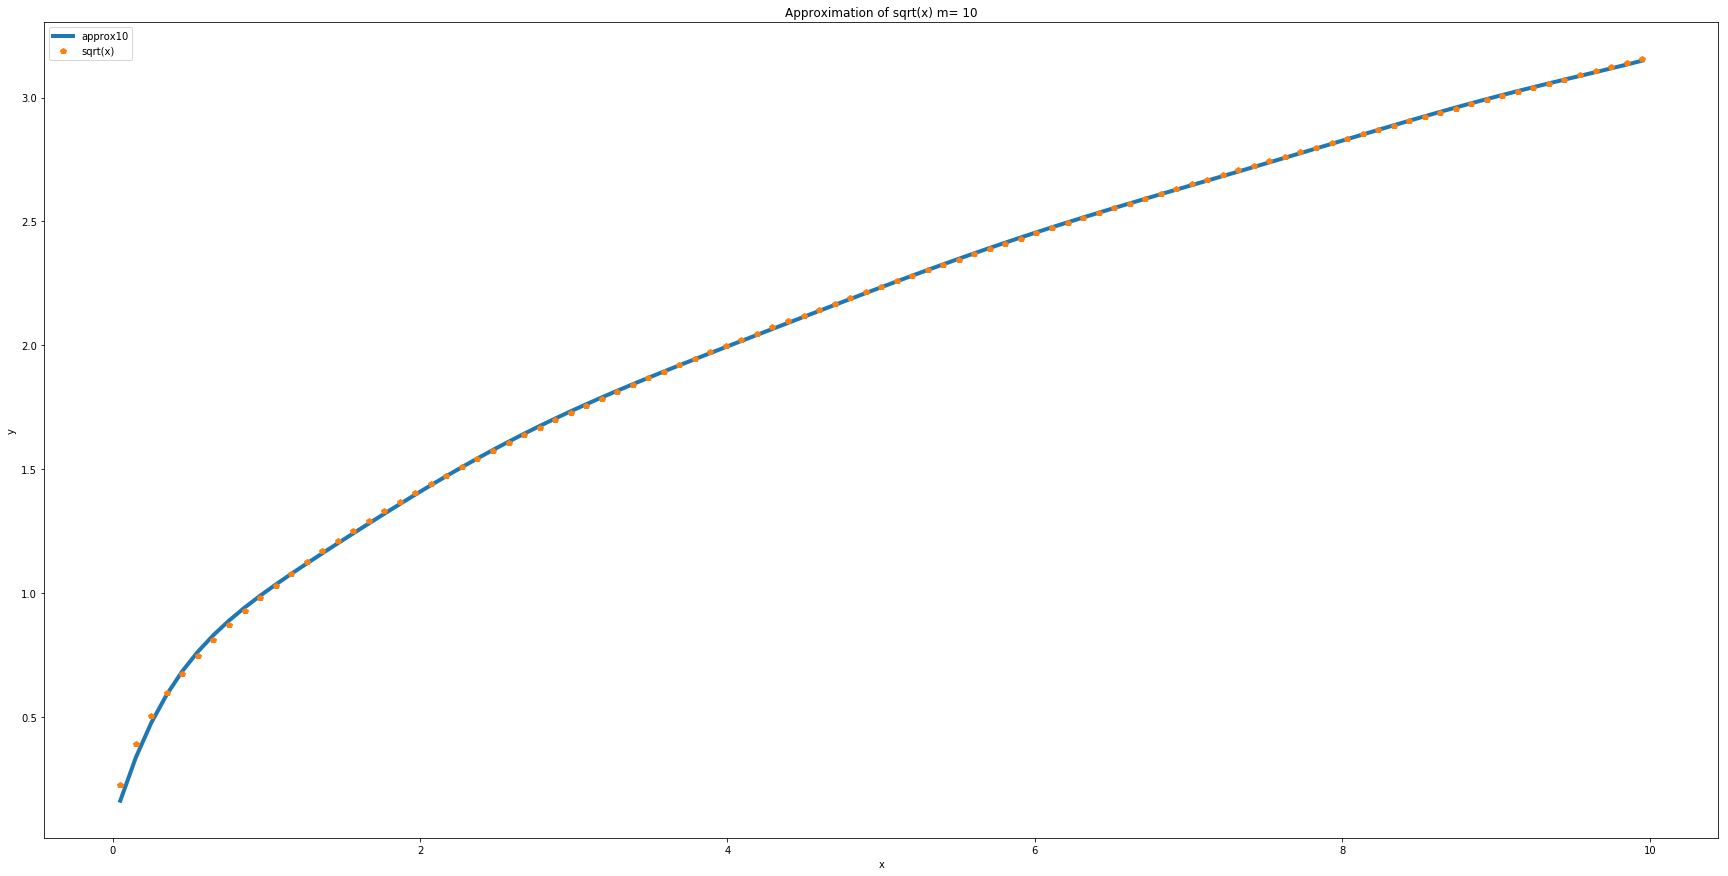

Function: x^3+2x


Degree: 1
  polyfit approximation    my approximation
-----------------------  ------------------
         111.2641975309      111.2641975309
        -264.8419753086     -264.8419753086 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000         -259.2225713929   2564.0346135426    259.3237103202
 0.1111111111     0.2235939643         -247.9837635615    810.0596923387    248.2902721738
 0.2222222222     0.4554183813         -236.7449557301    455.2708138627    237.2661095188
 0.3333333333     0.7037037037         -225.5061478987    301.1713295242    226.2574060161
 0.4444444444     0.9766803841         -214.2673400673    214.6253405465    215.2703453265
 0.5555555556     1.2825788752         -203.0285322359    159.2971122995    204.3111111111
 0.6666666667     1.6296296296         -191.7897244045    121.15



Degree: 2
  polyfit approximation    my approximation
-----------------------  ------------------
          16.5000000000       16.5000000000
         -70.2358024691      -70.2358024691
          64.5469135802       64.5469135802 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000           61.0417383714    602.5434625771     60.9405994441
 0.1111111111     0.2235939643           54.2839132061    176.1040389368     53.9774045938
 0.2222222222     0.4554183813           47.8627883776     90.8400468680     47.3416345889
 0.3333333333     0.7037037037           41.7783638858     54.6111979642     41.0271057684
 0.4444444444     0.9766803841           36.0306397306     34.9226827577     35.0276344714
 0.5555555556     1.2825788752           30.6196159122     22.8734759358     29.3370370370
 0.6666666667     1.6296296296       



Degree: 3
  polyfit approximation    my approximation
-----------------------  ------------------
           1.0000000000        1.0000000000
           0.0000000000        0.0000000000
           2.0000000000        2.0000000000
           0.0000000000        0.0000000000 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000
 0.4444444444     0.9766803841            1.0030052592      0.0000000000      0.0000000000
 0.5555555556     1.2825788752            1.2825788752      0.0000000000      0.0000



Degree: 4
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000000000        1.0000000000
           1.0000000000        0.0000000000
           0.0000000000        1.9999999999
           2.0000000000       -0.0000000000
           0.0000000000 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000
 0.4444444444     0.9766803841            1.0030052592      0.0000000000      0.0000000000
 0.5555555556     1.2825788752            1.2825788752      

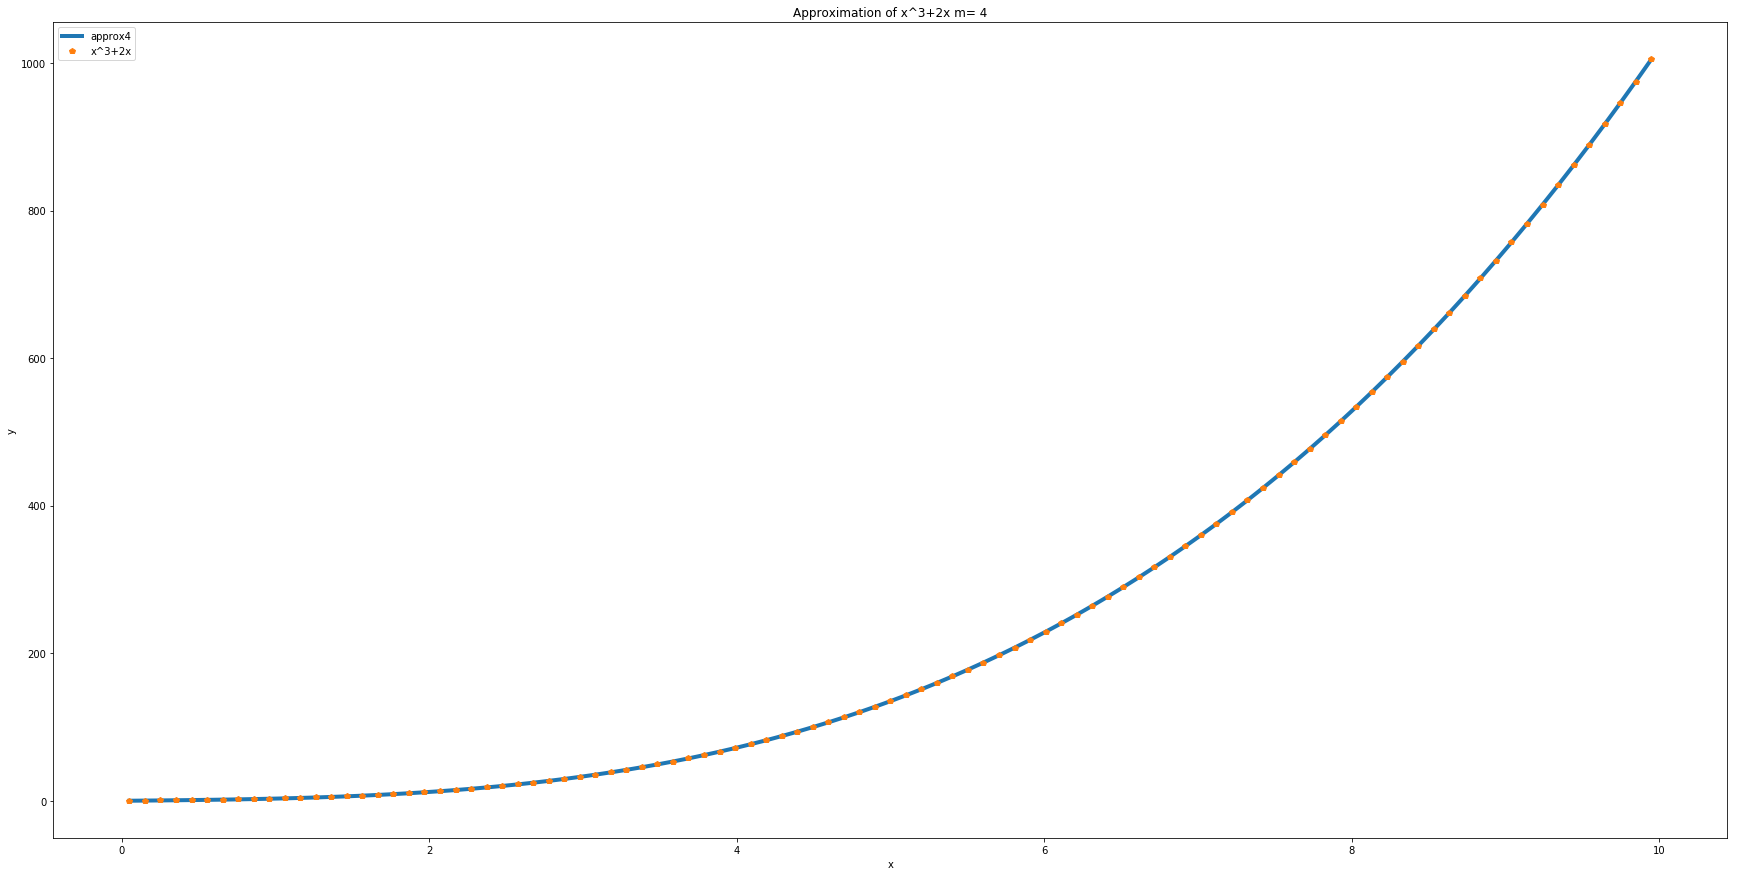



Degree: 5
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000000000        0.0000000000
           0.0000000000       -0.0000000000
           1.0000000000        1.0000000001
           0.0000000000       -0.0000000002
           2.0000000000        2.0000000007
           0.0000000000       -0.0000000001 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000
 0.4444444444     0.9766803841            1.0030052592      0.0000000000      0.0000000



Degree: 6
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000000000        0.0000000000
          -0.0000000000       -0.0000000000
           0.0000000000       -0.0000000001
           1.0000000000        1.0000000009
           0.0000000000        0.0000000000
           2.0000000000        1.9999999991
           0.0000000000        0.0000000012 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000
 0.4444444444     0.9766803841            1

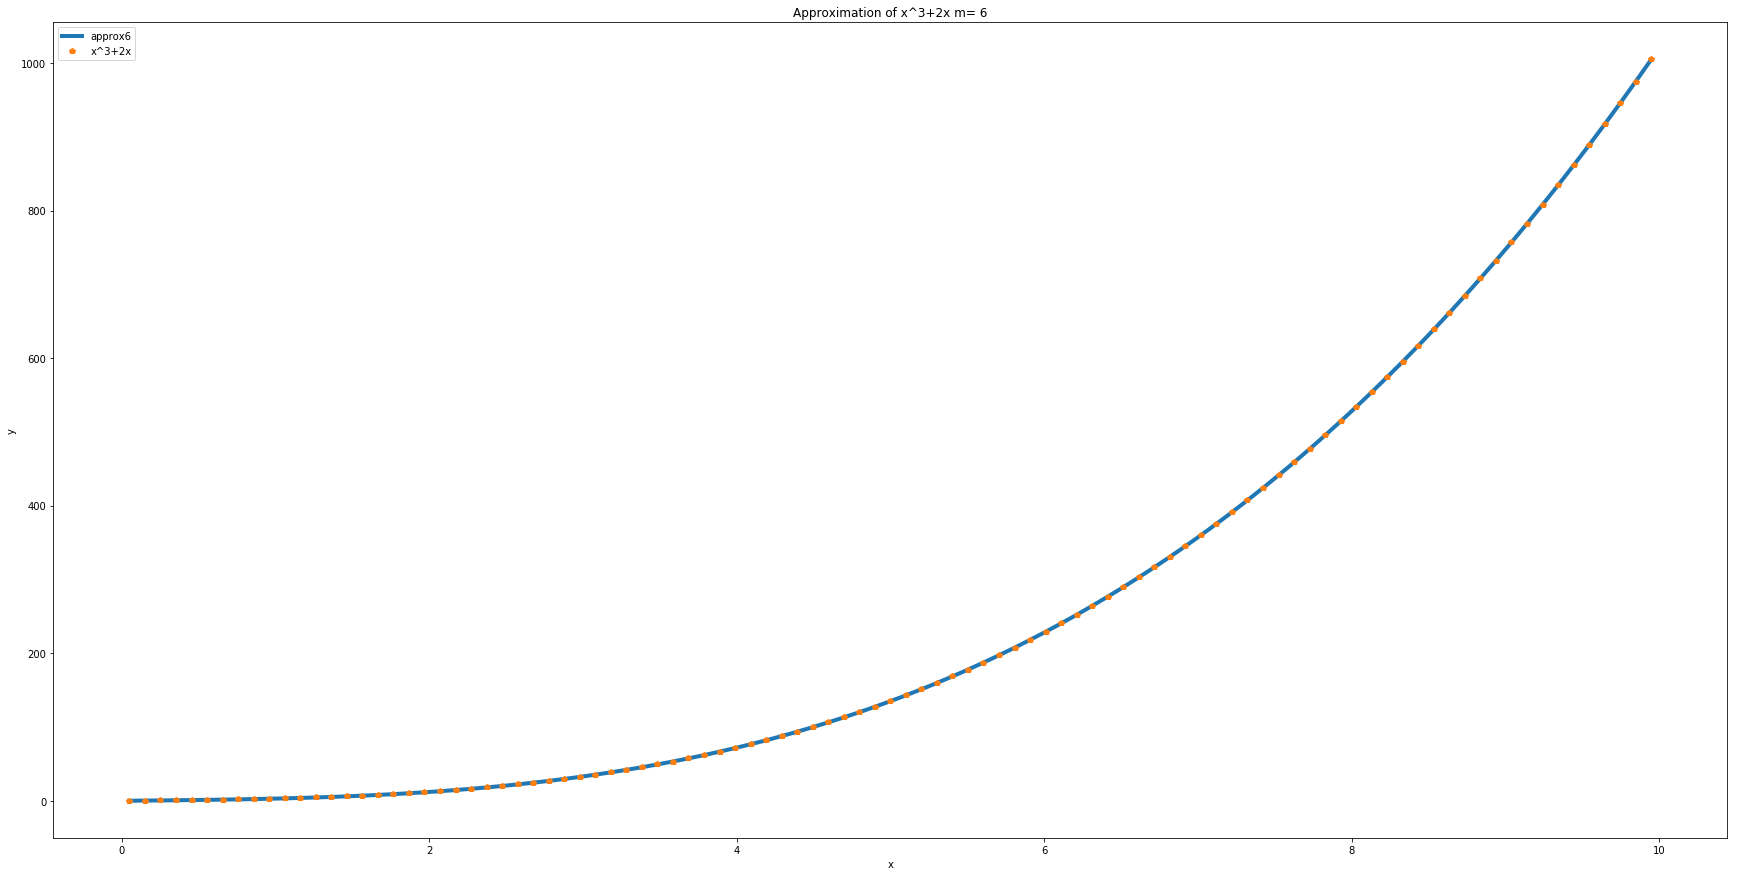



Degree: 7
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000000000        0.0000000000
          -0.0000000000       -0.0000000000
           0.0000000000        0.0000000005
          -0.0000000000        0.0000000019
           1.0000000000        1.0000000261
          -0.0000000000       -0.0000000149
           2.0000000000        2.0000000224
           0.0000000000       -0.0000000019 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.7512581173      0.0000000000      0.0000000000

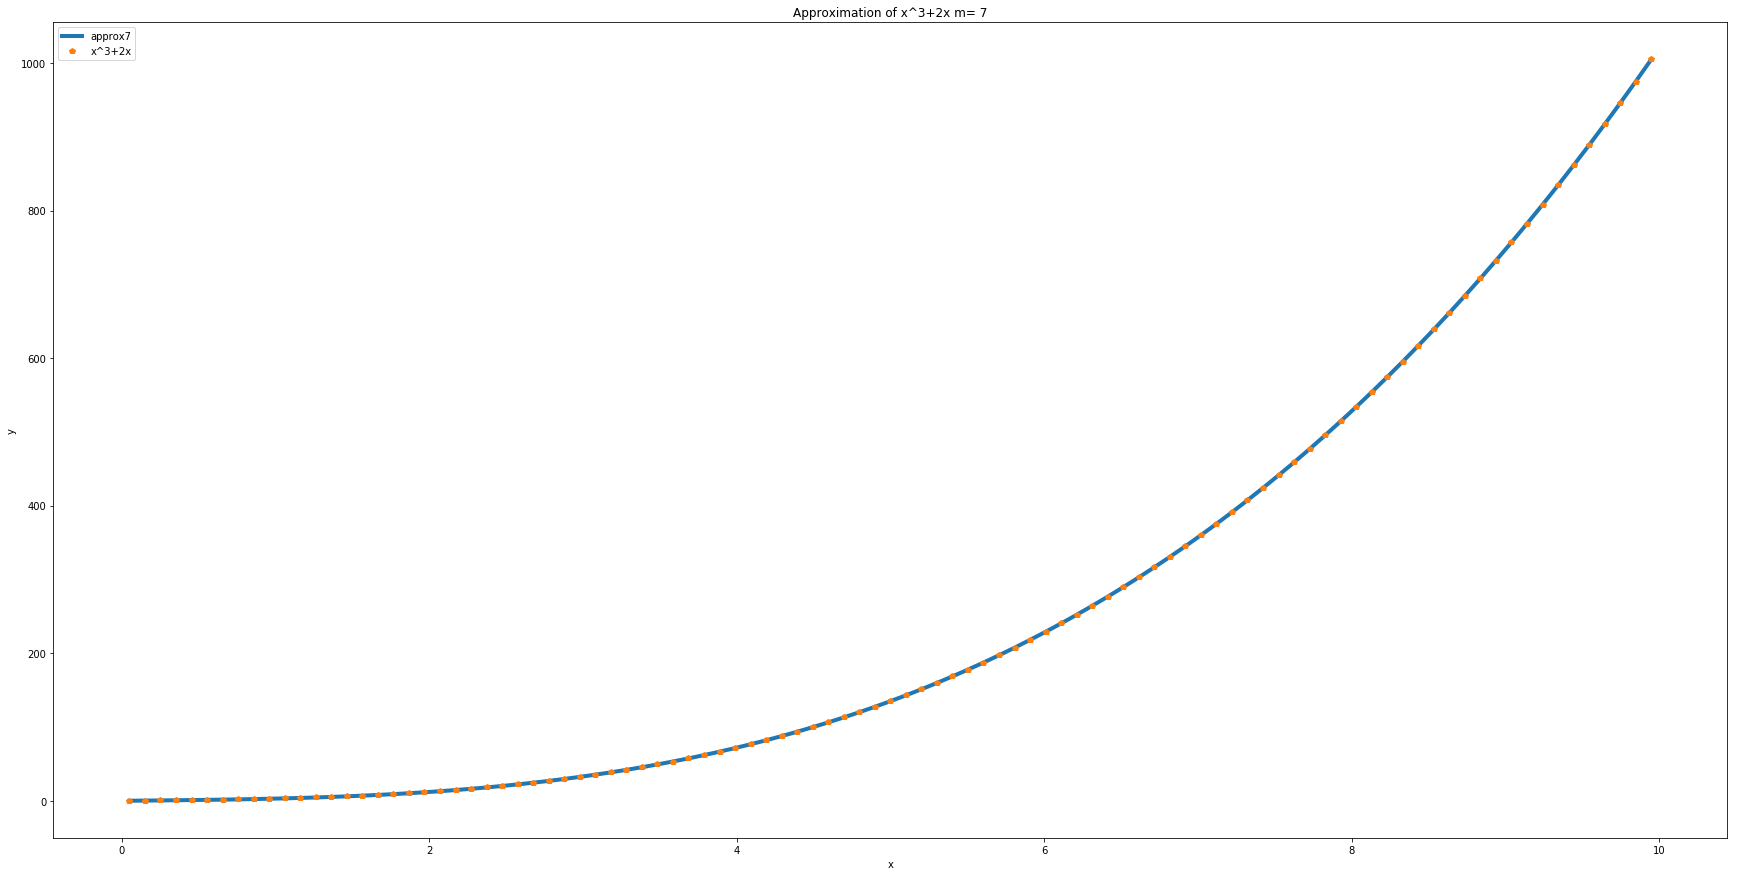



Degree: 8
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0000000000       -0.0000000000
          -0.0000000000        0.0000000000
          -0.0000000000       -0.0000000035
           0.0000000000        0.0000000093
          -0.0000000000       -0.0000001788
           1.0000000000        0.9999999404
          -0.0000000000        0.0000002086
           2.0000000000        2.0000000298
          -0.0000000000        0.0000000000 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0.3333333333     0.7037037037            0.75

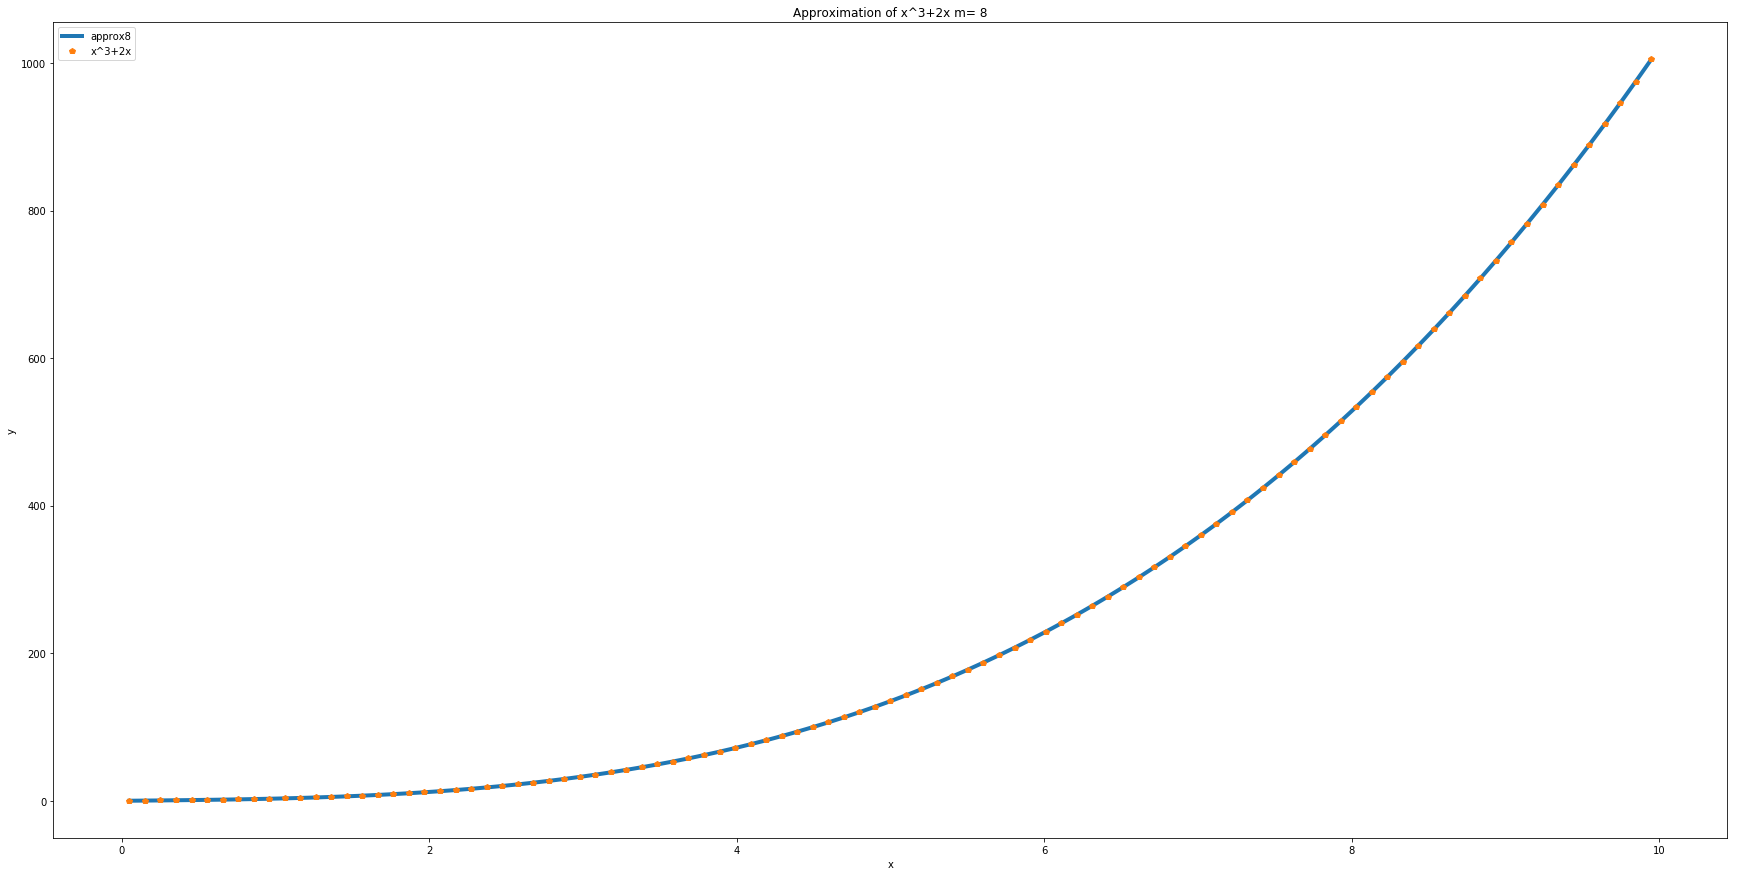



Degree: 9
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000000000        0.0000000000
           0.0000000000       -0.0000000006
          -0.0000000000        0.0000000037
           0.0000000000       -0.0000001192
          -0.0000000000        0.0000006557
           0.0000000000       -0.0000028610
           1.0000000000        1.0000066757
           0.0000000000       -0.0000047684
           2.0000000000        2.0000023842
           0.0000000000       -0.0000004768 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211537887      0.0000000000      0.0000000000
 0

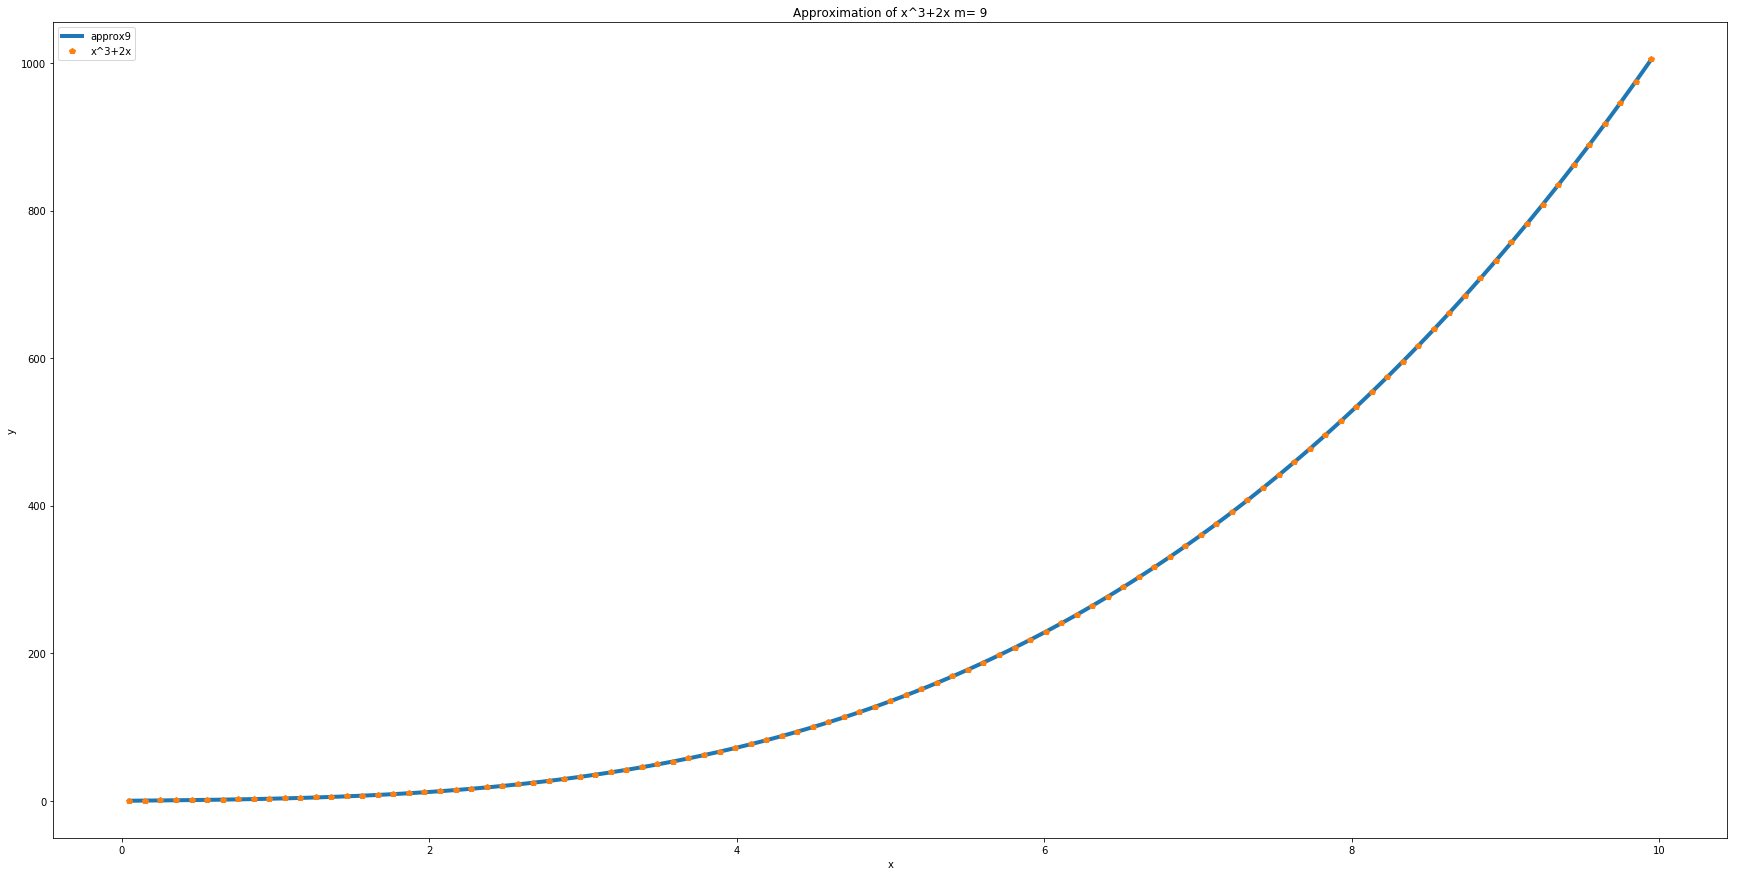



Degree: 10
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000000000       -0.0000000000
           0.0000000000        0.0000000014
          -0.0000000000       -0.0000000247
           0.0000000000        0.0000005364
          -0.0000000000       -0.0000028610
           0.0000000000        0.0000114441
          -0.0000000000       -0.0000352859
           1.0000000000        1.0001087189
          -0.0000000000       -0.0001201630
           2.0000000000        2.0000290871
           0.0000000000       -0.0000029206 
)
            x           x^3+2x    x^3+2x approximation    relative error    absolute error
-------------  ---------------  ----------------------  ----------------  ----------------
 0.0000000000     0.0000000000            0.1011389273      0.0000000000      0.0000000000
 0.1111111111     0.2235939643            0.3065086123      0.0000000000      0.0000000000
 0.2222222222     0.4554183813            0.5211

In [14]:
import numpy
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate

def compare_precision_polyfit(fx, d, fx_name):
    points = getPoints(100)
    val_x = np.array(np.linspace(0, 11, 100))
    val_y = lookupTab(fx,100)
    poly = np.polyfit(val_x, val_y, d)
    poly = np.poly1d(poly)
    my_poly = least_squares_aproxy(val_y, val_x, d)
    results =  poly(points)
    print(tabulate({"polyfit approximation" : poly, "my approximation" : my_poly}, headers="keys", floatfmt=".10f"), "\n)")
    
    absolute_error = (len(points)) *[0]
    relative_error = (len(points)) * [0]
    for i in range(0, len(fx(points))):
        absolute_error[i] = abs(results[i] - fx((points)[i]))
        relative_error[i] = absolute_error[i]/fx((points)[i])
    print(tabulate({"x": val_x, fx_name: val_y, fx_name + " approximation": results, 
                  "relative error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    print("Mean of statistic error: ",statistics.mean(relative_error))
    
    show_graph_polyfit(points, results, fx, fx_name, d)
    
    
def show_graph_polyfit(points, results, fx, fx_name, d):
    fig,ax=plt.subplots()
    fig.set_size_inches(30, 15)
    plt.plot(points, results,linewidth = 4, label ='approx' + str(d))
    plt.plot(points, fx(points), 'p', label=fx_name)
    plt.title('Approximation of ' + fx_name+ ' m= '+ str(d))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def show_all_polyfit():
    fx = [lambda x: np.sin(x), lambda x: np.sqrt(x), lambda x: x**3+2*x]
    fx_names=["sin(x)", "sqrt(x)", "x^3+2x"]
    
    for f in range(len(fx)):
        print("Function:", fx_names[f])
        for i in range(1, 11, +1):
            print("\n\nDegree:", i)
            compare_precision_polyfit(fx[f], i, fx_names[f])
            
show_all_polyfit()    

### Aproksymacja wielomianowa średniokwadratowa dla danych o koronawirusie za pomocą polyfit z pakietu numpy

Liczba chorych na COVID-19 w Polsce

Data       Liczba zachorowań
-------  -------------------
3/4/20                     1
3/5/20                     1
3/6/20                     5
3/7/20                     5
3/8/20                    11
3/9/20                    16
3/10/20                   22
3/11/20                   31
3/12/20                   49
3/13/20                   68
3/14/20                  103
3/15/20                  119
3/16/20                  177
3/17/20                  238
3/18/20                  251
3/19/20                  355
3/20/20                  425
3/21/20                  536
3/22/20                  634
3/23/20                  749
3/24/20                  901
3/25/20                 1051
3/26/20                 1221
3/27/20                 1389
3/28/20                 1638
3/29/20                 1862
3/30/20                 2055
3/31/20                 2311
4/1/20                  2554
4/2/20                  2946
4/3/20                  3383
4/4/20

Polynomial degree: 2
  polyfit approximation    my approximation
-----------------------  ------------------
           6.4292876241        6.4292876241
        -104.8721256684     -104.8721256684
         343.0327540107      343.0327540107 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1   244.5899159664    243.5899159664    243.5899159664
3/5/20                      1   159.0056531704    158.0056531704    158.0056531704
3/6/20                      5    86.2799656226     16.2559931245     81.2799656226
3/7/20                      5    26.4128533231      4.2825706646     21.4128533231
3/8/20                     11   -20.5956837280      2.8723348844     31.5956837280
3/9/20                     16   -54.7456455309      4.4216028457     70.7456455309
3/10/20                    22   -76.0370320856      4.4562287312     98.0370320856
3/11/20  

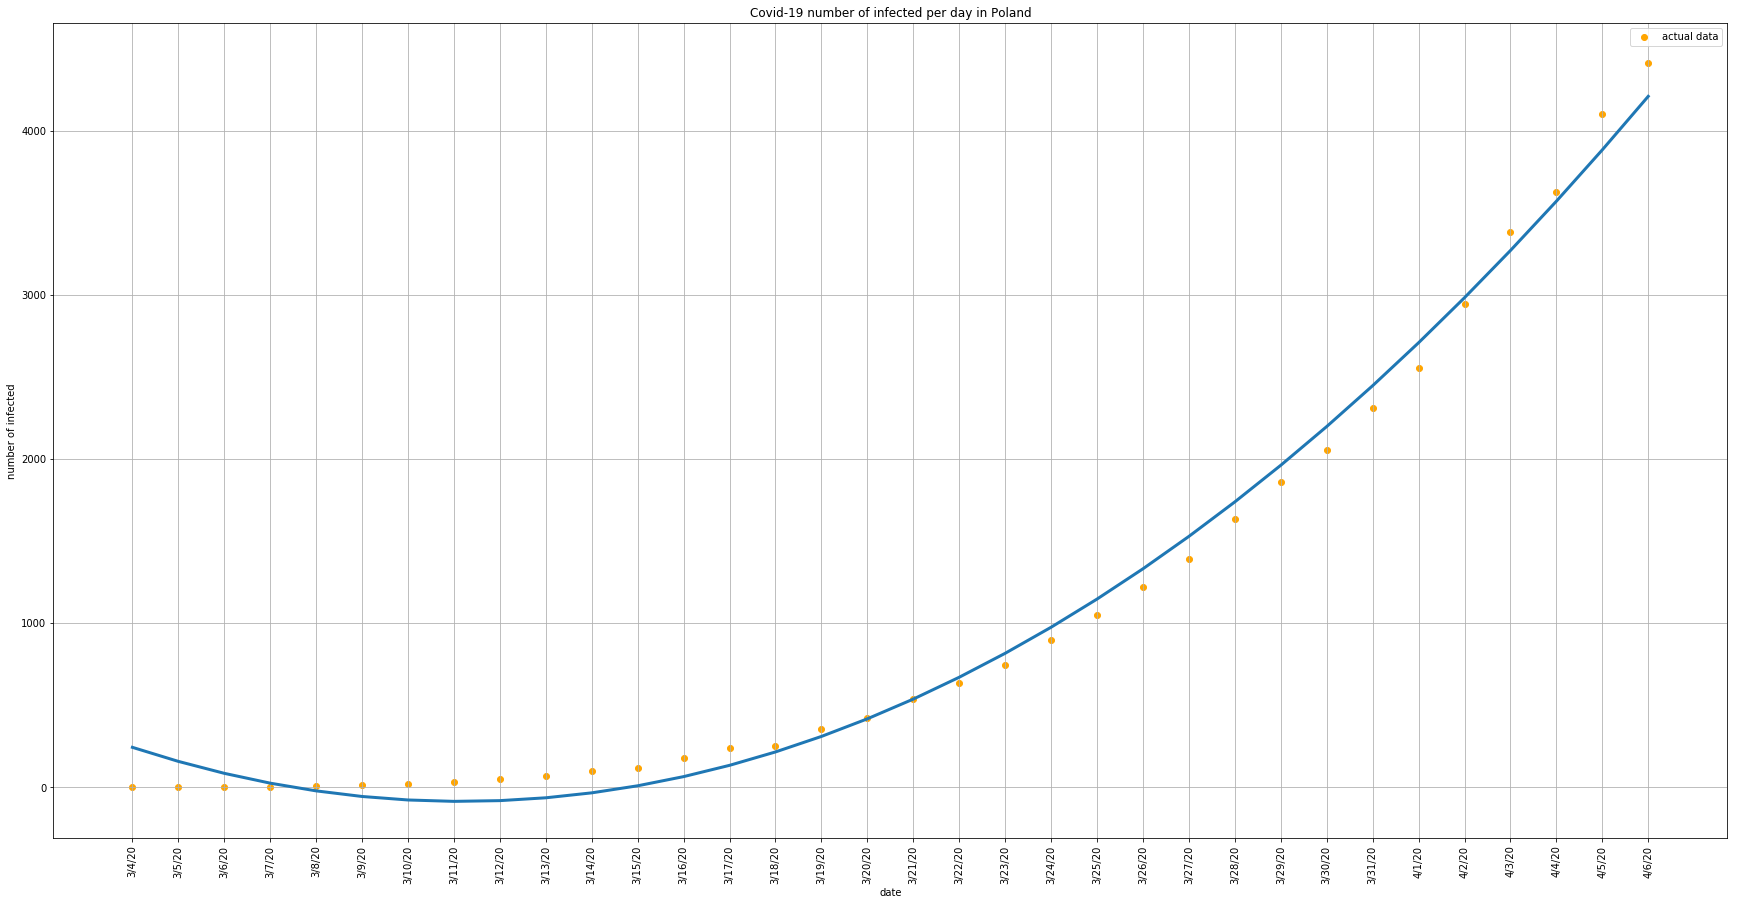

Polynomial degree: 3
  polyfit approximation    my approximation
-----------------------  ------------------
           0.1514900920        0.1514900920
          -1.5239422035       -1.5239422035
           8.0940359024        8.0940359024
         -10.0906503364      -10.0906503364 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -3.3690665455      4.3690665455      4.3690665455
3/5/20                      1     1.2135733900      0.2135733900      0.2135733900
3/6/20                      5     4.5662100221      0.0867579956      0.4337899779
3/7/20                      5     7.5977839023      0.5195567805      2.5977839023
3/8/20                     11    11.2172355825      0.0197486893      0.2172355825
3/9/20                     16    16.3335056143      0.0208441009      0.3335056143
3/10/20                    22    23.8555345496  

Polynomial degree: 4
  polyfit approximation    my approximation
-----------------------  ------------------
           0.0002651753        0.0002651753
           0.1329278183        0.1329278183
          -1.1021240058       -1.1021240058
           4.6997915813        4.6997915812
          -3.3795928929       -3.3795928927 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     0.3512676763      0.6487323237      0.6487323237
3/5/20                      1     2.6791595987      1.6791595987      1.6791595987
3/6/20                      5     4.4111960962      0.1177607808      0.5888039038
3/7/20                      5     6.3608545991      0.2721709198      1.3608545991
3/8/20                     11     9.3479767457      0.1501839322      1.6520232543
3/9/20                     16    14.1987683824      0.1125769761      1.8012316176
3/10

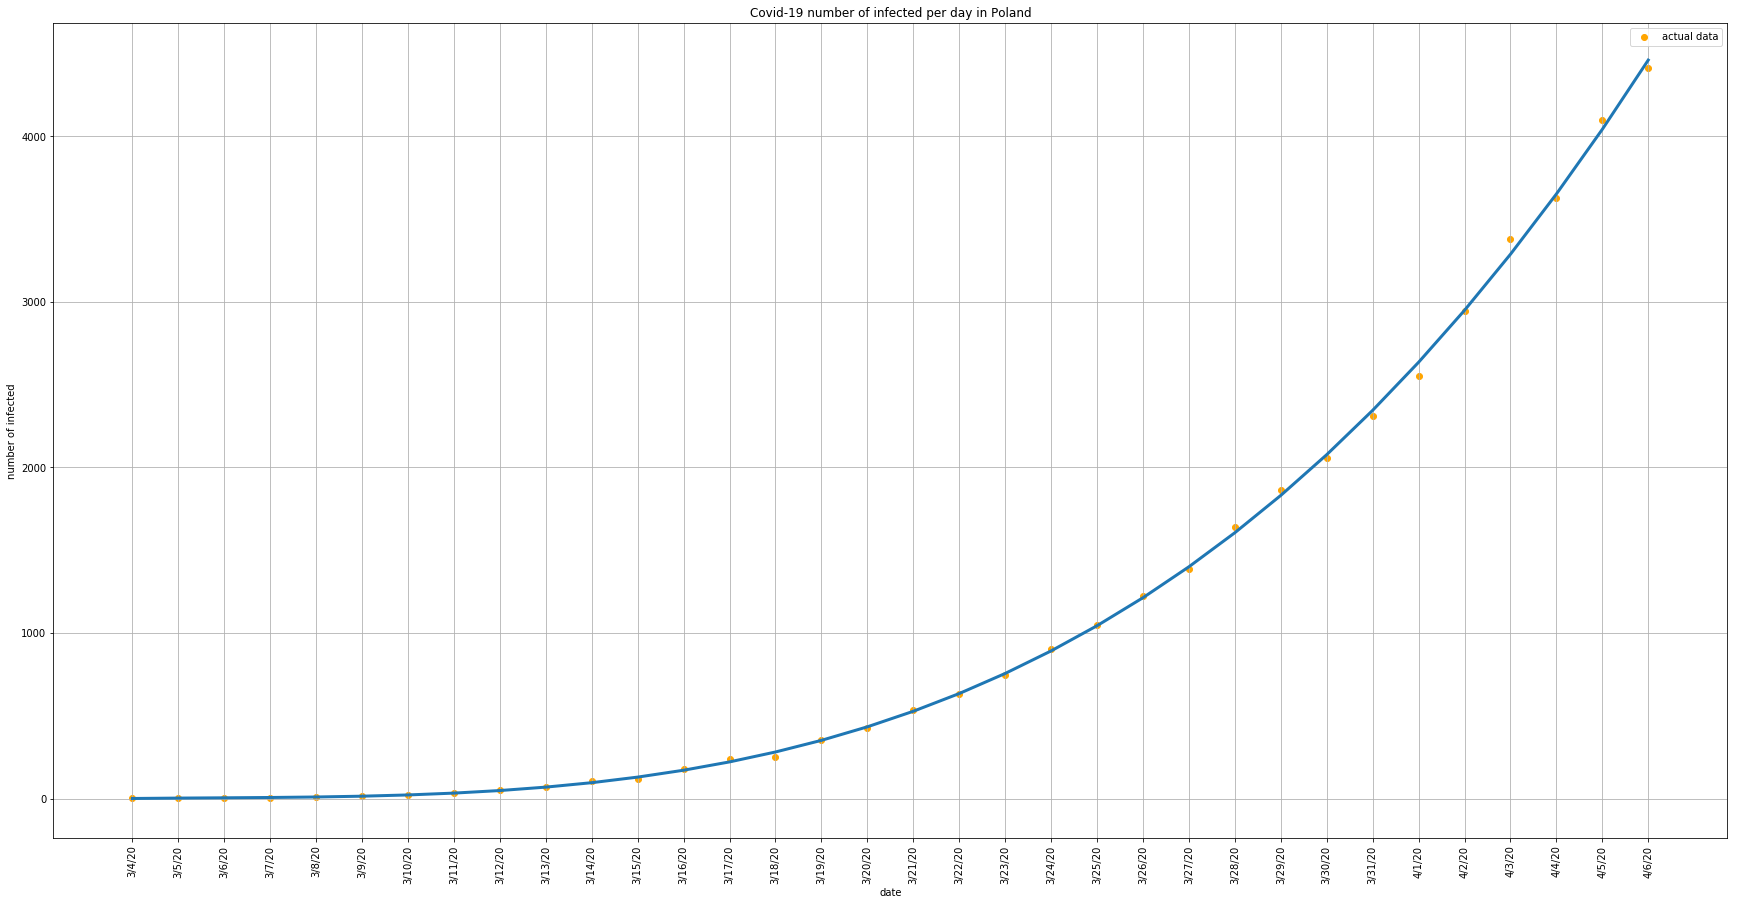

Polynomial degree: 5
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000142697       -0.0000142697
           0.0015137784        0.0015137784
           0.0937811387        0.0937811387
          -0.5764621063       -0.5764621065
           1.9124311155        1.9124311162
           0.5327443446        0.5327443434 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     1.9639940011      0.9639940011      0.9639940011
3/5/20                      1     2.8257710827      1.8257710827      1.8257710827
3/6/20                      5     3.7331179823      0.2533764035      1.2668820177
3/7/20                      5     5.3339830352      0.0667966070      0.3339830352
3/8/20                     11     8.3075081491      0.2447719864      2.6924918509
3/9/20                     16    13.3623164

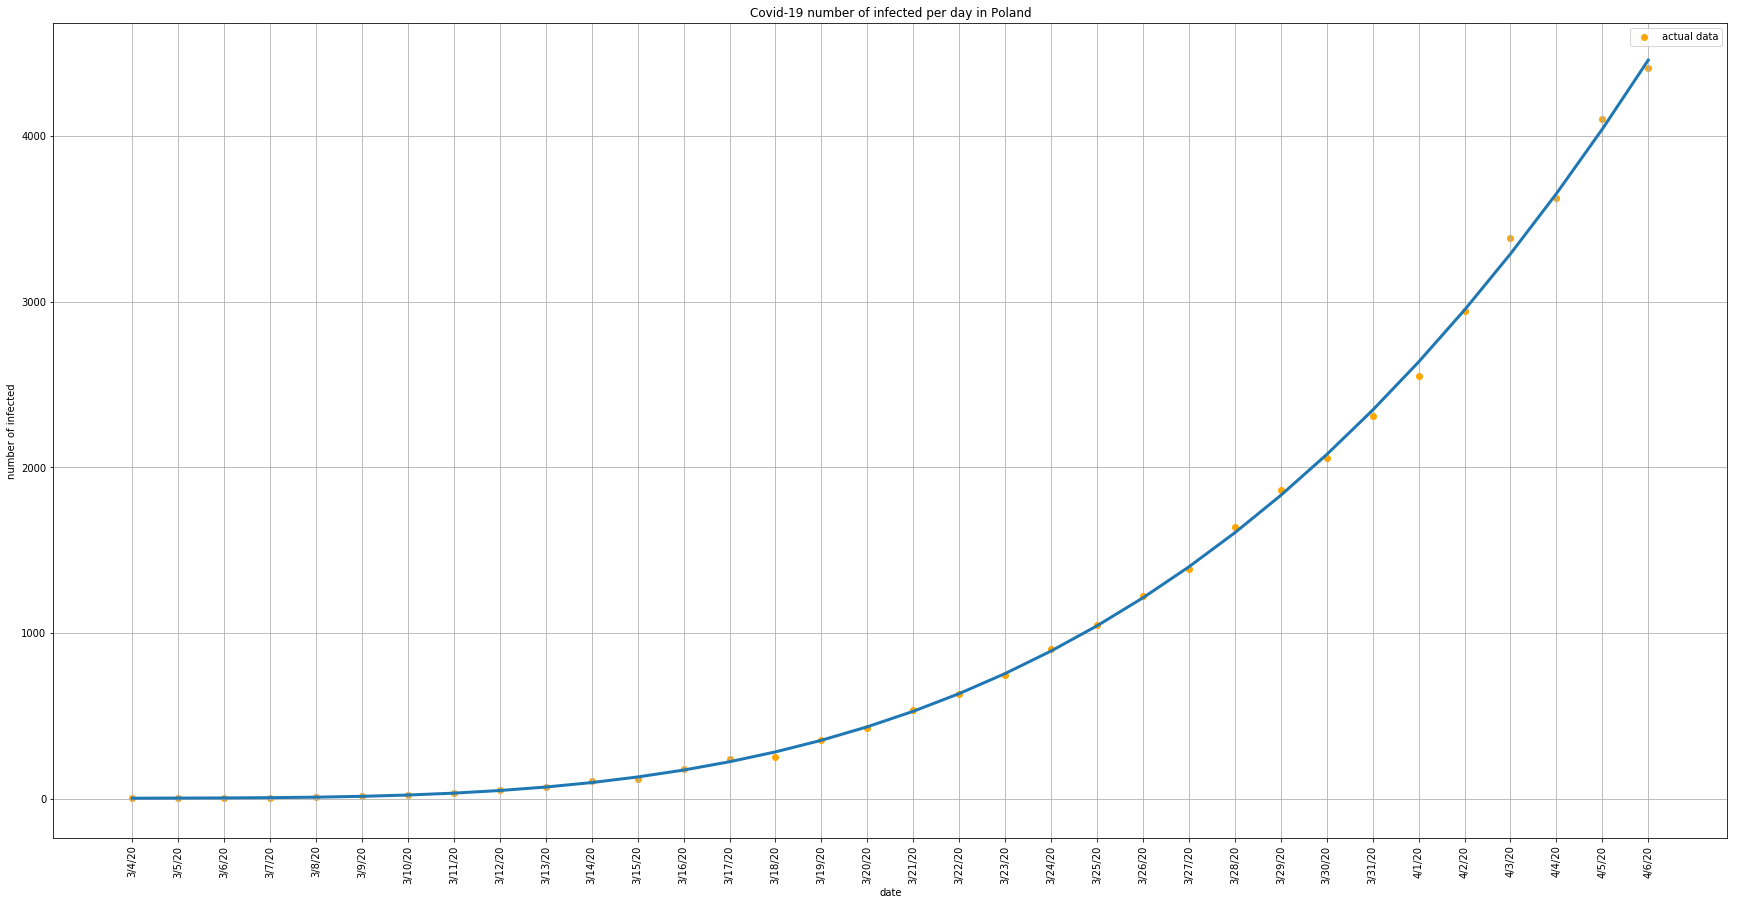

Polynomial degree: 6
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000101026       -0.0000101026
           0.0010465038        0.0010465038
          -0.0409493081       -0.0409493078
           0.9004512032        0.9004511989
          -7.9150992209       -7.9150991794
          29.9831992842       29.9831991289
         -29.6835967475      -29.6835965831 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -6.7549583878      7.7549583878      7.7549583878
3/5/20                      1     5.2036671888      4.2036671888      4.2036671888
3/6/20                      5    10.2723322740      1.0544664548      5.2723322740
3/7/20                      5    11.7837066133      1.3567413227      6.7837066133
3/8/20                     11    12.4304731717      0.1300430156      1.4304731717

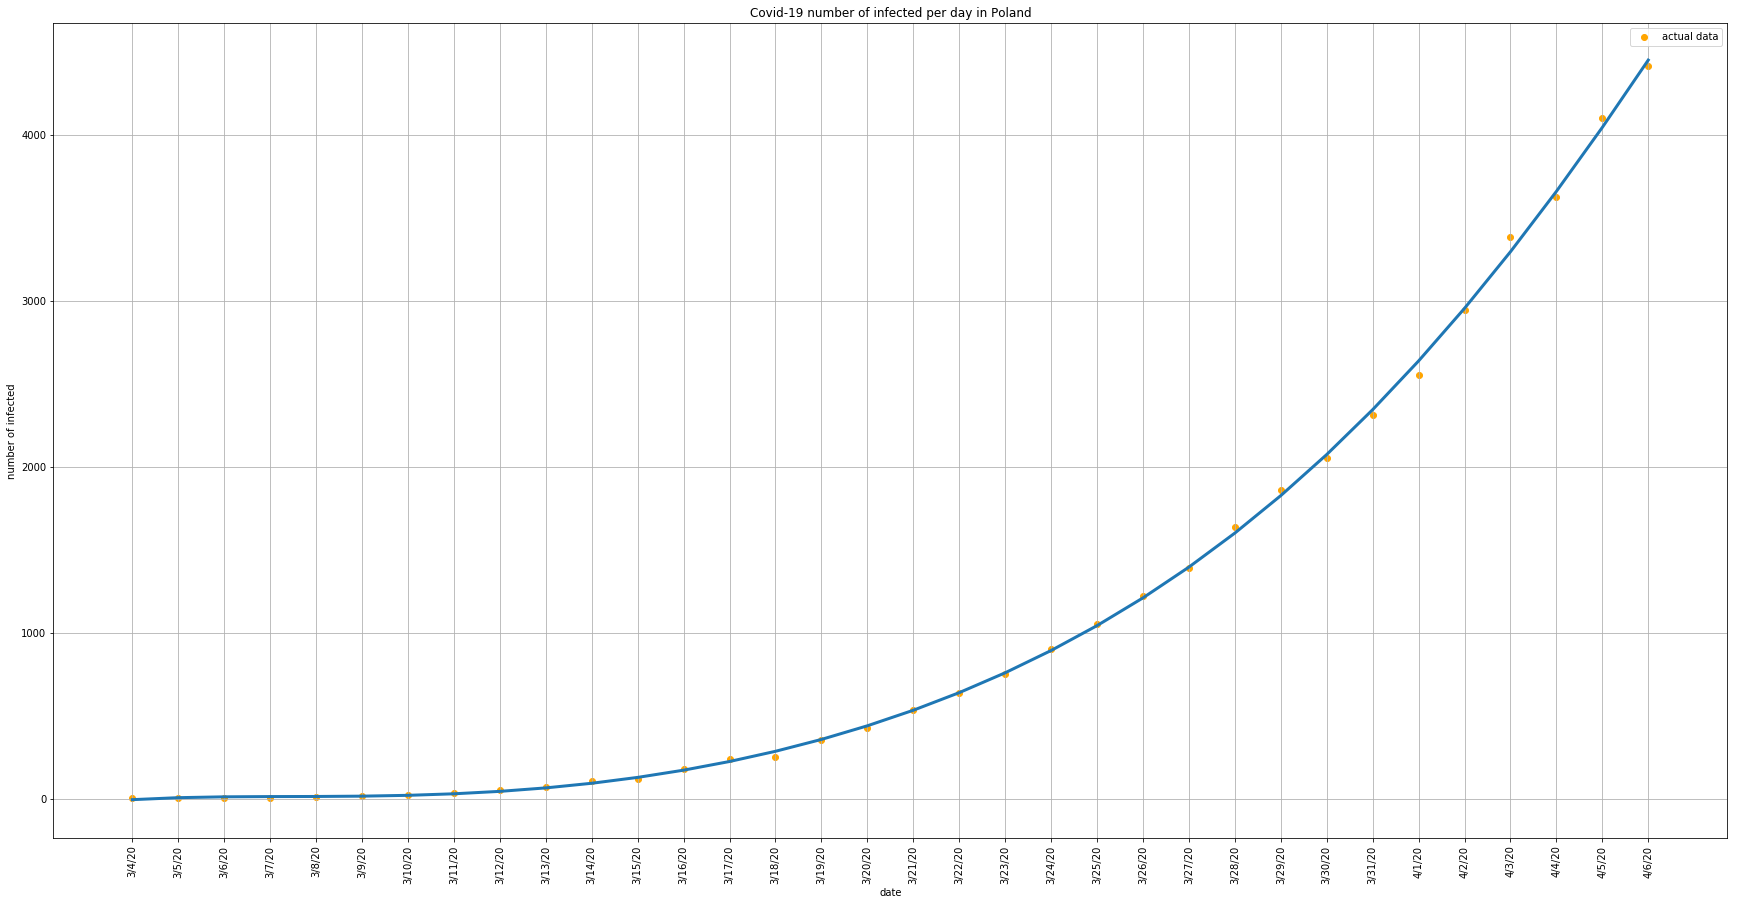

Polynomial degree: 7
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000025800       -0.0000025800
           0.0003059473        0.0003059474
          -0.0143565894       -0.0143565910
           0.3389184081        0.3389184474
          -4.0799008165       -4.0799013460
          25.3516499875       25.3516536728
         -67.6618054273      -67.6618167758
          55.4962128644       55.4962233007 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     9.4310217942      8.4310217942      8.4310217942
3/5/20                      1    -6.0774705138      7.0774705138      7.0774705138
3/6/20                      5    -5.3005425980      2.0601085196     10.3005425980
3/7/20                      5     2.6345931819      0.4730813636      2.3654068181
3/8/20                     11    12.52

Polynomial degree: 8
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000003353       -0.0000003352
           0.0000443552        0.0000443550
          -0.0023909495       -0.0023909348
           0.0675828897        0.0675824400
          -1.0740635613       -1.0740557089
           9.7065643931        9.7064866386
         -46.0492843652      -46.0488751829
         100.6707507106      100.6697683334
         -68.4706863870      -68.4699503183 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1    -5.1514832496      6.1514832496      6.1514832496
3/5/20                      1    11.1563990827     10.1563990827     10.1563990827
3/6/20                      5     8.9505418760      0.7901083752      3.9505418760
3/7/20                      5     3.7999106670      0.2400178666      1.20008

Polynomial degree: 9
  polyfit approximation    my approximation
-----------------------  ------------------
          -0.0000000243       -0.0000000243
           0.0000034924        0.0000034919
          -0.0002090229       -0.0002089882
           0.0067662367        0.0067649767
          -0.1288527064       -0.1288254894
           1.4726665498        1.4723109603
          -9.7444499667       -9.7417104244
          35.2614899505       35.2499294281
         -58.8403550674      -58.8174495697
          33.8169981696       33.8021774292 
)
date       number of infected    approximation    relative error    absolute error
-------  --------------------  ---------------  ----------------  ----------------
3/4/20                      1     1.8440576115      0.8440576115      0.8440576115
3/5/20                      1    -0.9268078622      1.9268078622      1.9268078622
3/6/20                      5     4.0218653583      0.1956269283      0.9781346417
3/7/20                      5    

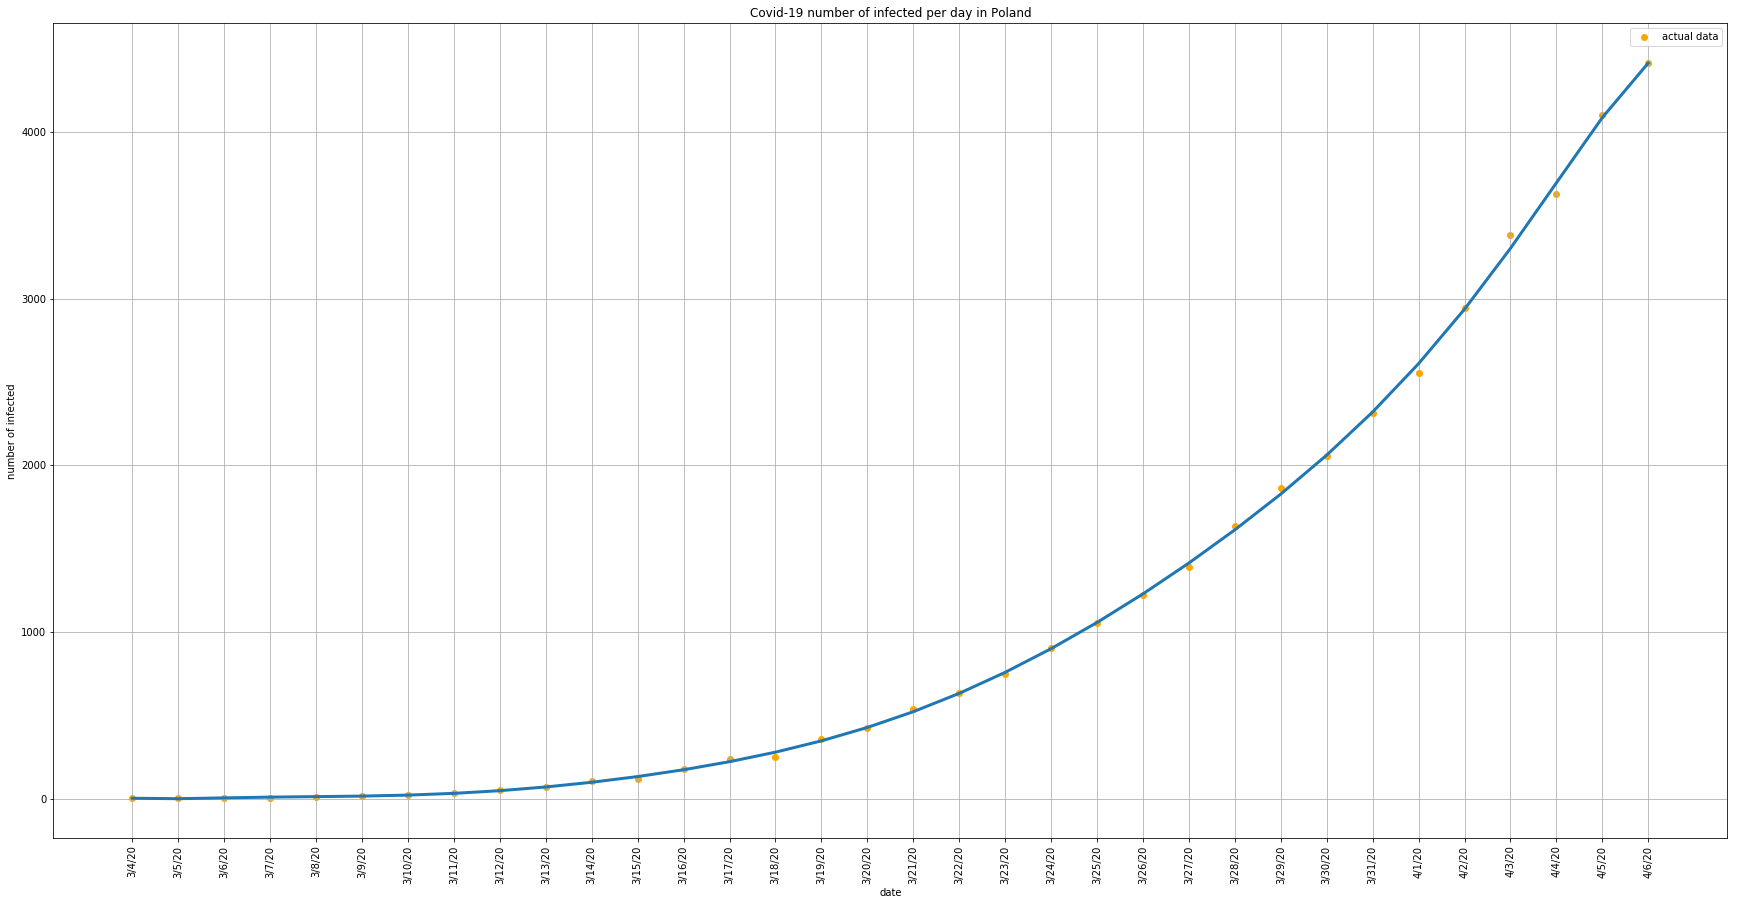

In [11]:
import matplotlib.pyplot as plt
import statistics
from tabulate import tabulate

dates = ["3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20","3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20","3/31/20","4/1/20","4/2/20","4/3/20","4/4/20","4/5/20","4/6/20"]
infected = [1,1,5,5,11,16,22,31,49,68,103,119,177,238,251,355,425,536,634,749,901,1051,1221,1389,1638,1862,2055,2311,2554,2946,3383,3627,4102,4413]

def data_table(domain, values, title1, title2):
    print(tabulate({title1: domain, title2: values}, headers="keys"), "\n\n")

print("Liczba chorych na COVID-19 w Polsce\n")
data_table(dates, infected, "Data", "Liczba zachorowań")

def polyfit_coronavirus_precision(dates, infected, d):  
    n = len(infected)
    x_val = np.linspace(1, n, n)
    poly = np.polyfit(x_val, infected, d)
    poly = np.poly1d(poly)
    my_poly = least_squares_aproxy(infected, x_val, d)
    results = poly(x_val)
    
    print(tabulate({"polyfit approximation" : poly, "my approximation" : my_poly}, headers="keys", floatfmt=".10f"), "\n)")
    
    absolute_error = (len(x_val)) *[0]
    relative_error = (len(x_val)) * [0]
    for i in range(0, len(x_val)):
        absolute_error[i] = abs(results[i] - infected[i])
        relative_error[i] = absolute_error[i]/infected[i]
    print(tabulate({"date": dates, "number of infected": infected, "approximation": results, 
                  "relative error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")
    print("Mean of statistic error: ",statistics.mean(relative_error))
    show_coronavirus_graph_poly(dates, infected, results)
    
def show_coronavirus_graph_poly(dates, infected, results):
    fig,ax=plt.subplots()
    fig.set_size_inches(30, 15)
    ax.plot(dates, results, linewidth = 3)
    ax.scatter(dates, infected, c = "red", label="actual data")
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates)
    plt.title('Covid-19 number of infected per day in Poland')
    plt.xticks(rotation=90)
    plt.xlabel('date')
    plt.grid(True, which='major')
    plt.ylabel('number of infected')
    plt.legend()
    plt.show()

def coronavirus_poly():
    for d in range(1,10, +1):
        print("Polynomial degree:", d)
        polyfit_coronavirus_precision(dates, infected, d)
    
coronavirus_poly()
  